In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import popoff
from Session import SessionLite, build_flu_array_single
from mpl_toolkits.mplot3d import Axes3D
from linear_model import PoolAcrossSessions, LinearModel, pca_session, LabelEncoder, largest_PC_trace, largest_PC_loading, do_pca
import loadpaths
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys, os, pickle, copy
from sklearn.decomposition import PCA
import warnings
import pandas as pd
import math, cmath
from tqdm import tqdm
import pop_off_functions as pof
import pop_off_plotting as pop
from IPython.core.debugger import Pdb
ipdb = Pdb()
import ptitprince as pt
import copy

## Load data in form of Jimmy's PAS object
warnings.warn('Targets in data, fix self.ever_targetted')
remove_targets = False
pas = PoolAcrossSessions(save_PCA=False, subsample_sessions=False,
                         remove_targets=remove_targets, remove_toosoon = True)
lm = pas.linear_models[0]
print(pas.sessions)

/home/tplas/repos/popping-off/popoff/popoff/loadpaths.py
/home/tplas/repos/Vape
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
ALERT SESSIONS NOT SUBSAMPLED
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
{0: instance Mouse J064, run 10 of Session class, 1: instance Mouse J064, run 11 of Session class, 2: instance Mouse J064, run 14 of Session class, 3: instance Mouse RL070, run 28 of Session class, 4: instance Mouse RL070, run 29 of Session class, 5: instance Mouse RL117, run 29 of Session class, 6: instance Mouse RL117, run 30 of Session class, 7: instance Mouse RL123, run 22 of Session class, 8: instance Mouse RL116, run 32 of Session class, 9: instance Mouse RL116, run 33 of Session class}


In [3]:
## Create sessions object from PAS:

try:  # ensure sessions doesn't exist yet 
    sessions
    assert type(sessions) is dict
except NameError:
    pass

sessions = {}
int_keys_pas_sessions = pas.sessions.keys()
print(int_keys_pas_sessions)
i_s = 0
for ses in pas.sessions.values():  # load into sessions dict (in case pas skips an int as key)
    ses.signature = f'{ses.mouse}_R{ses.run_number}'
    sessions[i_s] = ses
    i_s += 1
#     if ses.signature != 'RL117_R29':  # one that used not to have spont data
#         sessions[i_s] = ses
#         i_s += 1
#     else:
#         f'{ses.signature} has been excluded !!! (because no spont data available)'
print(sessions)
assert len(sessions) == 10
pof.label_urh_arm(sessions=sessions)  # label arm and urh

# for kk, ss in sessions.items():
    
    
print('------------------------------------')
print(f'{len(sessions)} sessions are loaded')
tp_dict = pof.create_tp_dict(sessions=sessions)


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
{0: instance Mouse J064, run 10 of Session class, 1: instance Mouse J064, run 11 of Session class, 2: instance Mouse J064, run 14 of Session class, 3: instance Mouse RL070, run 28 of Session class, 4: instance Mouse RL070, run 29 of Session class, 5: instance Mouse RL117, run 29 of Session class, 6: instance Mouse RL117, run 30 of Session class, 7: instance Mouse RL123, run 22 of Session class, 8: instance Mouse RL116, run 32 of Session class, 9: instance Mouse RL116, run 33 of Session class}
URH and ARM trials have been labelled
------------------------------------
10 sessions are loaded


In [11]:
tp_dict['decoders'] = tp_dict['mutual']
tp_dict['decoders'] = tp_dict['decoders'][np.logical_and(tp_dict['decoders'] >- 2, 
                                                         tp_dict['decoders'] <= 4)]
# tp_dict['decoders'] = tp_dict['decoders'][::40]

pre_stim_art_time = -0.07
post_stim_art_time = 0.35
time_array_plot = copy.deepcopy(tp_dict['decoders'])
time_array_full = copy.deepcopy(tp_dict['decoders'])
time_array_plot[np.logical_and(time_array_plot >= pre_stim_art_time, 
                               time_array_plot < post_stim_art_time)] = np.nan
time_array_full -= pre_stim_art_time
time_array_plot -= pre_stim_art_time


dict_tt_train = {'hit/cr': ['hit', 'cr']}
#                  'hit/miss': ['hit', 'miss'],
#                  'miss/cr': ['miss', 'cr'],
#                  'spont/cr': ['spont', 'cr'],
#                  'hit/cr 10 trials': ['hit', 'cr']}  # to run 10 trials; set hard_set_10_trials to True

## Uncomment these lines to run, (this resets the decoder results)
# lick_acc, lick_acc_split, lick_pred_split, ps_acc, ps_acc_split = {}, {}, {}, {}, {}
# ps_pred_split, lick_half, angle_dec, decoder_weights = {}, {}, {}, {}

lick_pred_split_tt, lick_pred_split_tt_nstim, ps_pred_split_tt, ps_pred_split_tt_nstim = {}, {}, {}, {}

## Train decoders (takes 15 mins per decoder type)

In [12]:
## Compute results decoders (note: CV of regularisation is down below in the notebook)

for key, list_tt_train in dict_tt_train.items():
#     if key == 'hit/cr 10 trials':
    print(f'Now training {key} decoder')

#     (lick_acc[key], lick_acc_split[key], lick_pred_split[key], ps_acc[key], 
#      ps_acc_split[key], ps_pred_split[key], lick_half[key], angle_dec[key], 
#      decoder_weights[key]) = pof.compute_accuracy_time_array_average_per_mouse(sessions=sessions, 
#                                                   time_array=tp_dict['decoders'],
#                                                   projected_data=False, 
#                                                   reg_type='l2', regularizer=1, 
#                                                   average_fun=pof.class_av_mean_accuracy,
#                                                   split_fourway=True,
#                                                   list_tt_training=list_tt_train,
#                                                   concatenate_sessions_per_mouse=False,
#                                                   hard_set_10_trials=(True if key == 'hit/cr 10 trials' else False))
    
    
    (lick_pred_split_tt[key], lick_pred_split_tt_nstim[key], 
     ps_pred_split_tt[key], 
     ps_pred_split_tt_nstim[key]) = pof.compute_prediction_time_array_average_per_mouse_split(sessions=sessions, 
                                                  time_array=tp_dict['decoders'],
                                                  projected_data=False, 
                                                  reg_type='l2', regularizer=1, 
                                                  average_fun=pof.class_av_mean_accuracy,
                                                  list_tt_training=list_tt_train,
                                                  concatenate_sessions_per_mouse=False,
                                                  hard_set_10_trials=(True if key == 'hit/cr 10 trials' else False))

0it [00:00, ?it/s]

Now training hit/cr decoder
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.41067623 0.17642769]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.47451285 0.20372598]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.6457007  0.09379243]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.50791512 0.13250339]
hit_n1 [ 2 29 30 44]
[0.53915959 0.26086649]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.50255902 0.18431407]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.54662449 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  4 15 16 17 20 34 43 47]
[0.55315193 0.27290624]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.47606979 0.14075486]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.31473328 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  5  6 14 18 19 28 31 32 33 42 45 46 48]
[0.42208611 0.24361532]
fp_n3 [

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.43625658 0.15224389]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.44352351 0.29866637]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.41356344 0.21905861]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.45840176 0.23461506]
hit_n1 [ 2 14 17 28]
[0.3861906  0.22637084]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.48272014 0.21311777]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.7750128 0.       ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  5  6 19 20 30 31 32 43 45]
[0.66645084 0.23637537]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.38403738 0.18777446]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.43801025 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  4 15 16 18 29 33 34 42 44 46 47 48]
[0.48179    0.23967127]
fp_n3 []
[nan nan]
miss_n3 []
[nan na

1it [00:06,  6.08s/it]

hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.52745479 0.19391347]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.54796025 0.28342863]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.08684146 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.56790642 0.21625573]
hit_n1 [ 0  1  5 21 23 24 25 26 37 41 54 55 57 59]
[0.43184379 0.26852916]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.44197906 0.19263664]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  6  7 18 22 36 38 39 40 44]
[0.47224315 0.26855755]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.49700346 0.20491938]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.46146176 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  4  8 19 20 42 43 53 56 58 60]
[0.40034962 0.27973116]


[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.59384747 0.10825173]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  6 14 19]
[0.45856802 0.14726822]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.53446944 0.12762129]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.50981727 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  7  8 12 13 18 20]
[0.61264648 0.12703025]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.49665333 0.18449681]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.44018182 0.05145399]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.58300059 0.20695443]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.50153698 0.25464224]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.42367773 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0

2it [00:12,  6.06s/it]


miss_n1 [82 83 84 85 86 91 92 95]
[0.51263907 0.21250245]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.44950989 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  7  8 19 21 22 23 34 37 40 55 56]
[0.53073941 0.28831165]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.47630947 0.13547235]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.5355604  0.15526355]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  3  5  6 18 24 25 36 38 41 51 52 53 57 58]
[0.37585591 0.24787366]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.51820519 0.02258675]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.74587272 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.47772606 0.24099224]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.47245046 0.32270623]
arm_n0 []
[nan nan]
urh_n0 [71]
[0

[0.52602108 0.16124593]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.50998945 0.12683749]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.51619406 0.19726921]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  7  8 14 19]
[0.48493131 0.16942074]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.5527866 0.1517719]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.55590935 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  6 12 13 18 20]
[0.49646751 0.18353768]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.45628336 0.12652223]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.53525765 0.03579941]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.48160197 0.1996646 ]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47

3it [00:18,  6.09s/it]

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.55605817 0.22374578]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.41053301 0.31535693]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.28671683 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.66867854 0.18346772]
hit_n1 [ 5 20 37 41 52 58]
[0.50984326 0.22951321]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.48327728 0.22978057]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.73045058 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 4  8 24 25 34 39 40 53 54 55 56 57]
[0.53241176 0.30570047]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.3447971  0.29693819]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.20543777 0.04459326]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  3  6  7 17 18 19 21 22 23 35 36 38 51]
[0.420259   0.30053674]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.69504339

[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.64339139 0.14473203]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.52660329 0.18811423]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.47052709 0.20621287]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.58743058 0.16389332]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  8 14 18 20]
[0.44232196 0.24424637]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.46178168 0.10880458]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.66198472 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  6  7 12 13 19]
[0.3361796  0.14665405]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.49630388 0.18583412]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.62875569 0.18365941]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103

4it [00:24,  6.14s/it]

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.45594941 0.10854875]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.514888   0.11513778]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.38955493 0.192303  ]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.42628532 0.157191  ]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.31256431 0.11217971]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  6 13 14 19]
[0.51034302 0.20653801]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.39245076 0.14964831]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.47461685 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  7  8 12 18 20]
[0.54961313 0.14874308]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.36777013 0.18123187]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.48081823 0.13448093]
urh_n

[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  3  5  6  7 18 34 37 39 54 57 58]
[0.47770405 0.2451209 ]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.54486986 0.05772807]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.32681415 0.07805629]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2 19 20 22 23 24 25 36 38 41 51 52 53 55 56]
[0.51807901 0.27862239]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.32042811 0.06644619]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.72093864 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.45518496 0.16706723]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.53485949 0.23852465]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.7626654 0.       ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.47299498 0.23282709]
hit_n1 [ 2  5  8 18 19 20 21 

[nan nan]
hit_n2 [ 2  6 14 18 20]
[0.55425    0.21142985]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.53789761 0.14890516]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.72937636 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  7  8 12 13 19]
[0.59300548 0.19479183]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.57684792 0.2056945 ]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.62562288 0.21320894]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.50822956 0.20921823]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.52907172 0.31429401]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.49614574 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.61195965 0.20461102]
hit_n1 [ 1 19 20 35 51 53]
[0.39090774 0.2084223 ]
fp_n1 []
[nan nan]
m

5it [00:30,  6.15s/it]

 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  6 16 17 18 19 21 31 35 44 45 47]
[0.57239854 0.24331742]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.48170135 0.24095041]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.39426449 0.26487316]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.54852818 0.2415709 ]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.41526324 0.20958077]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.17609892 0.09400435]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.50416623 0.2285608 ]
hit_n1 [ 0 14 17 34]
[0.51650175 0.23120094]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.50647565 0.17963199]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.40657086 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3 15 16 18 29 30 31 33 44 48]
[0.5518

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.44402088 0.19178664]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.58886181 0.28947415]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.52016082 0.10348329]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.47899855 0.16030643]
hit_n1 [ 0  3 28 44]
[0.36760487 0.2471663 ]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.57358682 0.15254956]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.11189319 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  4  5  6 19 29 34 42 47 48]
[0.41410572 0.23547424]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.61916879 0.15492787]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.3730153 0.       ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1 14 15 16 17 18 20 30 31 32 33 43 45 46]
[0.29637157 0.23393196]
fp_n3 []
[nan nan]
miss_n3 []
[nan na

6it [00:36,  6.17s/it]

[nan nan]
arm_n2 [27]
[0.27735317 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  6  7  8 12 13 14]
[0.67173724 0.15947346]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.44349547 0.10035871]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.70785976 0.04796264]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.57631906 0.19475872]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.41061465 0.24870056]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.26050733 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.53068829 0.17295987]
hit_n1 [ 0  2  7  8 40 51]
[0.6699992  0.19534244]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.4405292  0.24804171]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.86338395 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 4 19 20 21 24 36 37 38 39 52 

[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.33586046 0.17133278]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.47051933 0.08539055]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.4863049  0.13767145]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.56400491 0.12867498]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  6  7 18]
[0.6313903  0.13240436]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.48604542 0.16035796]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.41550257 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  8 12 13 14 19 20]
[0.61733595 0.18402792]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.51521989 0.22113515]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.39785244 0.05103084]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103

7it [00:43,  6.18s/it]

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.54602379 0.21019143]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.44511802 0.29795076]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.79793396 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.45676479 0.23546953]
hit_n1 [18 36 38 40 51 53]
[0.73103591 0.18419977]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.54929781 0.16831667]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.36921737 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  6  8 17 21 23 24 35 37 39 52 55]
[0.54177686 0.32273699]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.37887272 0.20214341]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.34952327 0.10282587]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  3  4  5  7 19 20 22 25 34 41 54 56 57 58]
[0.43755161 0.28718937]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.59308827

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.51022575 0.23336586]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.39802951 0.20334476]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.4731924  0.22229509]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.46959183 0.20774727]
hit_n1 [15 30 32 33]
[0.36421521 0.20861359]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.66097563 0.16447919]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.70853546 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1 19 28 29 31 34 42 43 45 48]
[0.52534551 0.2425961 ]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.55406915 0.19335017]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.29585475 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  3  4  5  6 14 16 17 18 20 44 46 47]
[0.51380513 0.22533964]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

8it [00:49,  6.17s/it]

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.61997504 0.09385788]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.56304991 0.22144169]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.59074586 0.13456362]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.62288581 0.1401764 ]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.50597911 0.18705503]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  6 13 18 19]
[0.43308725 0.23967442]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.52720712 0.15283352]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.58746687 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  7  8 12 14 20]
[0.4759327  0.23531605]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.55004313 0.11173284]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.4496711  0.14644415]
urh_n

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.62850815 0.18150241]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.4387935 0.2617174]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.52573153 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.5249083 0.2191444]
hit_n1 [ 6  7 19 23 35 56]
[0.53256754 0.29818629]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.53745308 0.26785136]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.54257992 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  5 17 20 25 36 53 54 55 57 58]
[0.57224926 0.29531246]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.47394897 0.14773544]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.42489355 0.22302973]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  4  8 18 21 22 24 34 37 38 39 40 41 51 52]
[0.512513   0.27988613]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.40666669 0.2

9it [00:55,  6.11s/it]

hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.4942828  0.20921763]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.55577462 0.27316005]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.81172797 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.5889994 0.1881041]
hit_n1 [ 0  2  5  7 19 20 22 24 40 53 55 56 58 60]
[0.48628118 0.29204298]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.59121449 0.15859106]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  8 21 25 26 36 43 44 57 59]
[0.39953169 0.23786118]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.34164336 0.13793584]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.60493131 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  4  6 18 23 37 38 39 41 42 54]
[0.52030733 0.24727936]
fp

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.59138736 0.12123455]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.58039098 0.1218836 ]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.56288058 0.15657817]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.52005922 0.16202944]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.48317211 0.15079597]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  7 12 13 14]
[0.43873493 0.23754494]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.54063173 0.18938357]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.67059934 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  6  8 18 19 20]
[0.4284976 0.234682 ]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.62721195 0.20180479]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.69172687 0.04486912]
urh_n3 

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.6007867  0.19783346]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.54287954 0.25445729]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.78720519 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.55267409 0.24928703]
hit_n1 [ 0 24 41 47 49 60 62 67]
[0.50091739 0.27774028]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.49645303 0.19968404]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.45101202 0.09199488]
urh_n1 [91]
[0.38814191 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 3  6  7  8 20 21 25 26 27 28 29 40 43 44 45 46 48 59 63 64]
[0.54474825 0.26556268]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.5737791  0.27793662]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.47532178 0.21014143]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hi

10it [01:01,  6.07s/it]

hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.47801888 0.26489855]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.48028424 0.29559191]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.35812812 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.37487322 0.17287052]
hit_n1 [ 1  2  3  5  6 24 26 40 42 44 53 56 57 59]
[0.51039518 0.25723801]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.41290772 0.23451644]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 4  8 18 19 22 25 37 38 39 60]
[0.48006471 0.26113938]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.53119186 0.10397089]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.29105066 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  7 20 21 23 36 41 43 54 55 58]
[0.51707768 0.2892538 ]


hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.5128575  0.22599219]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.55735355 0.25740638]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.30781092 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.53027507 0.19926853]
hit_n1 [ 0  4  7 23 24 34]
[0.36343919 0.16417504]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.39336263 0.23726421]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.53250614 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  3  5  6 17 21 22 37 38 39 40 56]
[0.42754146 0.20370993]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.60801338 0.12057776]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.39544944 0.22477455]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  8 18 19 20 25 35 36 41 51 52 53 54 55 57 58]
[0.46635274 0.25617071]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.39581483

11it [01:07,  6.09s/it]

[nan nan]
miss_n3 [80 98]
[0.45785775 0.09454454]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.68597299 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.43042151 0.20716771]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.52655885 0.27339167]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.15532133 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.64798335 0.18273045]
hit_n1 [ 4  5 18 20 21 22 26 37 38 39 41 42 43 60]
[0.54417015 0.27025283]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.54699513 0.2019035 ]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  3  6  7 24 25 53 55 58]
[0.32511757 0.18492455]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.41993265 0.07066349]
cr_n2 []
[nan na

[0.47367029 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  6  8 12 13 19 20]
[0.53791983 0.22910195]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.46195813 0.08595154]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.5579171  0.07911612]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.46981487 0.21019741]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.51416684 0.26798136]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.10950579 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.44246168 0.19884284]
hit_n1 [ 2  6 19 24 34 41]
[0.39303525 0.27867723]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.38590335 0.2190104 ]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.23417775 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  5 17 18 21 22 25 36 37 38 55 57]
[0.55210336 0.2

12it [01:13,  6.09s/it]

[0.60649523 0.21398298]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.50936877 0.21100779]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.65220917 0.21934606]
urh_n2 [78 79 82]
[0.52815284 0.22323496]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  4  5 12 23 25 34]
[0.54160419 0.21061385]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.61232326 0.20108557]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.42663292 0.25695037]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.44253755 0.24138968]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.55835065 0.29187621]
arm_n0 []
[nan nan]
urh_n0 [90]


hit_n0 []
[nan nan]
fp_n0 [233 234 235 236]
[0.60890164 0.19190893]
miss_n0 []
[nan nan]
cr_n0 [ 6  7  8  9 10 16 17 18 19 20 21 27 28 29 30 31 37 38 39 40 41]
[0.60503166 0.23323419]
arm_n0 []
[nan nan]
urh_n0 [80]
[0.85481253 0.        ]
spont_n0 [237 238 239 240 241 242 243 244 245 246]
[0.43113386 0.19289257]
hit_n1 [ 1  3 12 32 34]
[0.5403893  0.18545465]
fp_n1 []
[nan nan]
miss_n1 [ 85  93 100 101 104 116 117 125 129 131 133 140 149 168 169 170 172 173
 190 194 197 210 213 217 228 230]
[0.61181423 0.18631332]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.49730093 0.17317366]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  4  5 15 22 25 26]
[0.44726954 0.27908912]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.45604499 0.23402177]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.58413916 0.19725166]
urh_n2 [78 79 82]
[0.35759767 0.1996573 ]
spont_n2 []
[n

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.53976566 0.20601302]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.47005625 0.26139186]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.72627131 0.02964436]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.50858138 0.180401  ]
hit_n1 [ 4 14 17 31]
[0.30981005 0.15738646]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.59286188 0.20163913]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.67556723 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  6 16 29 30 33 34 42 46 48]
[0.49684661 0.13909223]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.50176973 0.09865802]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.21560764 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  3  5 15 18 19 20 28 32 43 44 45 47]
[0.57362735 0.25227723]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

13it [01:19,  6.09s/it]


fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.59370172 0.19250556]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.17054519 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  3  4 30 31 32 33 36 50]
[0.3939484 0.2834055]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.52001767 0.19201772]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.61937603 0.06131548]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  5  7 15 16 18 19 34 44 47 48 49]
[0.62502157 0.24028688]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.57369719 0.22437387]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.40178208 0.18793533]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.46264385 0.18158689]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.39416409 0

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.50677555 0.23193138]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.48834641 0.24143661]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.31359011 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.47212324 0.18077272]
hit_n1 [ 6 18 20 35 41 52]
[0.59663465 0.22733275]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.44693132 0.16626974]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.70376902 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  3  5  8 24 34 36 39 40 54 56]
[0.49384111 0.25161751]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.6171147  0.21091528]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.48980929 0.20760786]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  4  7 17 19 21 22 23 25 37 38 51 53 55 57 58]
[0.54615022 0.246886  ]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.72413734

14it [01:25,  6.05s/it]


fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.50377102 0.17295402]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.5236811  0.04051927]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.52374959 0.2277983 ]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.39964386 0.32028533]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.52196655 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.48628862 0.29437834]
hit_n1 [ 3 17 35 36 53 55]
[0.59135741 0.23883928]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.51490451 0.29720105]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.48948375 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 5 18 21 22 23 25 34 40 41 51 52 54]
[0.58423743 0.27478195]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.53299035 0.24911868]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.55917

[0.76695014 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  6  8 18 19 20]
[0.41788307 0.20345262]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.57853624 0.09754657]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.50691946 0.26583629]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.60013391 0.17922042]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.52849914 0.27815251]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.30354365 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.42316264 0.20160524]
hit_n1 [ 1 23 25 36 51 56]
[0.37785453 0.16810996]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.45600669 0.18813882]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.55425942 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  3  5 20 21 38 52 53 54 57 58]
[0.44007539 0.2

[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.58735738 0.20093931]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.57385913 0.24554966]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.75240329 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.53405605 0.27456273]
hit_n1 [ 1  6  7  8 22 25 44 47]
[0.6131157  0.23954248]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.46493944 0.23733614]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.70782467 0.20276609]
urh_n1 [91]
[0.56691708 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  9 21 23 24 26 27 41 43 45 46 49 59 61 62 64 65 66 67]
[0.47074263 0.28828216]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.35318801 0.22510073]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.43298079 0.14656865]
urh_n2 []
[nan nan]
spont_n2 []
[n

15it [01:31,  6.03s/it]

[nan nan]
hit_n2 [ 0 22 39 40 41 43 44 57 58 59]
[0.52764291 0.29647073]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.50775949 0.153119  ]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.46113882 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  4  5 21 23 24 26 37 54 56]
[0.48464941 0.2585053 ]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.45339595 0.13051162]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.60153392 0.16499986]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.52353248 0.28436627]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.63107385 0.17697766]
hit_n1 [ 3  4 17 21 30 31 34]
[0.57901218 0.18338423]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.47558843 0.26272176]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.25925621 0.    

[0.4494953  0.24761137]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.51706935 0.23207463]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.78150681 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  3  4  5 17 19 23 24 34 35 53 55]
[0.51957208 0.18071042]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.46262358 0.14476366]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.44788465 0.24001971]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  6  7 18 20 21 22 25 36 38 39 41 51 52 54 58]
[0.53752283 0.29255555]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.32945421 0.09997132]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.14510692 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.53730548 0.26156869]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.5795707  0.27

[0.54001019 0.19072166]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.56459016 0.11553442]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 8 12 13 18 19]
[0.66266756 0.03652012]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.52431017 0.22062836]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.58279867 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  6  7 14 20]
[0.58636067 0.19401909]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.61062838 0.19455545]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.50162862 0.07918616]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.48888072 0.20315839]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.54873555 0.29010414]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.27995914 0.        ]
spont_n0 [117 118 11

16it [01:37,  6.03s/it]

[0.36355218 0.21972858]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.63598469 0.04316414]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  6  7 15 17 21 30 34 36 45 47]
[0.55187142 0.27972354]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.32407027 0.21980129]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.3914949  0.24838487]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.44235492 0.20485731]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.52120901 0.20831099]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.49365003 0.16463636]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.47665183 0.15467539]
hit_n1 [ 1  3  4 19]
[0.45175628 0.10960229]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.33941369 0.14165832]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.66194278 0.       

[nan nan]
arm_n3 [35 39 41]
[0.60422349 0.20575846]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.51447693 0.17562677]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.56851659 0.24980592]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.56134208 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.43952082 0.21520317]
hit_n1 [ 1  5 37 38 53 58]
[0.39762358 0.21321434]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.43807582 0.1834455 ]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.81177239 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  3  4  6  7 20 21 23 25 34 39 51]
[0.48584216 0.32372402]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.33443178 0.21746859]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.41667976 0.16038323]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  8 17 18 19 22 24 35 3

17it [01:43,  6.09s/it]

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.50004823 0.20601824]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.59753319 0.16735732]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.51487999 0.19557873]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.50511065 0.13792163]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.58748613 0.18729579]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 7  8 18 19 20]
[0.42770735 0.28040229]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.45117307 0.16549191]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.36072877 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  6 12 13 14]
[0.43052505 0.21141117]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.45792068 0.15732531]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.54756378 0.18234225]
urh_n

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.47923762 0.10901109]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.36814916 0.15926803]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.45599787 0.13417555]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.49707133 0.16644819]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.68850067 0.13688025]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  7 12 19]
[0.65864573 0.08571401]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.53686171 0.20858796]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.28714539 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  6  8 13 14 18 20]
[0.51905069 0.1628145 ]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.60522454 0.10473178]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.53893234 0.09037836]
urh_n

[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.38322718 0.17458085]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.44114149 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  6  7 14 19]
[0.44360596 0.14753344]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.40565495 0.13530373]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.31079479 0.07573058]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.52467936 0.21281747]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.49069918 0.21644849]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.76370835 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.61041543 0.20771184]
hit_n1 [ 5 17 22 53 54 58]
[0.56877219 0.23762911]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.57690176 0.2506719 ]
cr_n1 []
[

18it [01:49,  6.13s/it]

hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.54072729 0.21556286]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.53509342 0.31254367]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.48577535 0.25005099]
hit_n1 [ 2  5  7 17 20 31 32]
[0.67803904 0.23101117]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.59204925 0.21622567]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.04384802 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  3 18 19 35 36 45 46 49]
[0.58675813 0.24729847]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.56878914 0.28897699]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.45257099 0.13176524]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 4  6 15 16 21 30 33 34 44 47 48 50]
[0.55929867 0.2608625 ]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.56300272

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.56098393 0.15410259]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.47259171 0.21918857]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.45710767 0.15382361]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.51815653 0.13933619]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.55757098 0.19740727]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 6 12 13 18 19]
[0.47727007 0.15160288]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.52095223 0.18781715]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.2604122 0.       ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  7  8 14 20]
[0.55125356 0.20199816]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.54532195 0.18938351]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.62490082 0.08257799]
urh_n3 

19it [01:56,  6.14s/it]

[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.55439939 0.19079248]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.50046798 0.30028827]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.46695266 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.64639811 0.21069551]
hit_n1 [ 4 23 25 35 52 57]
[0.48626306 0.22922515]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.61576994 0.28422033]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.21248497 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  5  6  7  8 17 21 40 41 51 54]
[0.61174327 0.25677072]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.61377304 0.18188124]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.61987862 0.24526413]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  3 18 19 20 22 24 34 36 37 38 39 53 55 56 58]
[0.44795002 0.24002183]
fp_n3 []
[nan 

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.4820951  0.17878953]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.46096179 0.25064589]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.45692139 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.53713941 0.24996186]
hit_n1 [ 3 18 21 24 40 57]
[0.51971707 0.18832337]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.45631167 0.22981055]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.39766968 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  5  8 34 36 37 39 51 52 54 55 56]
[0.56467975 0.25229326]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.62157633 0.21494477]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.22656973 0.05852882]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  4  6  7 17 19 20 22 23 25 35 38 41 53 58]
[0.50310215 0.21598129]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.37444019

20it [02:02,  6.12s/it]

[nan nan]
arm_n1 [72]
[0.44021667 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  8 18 19 25 34 35 36 39 41 53 56]
[0.5975214  0.29799786]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.73421468 0.13691288]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.73802191 0.08950761]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  5  6 21 22 23 24 37 38 51 52 54 55 57 58]
[0.49571986 0.23057447]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.54060055 0.16150532]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.69949728 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.50426931 0.26396926]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.51728012 0.28610582]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.78615323 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 

[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.46825217 0.06564731]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.49450655 0.07457926]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.56433699 0.16786427]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.49947635 0.23317061]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.26641224 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.53052461 0.19993284]
hit_n1 [ 1  4  5 38 51 58]
[0.48933011 0.20501604]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.38639114 0.27717762]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.38664477 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  8 17 20 21 23 36 41 52 53 54]
[0.57090604 0.32913988]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.41516552 0.07534473]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.19680207 0.0171

21it [02:08,  6.13s/it]

hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.45488053 0.22451243]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.49345803 0.29004009]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.25638207 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.34252512 0.06600398]
hit_n1 [ 0  5  6  7  8 20 21 22 25 36 39 41 42 58]
[0.56339775 0.26987006]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.58273184 0.27039689]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2 18 19 24 40 44 53 59 60]
[0.33634291 0.28729063]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.5743346  0.15989377]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.59618414 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  4 23 26 37 38 43 54 55 56 57]
[0.39378462 0.21458891]


hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.5396836  0.20565285]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.4815148  0.21386813]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.35847479 0.187514  ]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.50560345 0.21042198]
hit_n1 [ 3  4 28 44]
[0.47289484 0.27222631]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.50240305 0.19837468]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.56492012 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1 19 20 31 32 34 43 45 46]
[0.41874123 0.28238982]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.49560499 0.16571726]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.3107124 0.       ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  5  6 14 15 16 17 18 29 30 33 42 47 48]
[0.54480462 0.3187978 ]
fp_n3 []
[nan nan]
miss_n3 []
[nan na

22it [02:14,  6.13s/it]

[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.53182666 0.25090956]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.78417807 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.48089623 0.21419149]
hit_n1 [ 0  1  8 19 22 38]
[0.25728313 0.1925558 ]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.7180988  0.17008126]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.59871692 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  4  5  7 18 23 25 41 52 54 55 57]
[0.47713245 0.27379105]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.66618508 0.06614457]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.59995521 0.07108626]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  6 17 20 21 24 34 35 36 37 39 40 51 53 56 58]
[0.62145049 0.28511936]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.47041557 0.16897711]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.86162509 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0

[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.51593302 0.17965976]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.5154486 0.2157428]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  8 13 18 20]
[0.5439564  0.14155717]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.49427729 0.15021288]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.58947943 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  6  7 12 14 19]
[0.41406531 0.15850951]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.4412948  0.15967986]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.68664719 0.15032817]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.48954747 0.19550849]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.4325328  0.

23it [02:20,  6.11s/it]

[nan nan]
arm_n2 [71 73 74]
[0.30441295 0.33522981]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  3  4  5  8 17 18 21 22 39 40 51 55 56 58]
[0.65410783 0.31945345]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.5548006  0.06038904]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.33313019 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.40850913 0.21087776]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.57833716 0.28312798]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.70240896 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.38856474 0.20194626]
hit_n1 [ 0  5  6 19 20 36 38 40 53 54 55 56 57 59]
[0.51717555 0.2431926 ]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.51918845 0.1926488 ]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]

[0.66815783 0.1071411 ]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.54254738 0.18879837]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.62902054 0.10225766]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.54602068 0.15542463]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.58263875 0.18362575]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1 12 19 20]
[0.4415521  0.14234043]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.54886914 0.14575996]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.17843864 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  6  7  8 13 14 18]
[0.43180251 0.15704716]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.49627855 0.12844818]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.60113183 0.16600369]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[

24it [02:26,  6.14s/it]

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.51925048 0.12987924]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.42553951 0.22339616]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.51262929 0.22739488]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.5614678  0.14558419]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.40388065 0.16939375]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1 12 13 18 20]
[0.60894012 0.06419225]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.53513957 0.22980645]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.55241444 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  6  7  8 14 19]
[0.47571418 0.23768283]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.49074412 0.15479446]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.60254782 0.09794956]
urh_n

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.45364476 0.21703127]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.41557868 0.25305163]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.53086703 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.40451455 0.15560997]
hit_n1 [ 3  8 22 34 39 57]
[0.601726  0.2206982]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.46735261 0.26783895]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.71058305 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  5  7 19 20 23 35 37 52 54 55]
[0.46957411 0.27550641]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.27168486 0.25299576]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.51884176 0.07681883]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  4  6 17 18 21 24 25 36 38 40 41 51 53 56 58]
[0.4673624  0.24942925]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.58787164 0

25it [02:32,  6.06s/it]

hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.50634831 0.18946918]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.50869736 0.32055693]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.52571552 0.2894236 ]
hit_n1 [ 5 15 32 34 35 49 50]
[0.47225795 0.24452145]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.47729669 0.23628611]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.25280567 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 6  7 16 17 18 19 20 30 36 46]
[0.50229174 0.31773626]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.4878454  0.20526844]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.51231339 0.29765212]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  3  4 21 31 33 44 45 47 48]
[0.54943926 0.30518754]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.46206768

[0.71717819 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  6 13 14 20]
[0.46856274 0.18828491]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.43238541 0.15643135]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.63526799 0.05849847]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.59068486 0.19512999]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.64246792 0.2402104 ]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.35174333 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.43332986 0.1583647 ]
hit_n1 [ 5 17 22 23 24 41]
[0.26612375 0.29837781]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.52506277 0.14641434]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.47702433 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  3  8 19 21 25 38 51 52 53 54 57]
[0.49655632 0.2

26it [02:38,  6.10s/it]

[nan nan]
hit_n2 [ 2  7  8 14 18]
[0.4899376  0.23825623]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.44897789 0.23235729]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.77660196 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  6 12 13 19 20]
[0.6237128  0.16618649]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.53794368 0.21560208]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.5428313  0.22905927]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.58609723 0.19094197]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.51114682 0.30152985]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.63174315 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.65451641 0.2177842 ]
hit_n1 [ 3 19 35 36 41 57]
[0.55490375 0.27382462]
fp_n1 []
[nan nan]
m

[nan nan]
hit_n3 [ 1  2  6 12 13 14 20]
[0.51404011 0.15728458]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.619919   0.12296606]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.60662691 0.11062951]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.4502104  0.20799299]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.46121914 0.23524595]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.58660214 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.44839737 0.21322506]
hit_n1 [ 3 18 23 24 36 54]
[0.52023692 0.23717363]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.47659387 0.2072368 ]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.16440267 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  8 19 20 25 34 37 38 40 51 52 57]
[0.5529216  0.23137987]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.577

27it [02:44,  6.08s/it]

hit_n0 []
[nan nan]
fp_n0 [156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171]
[0.47220533 0.26863955]
miss_n0 []
[nan nan]
cr_n0 [12 13 14 15 16 17 18 19 20 21 22 23 36 37 38 39 40 41 42 43 44 45 46 47
 60 61 62 63 64 65 66 67 68 69 70 82 83 84 85 86 87 88 89 90 91 92 93]
[0.44262791 0.29246806]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [172 173 174 175 176 177 178 179 180]
[0.48897335 0.16522852]
hit_n1 [10 24 26 32 35 56 76 78]
[0.65491287 0.24310698]
fp_n1 []
[nan nan]
miss_n1 [119 120 123 124 125 126 134 135 140 141 142 144 147 153 154]
[0.37580084 0.19662596]
cr_n1 []
[nan nan]
arm_n1 [ 98 104 107 108 112 116]
[0.45954636 0.22453222]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  5  9 25 30 31 33 34 48 49 52 53 54 55 58 72 73 75 79 81]
[0.56416096 0.28034629]
fp_n2 []
[nan nan]
miss_n2 [121 127 128 130 131 132 133]
[0.69598082 0.24695958]
cr_n2 []
[nan nan]
arm_n2 [101 106]
[0.52689863 0.28699853]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2 

[0.50164885 0.23581426]
arm_n0 []
[nan nan]
urh_n0 [80]
[0.46025277 0.        ]
spont_n0 [237 238 239 240 241 242 243 244 245 246]
[0.45363495 0.1814484 ]
hit_n1 [ 0 12 24 33 36]
[0.39029275 0.16840302]
fp_n1 []
[nan nan]
miss_n1 [ 85  93 100 101 104 116 117 125 129 131 133 140 149 168 169 170 172 173
 190 194 197 210 213 217 228 230]
[0.4687848  0.18818459]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.3938676  0.18942665]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  5 14 15 23 25 26]
[0.4743232  0.16419527]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.51351417 0.18792053]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.46705785 0.19342517]
urh_n2 [78 79 82]
[0.41971223 0.1303302 ]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  4 11 13 22 32 34 35]
[0.36675414 0.22487137]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 

[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.48111784 0.22547907]
urh_n2 [78 79 82]
[0.40826559 0.28898844]
spont_n2 []
[nan nan]
hit_n3 [ 1  5 11 13 14 23 33 35 36]
[0.57165644 0.26366489]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.47045507 0.20302121]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.44851892 0.27141883]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.40845102 0.23391892]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.57848916 0.25840214]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.68490387 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.51683865 0.29404099]
hit_n1 [ 0  6  9 23 42 61 62 65]
[0.65348346 0.26953795]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103

28it [02:50,  6.10s/it]

[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.50777885 0.19772998]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.53400504 0.2901204 ]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.43472064 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.58762717 0.17289868]
hit_n1 [ 0  2  5  8 22 23 24 26 36 37 38 39 44 55]
[0.51826095 0.24963292]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.5300731  0.19496322]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  6  7 20 21 41 43 56 57 59]
[0.58499031 0.18620292]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.6497744  0.21638485]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.29098892 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  4 18 19 25 40 42 53 54

[nan nan]
arm_n2 [27]
[0.3401455 0.       ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  7 12 13 14 19]
[0.47290312 0.13732522]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.56428358 0.16025211]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.66052585 0.09868216]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.47395961 0.22912186]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.47974535 0.26141407]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.73274014 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.55533269 0.11202378]
hit_n1 [ 0  1  5 35 41 57]
[0.32166562 0.23596423]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.59947422 0.16906724]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.78282976 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 6  7 19 20 21 23 34 37 39 52 53

29it [02:57,  6.11s/it]

[0.52248872 0.13011952]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.4873252  0.19217958]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.49277339 0.31042781]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.64477209 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.38251886 0.25872376]
hit_n1 [ 2  4  7 19 51 56]
[0.73827682 0.10941137]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.49759646 0.22383603]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.92429755 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3 18 20 23 24 34 38 39 40 41 54]
[0.56059846 0.34864222]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.52648073 0.30586193]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.29096778 0.18241196]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  5  6  8 17 21 22 25 35 36 37 52 53 55 57 58]
[0.3

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.52964461 0.20549427]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.56170383 0.25903544]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.64859351 0.01718316]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.47194737 0.17512646]
hit_n1 [ 6 14 32 34]
[0.42887441 0.28477832]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.61369807 0.15587051]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.29228315 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  3 16 18 19 20 29 30 31 33]
[0.41636103 0.22929659]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.5916949  0.07777194]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.37856679 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  4  5 15 17 28 42 43 44 45 46 47 48]
[0.4695874  0.23588885]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

30it [03:03,  6.13s/it]

hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.47629076 0.19291647]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.45529988 0.25697053]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.40695238 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.53136063 0.14594697]
hit_n1 [ 2  3  5  7 23 24 37 38 39 42 43 55 58 60]
[0.44247805 0.26022479]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.51371633 0.18802388]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 4  6  8 18 20 22 25 26 53 59]
[0.54445012 0.251422  ]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.39509593 0.14561053]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.86377405 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1 19 21 36 40 41 44 54 56 57]
[0.51391762 0.31680756]


hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.54382508 0.21772967]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.41015225 0.23247606]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.73150834 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.50161495 0.17971932]
hit_n1 [21 22 35 39 54 56]
[0.62150641 0.13921495]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.43795508 0.20490082]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.89231611 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  5 19 20 23 24 25 34 51 53 55 58]
[0.61653511 0.12273906]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.55868599 0.2252536 ]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.55500887 0.06370576]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  4  6  7  8 17 18 36 37 38 40 41 52 57]
[0.5427699  0.29533951]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.6735678 

[0.57527134 0.14364013]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  6 12 19]
[0.44123177 0.21040705]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.54612499 0.16325991]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.28132391 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  7  8 13 14 18 20]
[0.54441398 0.16018623]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.49551697 0.20709739]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.5873208 0.2046843]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.53545896 0.22763982]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.50945981 0.22099831]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.33342836 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.55889263 0.27714023]
hit_n1 [ 1  3  5 

31it [03:09,  6.15s/it]

[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.50050893 0.2200909 ]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.44854159 0.21204379]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.90047575 0.0110818 ]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.60405222 0.19063812]
hit_n1 [ 2  4 16 42]
[0.47511121 0.18194136]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.49395954 0.13915764]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.41486773 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  5 14 17 20 31 34 44 45 46]
[0.64248973 0.24299443]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.50583415 0.20147686]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.44533109 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  3  6 15 18 19 28 29 30 32 33 43 47 48]
[0.61025849 0.20049622]
fp_

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.56121035 0.23278188]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.51422835 0.28794378]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.27603278 0.03701581]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.50289326 0.13280219]
hit_n1 [14 15 17 43]
[0.70194084 0.2846923 ]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.4075994  0.22792852]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.45871918 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  3  4  5 30 31 33 34 42 44]
[0.37915657 0.29452305]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.40356835 0.19406801]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.47481488 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  6 16 18 19 20 28 29 32 45 46 47 48]
[0.49502728 0.26774795]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

32it [03:15,  6.13s/it]

[0.58163134 0.25590882]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.40356539 0.26471515]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.23193035 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.60974783 0.19678348]
hit_n1 [ 3 23 35 36 37 38]
[0.68177471 0.20983023]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.49393807 0.21574832]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.87029983 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  5  6  8 20 21 24 41 51 56 57]
[0.5984809  0.29065844]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.62850266 0.3106178 ]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.74403184 0.15720177]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  4  7 17 18 19 22 25 34 39 40 52 53 54 55 58]
[0.66313446 0.20954286]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.54335083 0.14565161]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.58775132 0.        ]
urh_n3 []
[nan nan]
spont_n3 []


[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.41711388 0.14471249]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.41079895 0.063679  ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.47835689 0.2463126 ]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.49505617 0.26095385]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.67998023 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.50384945 0.26528551]
hit_n1 [ 0  7 21 25 53 55]
[0.49117906 0.22253884]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.41939392 0.14607792]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.68864111 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3 18 22 23 24 34 39 41 51 52 54 57]
[0.61954948 0.27635503]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.62526916 0.32486452]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.46149807 0.3007

33it [03:21,  6.08s/it]

urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  3  4  5  6  8 19 21 22 35 38 41 52 57 58]
[0.49590589 0.26430513]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.48521631 0.39735756]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.42494002 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.50236985 0.21838807]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.54328777 0.25499597]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.17865083 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.55256234 0.17352672]
hit_n1 [ 0  7 20 21 22 23 37 39 44 55 56 57 58 59]
[0.59745769 0.26016512]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.46983511 0.20022603]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 

[0.4469014 0.2405303]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.46959994 0.26034843]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.54020605 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.39574449 0.24695728]
hit_n1 [ 1  2  4  6  8 22 23 39 44 53 55 57 58 60]
[0.60372865 0.22397538]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.34190182 0.12332631]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  5  7 18 19 26 36 41 43 59]
[0.45113724 0.30533829]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.54765778 0.06809609]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.74029573 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0 20 21 24 25 37 38 40 42 54 56]
[0.54721998 0.34157984]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.38159672 0.20782457]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []

34it [03:27,  6.03s/it]


spont_n1 []
[nan nan]
hit_n2 [ 1  3  4 19 26 36 41 53 56 59]
[0.28080565 0.19651642]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.34713815 0.141452  ]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.24995949 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 5  7  8 21 24 37 38 39 42 54 57]
[0.3888696  0.17407476]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.45764607 0.1955897 ]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.59161437 0.27581343]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.44724558 0.27761556]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.56020537 0.26433553]
hit_n1 [ 7 16 18 32 33 34 36]
[0.62511698 0.27106799]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.54428022 0.2545444 ]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.51

[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.43954359 0.16801762]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.39549993 0.12083269]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.36836586 0.0822902 ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  6  7 13 19]
[0.51844595 0.1232272 ]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.47357125 0.17571727]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.33923227 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  8 12 14 18 20]
[0.60414229 0.1486904 ]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.34945254 0.13889728]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.46011586 0.12158602]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.5765113  0.21395235]
miss_n0 []
[nan nan]
cr_n0 [ 9

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.55388585 0.20840516]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.45967109 0.27577593]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.54820624 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.51179661 0.22851454]
hit_n1 [ 1  2  7 24 43 44 64 65]
[0.54036652 0.28159955]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.45156737 0.30574563]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.49045612 0.26811766]
urh_n1 [91]
[0.14980104 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 5  8  9 23 25 26 27 28 29 41 42 45 46 48 49 59 60 61 66 67]
[0.44307821 0.26953624]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.39954721 0.18229401]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.47637327 0.11204129]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hi

35it [03:33,  6.04s/it]

[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.46152237 0.29651677]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.34895003 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.51796849 0.18321811]
hit_n1 [ 3  4  7 21 25 36 38 39 42 44 54 55 56 58]
[0.65109814 0.29851151]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.52579102 0.2262268 ]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 5  6  8 18 19 20 22 57 59 60]
[0.61245447 0.27191933]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.40893242 0.29505587]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.39280012 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2 23 24 26 37 40 41 43 53]
[0.47473461 0.3211754 ]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.37049453 0.23960659]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.54164691 0.1965794 ]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.52218203 0.26314523]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.34416496 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.63830801 0.17869118]
hit_n1 [ 6  7 22 35 38 41]
[0.43628011 0.21415774]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.61321341 0.14931906]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.91491413 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  3  5 17 19 24 25 34 36 40 57]
[0.54138002 0.25239989]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.46025075 0.15436694]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.68251421 0.12406248]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  4  8 18 20 21 23 37 39 51 52 53 54 55 56 58]
[0.44069377 0.28157423]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.4778858 

36it [03:39,  6.02s/it]

[nan nan]
hit_n2 [ 0  8 13 14 18]
[0.50435502 0.18517758]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.51144537 0.20864638]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.44509993 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  6  7 12 19 20]
[0.50653167 0.09791948]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.57412707 0.17464576]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.15390941 0.07904224]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.44450888 0.25081449]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.51208943 0.28310251]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.34906947 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.36669078 0.1879885 ]
hit_n1 [ 0  2 19 23 54 56]
[0.53322155 0.35073388]
fp_n1 []
[nan nan]
m

[0.57375544 0.11467423]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.4635311  0.13639667]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.6868269  0.09901387]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  7  8 12]
[0.67201544 0.13580611]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.53566919 0.16547538]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.46195283 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  6 13 14 18 19 20]
[0.49596086 0.14747105]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.39414746 0.10893854]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.52345893 0.06981686]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.45882019 0.26645884]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 

37it [03:45,  5.99s/it]

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.42319474 0.25316235]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.49909178 0.29501016]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.79890452 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.3922241  0.26439128]
hit_n1 [20 25 27 29 44 46 64 65]
[0.47677018 0.28019764]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.35349561 0.18743306]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.55400157 0.15861624]
urh_n1 [91]
[0.35785988 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  3  4  7  8 21 22 23 26 28 40 41 43 47 48 60 61 62 63]
[0.45162557 0.26348164]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.43672959 0.20412148]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.61665327 0.11763546]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hi

[0.43297296 0.21263661]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.52607697 0.19025647]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3 14 22 24 25 35]
[0.55638965 0.24184418]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.39867872 0.20798514]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.40280183 0.2658267 ]
urh_n2 [78 79 82]
[0.59464683 0.19686385]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  5 11 13 15 33 34 36]
[0.44975236 0.31332837]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.424462   0.17768648]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.39164938 0.12480572]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.53515648 0.23361788]
miss_n0 []
[nan nan]
c

[0.49624721 0.25342024]
urh_n1 [91]
[0.52941299 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 2  3  4  7  9 21 22 23 24 25 42 44 45 46 47 59 60 62 64 67]
[0.57700571 0.26697679]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.53181309 0.19093955]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.66922934 0.19416976]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  8 20 27 28 29 43 48 49 63 65]
[0.68597066 0.25580377]
fp_n3 []
[nan nan]
miss_n3 [ 95  99 104 111 113 118 120 122 132 142]
[0.34461767 0.1538398 ]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171]
[0.60129502 0.26953665]
miss_n0 []
[nan nan]
cr_n0 [12 13 14 15 16 17 18 19 20 21 22 23 36 37 38 39 40 41 42 43 44 45 46 47
 60 61 62 63 64 65 66 67 68 69 70 82 83 84 85 86 87 88 89 90 91 92 93]
[0.52700303 0.30403397]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [172 173 174 175 1

38it [03:51,  5.98s/it]

hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.53687088 0.26532433]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.40277776 0.2318769 ]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.09625825 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.62544368 0.22365426]
hit_n1 [ 1  4  6  7 20 21 22 23 39 43 54 57 58 59]
[0.64789212 0.25394489]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.50695474 0.26297641]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3 25 36 38 40 44 55 56 60]
[0.44461256 0.26619433]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.54248007 0.28258944]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.72096383 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  5  8 18 19 24 26 37 41 42 53]
[0.56944163 0.21492719]


[0.57847652 0.18193242]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.65650022 0.13163896]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.47254403 0.18078839]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.50322727 0.07752402]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 7 12 18 19 20]
[0.53479417 0.10997448]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.52120253 0.1398762 ]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.22076905 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  6  8 13 14]
[0.46279818 0.12503598]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.5559412  0.13717476]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.4746608  0.18234666]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]


[nan nan]
urh_n0 [90]
[0.15003579 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.4700282  0.23761838]
hit_n1 [ 1  2  5  9 20 48 49 67]
[0.49487426 0.19116545]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.57101994 0.2230462 ]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.47720127 0.13867834]
urh_n1 [91]
[0.79618092 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  4  6  8 21 22 23 25 26 27 41 43 46 47 59 60 62 63 65]
[0.57559216 0.25086353]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.53080065 0.26887518]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.46841361 0.15474158]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 7 24 28 29 40 42 44 45 61 64 66]
[0.57669498 0.23480876]
fp_n3 []
[nan nan]
miss_n3 [ 95  99 104 111 113 118 120 122 132 142]
[0.35812165 0.17209974]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [156 157 158 159 160 161 162 163 164 

39it [03:57,  5.99s/it]

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.41274107 0.20827075]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.54270046 0.29441341]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.74885354 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.51882619 0.20530504]
hit_n1 [ 0  2  3  5  7 41]
[0.6537607  0.26234763]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.48842294 0.21258327]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.23573965 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  6 17 20 21 22 34 36 38 53 54 56]
[0.56827304 0.27607157]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.50536007 0.10878573]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.1225936 0.0161108]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 4  8 18 19 23 24 25 35 37 39 40 51 52 55 57 58]
[0.46841871 0.28450711]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.10801968 0

[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.45795567 0.14067402]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.31815044 0.07568959]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  8 13 19]
[0.61034144 0.17495047]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.43631418 0.14238971]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.84176246 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  6  7 12 14 18 20]
[0.41471941 0.22156931]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.51550417 0.12534695]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.38158718 0.17248476]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.52419461 0.15422209]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.54046427 

40it [04:03,  5.99s/it]

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.59438069 0.22857941]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.44624849 0.27734173]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.88836614 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.43657732 0.30900624]
hit_n1 [21 23 28 41 42 44 45 64]
[0.62124645 0.33289836]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.50893388 0.27875712]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.57446669 0.36962983]
urh_n1 [91]
[0.44627652 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  4  6  7  8 22 24 25 27 40 48 49 59 60 61 62 63 65 66]
[0.65105998 0.26148269]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.50794848 0.2270294 ]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.61728583 0.30052503]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hi

[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.57300714 0.19520001]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  4 11 14 15 23]
[0.6705148  0.17770037]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.56062226 0.18453851]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.45524186 0.19442341]
urh_n2 [78 79 82]
[0.63621324 0.19719061]
spont_n2 []
[nan nan]
hit_n3 [ 3  5 13 22 24 26 33 35 36]
[0.51419306 0.22906916]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.57605524 0.2042156 ]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.44088347 0.20880596]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.49884786 0.21797849]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 

[0.5884924  0.16478211]
urh_n2 [78 79 82]
[0.60276942 0.18519697]
spont_n2 []
[nan nan]
hit_n3 [ 1  3 13 14 22 23 25 35 36]
[0.45228397 0.23080959]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.47039474 0.22250389]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.4802101  0.08732443]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.52467436 0.27181398]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.49075176 0.25640618]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.41281579 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.46793381 0.21748436]
hit_n1 [ 0 24 26 44 46 59 60 65]
[0.64464102 0.28806551]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.5502182  0

41it [04:09,  5.99s/it]

[nan nan]
hit_n2 [ 3  4  6 17 18 20 21 37 51 52 55 57]
[0.50955595 0.21812944]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.61896467 0.25256196]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.69830651 0.07895078]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  5  7 22 23 24 25 34 35 36 38 39 41 53 58]
[0.52760878 0.28060965]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.62747136 0.08293657]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.92714749 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.45458672 0.20672615]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.49564835 0.2176824 ]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.51337929 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.32509633 0.14289397]
hit_n1 [ 0  1  3  4  5  8 19 21 22 36 38 42 56 57

[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.52834309 0.21269986]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.51007883 0.24054859]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.65833056 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.55368576 0.24299793]
hit_n1 [ 5 20 21 23 35 57]
[0.59807549 0.19165047]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.51354255 0.23997759]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.70487535 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  6  8 25 36 37 39 40 41 53 56 58]
[0.55413065 0.24644027]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.6509621  0.22810558]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.51191184 0.06249333]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  3  4  7 17 18 19 22 24 34 38 51 52 54 55]
[0.58685637 0.3028367 ]
fp_n3 []
[nan 

[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.53620358 0.19905105]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.45953215 0.20924506]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.43689495 0.1397945 ]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.5449384  0.20105479]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  7 12 13]
[0.55129899 0.14350208]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.51814658 0.18090504]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.43610726 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  6  8 14 18 19 20]
[0.42033814 0.19419654]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.4746053 0.214572 ]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.32222579 0.1313108 ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 1

42it [04:15,  6.04s/it]

[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.52367175 0.20867484]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.59696316 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  2  4 21 33 36 46 47 48]
[0.40586807 0.28904929]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.49611777 0.19718415]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.3046843 0.2400913]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  5  7 17 18 19 30 31 32 34 44 49]
[0.49461962 0.27592315]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.57668591 0.26602549]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.61275961 0.15028317]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.61094549 0.16039764]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.51652469 0.2269642 ]

[nan nan]
hit_n3 [ 2  4  6 15 16 18 19 30 32 35 44 50]
[0.59485859 0.2531267 ]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.64452566 0.15830919]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.66842663 0.26180576]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.584987   0.18417348]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.46450307 0.26898587]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.77908507 0.07541442]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.50827493 0.16032138]
hit_n1 [ 0  6 20 34]
[0.69020321 0.16773801]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.49848574 0.20238967]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.43708122 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  3 16 17 19 29 30 31 44 48]
[0.48475185 0.20775571]
fp_n2 []


43it [04:21,  6.09s/it]

[nan nan]
hit_n2 [ 2  6  8 12 13]
[0.59140988 0.18035551]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.47473995 0.20062231]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.58010602 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  7 14 18 19 20]
[0.53110984 0.20972678]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.58891433 0.16242227]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.52570511 0.18771061]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.48521355 0.22679844]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.50080752 0.2529575 ]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.1994137 0.       ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.65337189 0.20962312]
hit_n1 [ 3 17 34 37 39 57]
[0.40642216 0.32198624]
fp_n1 []
[nan nan]
mis

[0.61926542 0.18180381]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3 18 25 26 39 42 43 54 58 59]
[0.46137336 0.22338033]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.52203453 0.03623323]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.69964829 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  7 19 20 23 37 38 40 41 60]
[0.53145516 0.28484552]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.62354937 0.19908518]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.52428913 0.13551408]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.46100144 0.20455977]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.56053485 0.21012546]
hit_n1 [ 3  6 20 31 34 35 45]
[0.47773997 0.21395068]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97

44it [04:27,  6.07s/it]

[nan nan]
hit_n2 [ 0  2  6  7 20 21 23 34 38 53 54 55]
[0.47482234 0.29415387]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.60994306 0.2903295 ]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.53843284 0.31968066]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  8 17 18 19 22 24 25 35 36 37 40 51 52 58]
[0.52247272 0.31366303]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.52178818 0.06294307]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.33445451 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.44767934 0.18254379]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.5598598  0.22825512]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.13654084 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.52075764 0.22668113]
hit_n1 [ 4  5  7 18 19 23 24 37 40 42 43 53 55 56

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.56772231 0.08453795]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.56726436 0.19017977]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.4849745 0.1316616]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.51936002 0.18830444]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.54235182 0.14542447]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  8 14 20]
[0.38324549 0.08171171]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.50135363 0.1279465 ]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.32108872 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  6  7 12 13 18 19]
[0.55680266 0.11640542]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.59424332 0.19224017]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.5604369 0.0511494]
urh_n3 []

[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.60280597 0.17119118]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.63801843 0.20532137]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.49663509 0.27729341]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.4932245  0.28137188]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.50822624 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.46053257 0.25636809]
hit_n1 [ 2  6 27 43 45 46 59 63]
[0.78232422 0.25075246]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.54992279 0.26266328]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.68880159 0.172586  ]
urh_n1 [91]
[0.76408678 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  4  5  7  8 2

45it [04:33,  6.07s/it]


spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.41092853 0.21099898]
hit_n1 [ 4  6 18 23 24 25 36 37 39 40 41 54 55 59]
[0.56855896 0.28428564]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.58923691 0.21074354]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  7 19 20 38 44 56 58 60]
[0.6332447  0.27114109]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.54145333 0.21731948]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.62629397 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  3  5  8 21 22 26 42 43 53 57]
[0.65061581 0.28099298]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.41833474 0.20824323]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.46440287 0.27287362]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.49824313 0.28204915]
arm_

[nan nan]
fp_n0 [120 121 122 123 124]
[0.62100496 0.08753994]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.5949372  0.14099233]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.56909479 0.15869636]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.49488993 0.11902094]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.50872876 0.0978134 ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  6  7 19 20]
[0.55038807 0.23288324]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.55047378 0.13996904]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.88921934 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  8 12 13 14 18]
[0.40585902 0.12616598]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.51418039 0.1732899 ]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.64290834 0.1393493 ]
urh_n3 []
[nan 

46it [04:39,  6.10s/it]

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.45995017 0.23550556]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.4264366  0.29804004]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.35660613 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.38613071 0.23964179]
hit_n1 [17 25 35 39 52 57]
[0.59109992 0.28820906]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.48390271 0.32649192]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.43514138 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  4  5  7 24 36 37 41 54 55 58]
[0.55208298 0.26568882]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.47734239 0.30440005]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.36599878 0.30948051]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  3  6  8 18 19 20 21 22 23 34 38 40 51 53 56]
[0.60464438 0.25601953]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.40090469

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.44793858 0.1847149 ]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.47148803 0.24327987]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.6950436  0.02134114]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.56223474 0.23726528]
hit_n1 [ 2 33 34 48]
[0.50693493 0.1711318 ]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.56056005 0.24476337]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.71196994 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  4  5 14 28 29 31 32 45 46]
[0.58173472 0.21716045]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.55823609 0.19097406]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.85652104 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  6 15 16 17 18 19 20 30 42 43 44 47]
[0.57261219 0.20033682]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

47it [04:46,  6.12s/it]

hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.54733359 0.20235476]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.57077058 0.26673339]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.93857369 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.55797261 0.16148126]
hit_n1 [ 0  4  8 19 21 23 38 40 53 54 55 57 58 59]
[0.49121829 0.27715726]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.5659098  0.19710483]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  3  5 18 20 22 24 25 39 42]
[0.57861941 0.3063507 ]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.71138759 0.11245108]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.64638156 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  6  7 26 36 37 41 43 44 56 60]
[0.4294624  0.27034226]


[nan nan]
urh_n0 [76]
[0.2856465 0.       ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.49267142 0.21463335]
hit_n1 [ 2  6 21 39 51 54]
[0.70408466 0.20889885]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.48528221 0.20294007]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.50919354 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 4 18 20 23 25 35 36 38 40 53 57 58]
[0.42396403 0.22967028]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.4704505  0.15629755]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.35748002 0.17459627]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  3  5  7  8 17 19 22 24 34 37 41 52 55 56]
[0.45621251 0.22761954]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.58821657 0.20695379]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.78929179 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.55065677 0.21373476]
miss_

48it [04:52,  6.11s/it]

[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  6 13 14 18 19]
[0.4492552  0.19979751]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.4249404  0.21226331]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.40871638 0.18298195]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.62243269 0.25153485]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.50613548 0.30315542]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.3543563 0.       ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.54935041 0.22875359]
hit_n1 [ 2 25 38 54 55 56]
[0.44399848 0.27974459]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.30960717 0.21660564]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.68979602 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 4  5  8 17 18 20 21 22 35 37 39 51]
[0.63510453 0.30969956]
fp_n2 []
[nan nan]
miss_n2 

[0.29996566 0.11944642]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0 13 18 19 20]
[0.68888018 0.05951244]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.49504202 0.13958807]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.52014881 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  6  7  8 12 14]
[0.4299635  0.18870288]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.4495472  0.14677182]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.4922702  0.23780559]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.46608528 0.18653533]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.57029395 0.23680832]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.52334502 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.49683131 0.20687829]
hit_n1 [18 19 2

[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.54935865 0.24215275]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.43277508 0.25715931]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.1757286 0.       ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.32803181 0.22039713]
hit_n1 [ 2  6  8 21 23 40 41 49]
[0.46514274 0.24388403]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.5133241  0.29104334]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.60071469 0.20395028]
urh_n1 [91]
[0.85372955 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  4  5  7  9 20 22 24 25 29 42 43 45 46 47 61 64 66 67]
[0.51699858 0.30841256]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.67799001 0.1944312 ]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.62208948 0.18863848]
urh_n2 []
[nan

49it [04:58,  6.14s/it]

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.48718632 0.23060983]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.54865289 0.271681  ]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.66398537 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.48576709 0.19962848]
hit_n1 [ 2  5 25 36 38 51]
[0.44948735 0.1593355 ]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.56307364 0.23774179]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.31634092 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  4  6  8 17 34 37 41 52 53 58]
[0.45608007 0.29351509]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.54831626 0.25308433]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.640499   0.13641537]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  7 18 19 20 21 22 23 24 35 39 40 54 55 56 57]
[0.51481195 0.31041808]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.59711674

[0.37305551 0.14610094]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.51105377 0.10240606]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.6027825 0.030496 ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.63628985 0.21643428]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.48951317 0.25715495]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.49748421 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.53943883 0.24717127]
hit_n1 [18 20 23 34 41 56]
[0.45737528 0.29846233]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.5383546  0.26487284]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.77674386 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  3  4  5  6  8 17 19 24 39 40 53]
[0.51315378 0.30959827]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.57816781 0.26195288]
cr_n2 []
[nan nan]
arm_n

50it [05:04,  6.14s/it]

[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  7 12 13 14 18 19]
[0.53868664 0.21225831]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.45210839 0.12977217]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.45415412 0.08928047]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.51414849 0.27165258]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.53804212 0.29813362]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.73582608 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.43053166 0.19088076]
hit_n1 [ 1  5 21 22 25 35]
[0.46300419 0.22359236]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.37902018 0.27277879]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.07583638 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  4  6  7  8 17 24 34 37 39 51 58]
[0.46721095 0.28742853]
fp_n2 []
[nan nan]
miss_n

[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.50285009 0.16653099]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.51305658 0.14458342]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.61470555 0.1158722 ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  6  7 20]
[0.45253317 0.06884753]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.55216008 0.17146865]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.34482211 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  8 12 13 14 18 19]
[0.58605558 0.1226875 ]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.53894716 0.11176487]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.42394515 0.07303552]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.5567029  0.20013948]
miss_n0 []

51it [05:10,  6.09s/it]

[nan nan]
arm_n3 [35 39 41]
[0.52563318 0.12959245]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.54350359 0.24633873]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.51120597 0.28196665]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.72691739 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.55780936 0.21772089]
hit_n1 [ 7 19 34 40 41 57]
[0.49757644 0.24609027]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.69456063 0.24820597]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.64804976 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 5  8 21 24 25 36 37 39 51 52 53 55]
[0.47597076 0.22828159]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.33594011 0.33310655]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.48577304 0.26068175]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  3  4  6 17 18 2

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.49922868 0.10206522]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.41444608 0.21536188]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.48596342 0.13746868]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.50504114 0.17390587]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.58901436 0.09982846]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  6  8 13 20]
[0.52542305 0.30319496]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.53980051 0.18397654]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.38413735 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  7 12 14 18 19]
[0.5215404  0.19059661]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.48036956 0.10720452]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.40038436 0.13098532]
urh_n

52it [05:16,  6.10s/it]

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.55290091 0.27020464]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.57468075 0.28407064]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.85467775 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.49117375 0.2252337 ]
hit_n1 [ 2  3 21 27 44 47 62 65]
[0.4624321  0.20204833]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.58662228 0.23498344]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.55300694 0.28134032]
urh_n1 [91]
[0.45936064 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 1  4  7  8  9 22 24 25 26 28 29 40 42 48 59 60 63 64 66 67]
[0.48677908 0.34908134]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.55613407 0.24787742]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.48859988 0.25861428]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hi

[0.81242713 0.        ]
spont_n0 [237 238 239 240 241 242 243 244 245 246]
[0.60754136 0.10295482]
hit_n1 [ 3 11 22 26 36]
[0.70293014 0.20836335]
fp_n1 []
[nan nan]
miss_n1 [ 85  93 100 101 104 116 117 125 129 131 133 140 149 168 169 170 172 173
 190 194 197 210 213 217 228 230]
[0.47661703 0.16531804]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.40703359 0.17303966]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  4 12 14 15 24 35]
[0.47972364 0.26341455]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.58829325 0.2214233 ]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.3622753  0.08810332]
urh_n2 [78 79 82]
[0.51144767 0.10898126]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  5 13 23 25 32 33 34]
[0.49486182 0.27368854]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218

[nan nan]
arm_n3 [49 58 62 65 73]
[0.36159248 0.1703192 ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.57298359 0.22037486]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.46121435 0.28350525]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.36741108 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.57358082 0.20200323]
hit_n1 [ 8  9 26 43 47 48 59 60]
[0.46511282 0.27181983]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.50545824 0.31170754]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.60727807 0.22263539]
urh_n1 [91]
[0.90774316 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  3  6  7 20 21 22 23 29 40 41 42 44 45 46 61 63 65 67]
[0.48951727 0.22432754]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.50786758 0.23282719]
cr_n2 []

53it [05:22,  6.13s/it]


urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  4  5 17 31 33 34 36 45 47]
[0.45824641 0.28883332]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.40694896 0.27402324]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.51201363 0.11923421]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  3 15 16 19 20 21 30 44 48 49]
[0.48920296 0.31365915]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.47931092 0.12730065]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.84639092 0.1079463 ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.54093887 0.1919118 ]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.5064891  0.16701759]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.4614986  0.35703765]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.55899038 0.17248222]
hit_n

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.44994287 0.18472188]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.49648871 0.29074694]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.3430548  0.04178926]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.54708318 0.15943527]
hit_n1 [ 4 30 33 48]
[0.44751558 0.27577037]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.52303223 0.1370522 ]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.53854616 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  6 14 15 18 19 31 34 44]
[0.38100771 0.22900515]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.540092   0.24605326]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.44052585 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  3  5 16 17 20 28 29 32 42 43 45 46 47]
[0.47431576 0.2145343 ]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

54it [05:28,  6.12s/it]

[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.63113268 0.22274333]
hit_n1 [ 3  7 18 21 34 35 46]
[0.59379233 0.17386435]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.5034335  0.30985427]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.62799551 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 4  5 15 30 31 33 36 47 48 50]
[0.67390609 0.19004849]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.48598718 0.25774898]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.5259601  0.19833834]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  6 16 17 19 20 32 44 45 49]
[0.44844314 0.27158219]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.56309664 0.28951464]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.29640568 0.17131941]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.43307503

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.44839563 0.21454686]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.58881175 0.21938575]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.22103793 0.12432747]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.55310336 0.12858988]
hit_n1 [ 3 29 31 43]
[0.47656694 0.30558037]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.50032394 0.11778889]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.7962127 0.       ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  4 14 16 18 19 20 34 48]
[0.3634651  0.30736284]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.48035708 0.13012803]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.32488939 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  5  6 15 17 28 30 32 33 42 44 45 46 47]
[0.5170317  0.26931672]
fp_n3 []
[nan nan]
miss_n3 []
[nan na

55it [05:34,  6.08s/it]

[0.49125243 0.30334018]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.56238039 0.15718167]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.51507503 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  6  8 24 37 43 44 56 58 60]
[0.26714811 0.18388432]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.49587457 0.15399861]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.56720492 0.18861561]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.53246629 0.30586071]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.60347411 0.18848177]
hit_n1 [ 2  6 17 32 33 34 50]
[0.32172349 0.28157767]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.66207019 0.24539494]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.92588764 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
h

[nan nan]
urh_n0 [76]
[0.53227099 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.44361599 0.14110597]
hit_n1 [ 1 19 21 39 40 53]
[0.7250798  0.15846595]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.5560641 0.159734 ]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.17002046 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  4  6  8 17 18 20 51 52 54 55]
[0.47432707 0.30592813]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.36754444 0.239046  ]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.25873762 0.04397877]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  5  7 22 23 24 25 34 35 36 37 38 41 56 57 58]
[0.57387303 0.21388109]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.43634597 0.05032916]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.35913236 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.46798488 0.22989965]
miss_

56it [05:40,  6.06s/it]

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.54044486 0.21191983]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.45202919 0.2546309 ]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.48342687 0.10344969]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.51815164 0.22680391]
hit_n1 [ 0 32 42 43]
[0.49317076 0.22694868]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.54096904 0.1106643 ]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.60550726 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  4  5 18 19 20 29 30 31 45]
[0.54202793 0.14511148]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.52578819 0.16481373]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.6107454 0.       ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  3  6 14 15 16 17 28 33 34 44 46 47 48]
[0.54145508 0.22483376]
fp_n3 []
[nan nan]
miss_n3 []
[nan na

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.38879939 0.11771404]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.49572621 0.26671414]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.41025302 0.05239219]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.53928783 0.17764588]
hit_n1 [18 33 43 44]
[0.21212393 0.05250401]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.4413108  0.22201135]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.43996043 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3 15 16 19 28 30 31 34 42 45]
[0.48764177 0.22923999]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.48519367 0.14724416]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.38218905 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  4  5  6 14 17 20 29 32 46 47 48]
[0.46168465 0.24716465]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

57it [05:47,  6.06s/it]

[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.48421298 0.23455581]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.53582353 0.27404877]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.5214975  0.24729072]
hit_n1 [ 0  6 15 16 19 30 47]
[0.56339797 0.30309698]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.49906493 0.2268    ]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.69806373 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  7 17 20 33 34 44 45 48 49]
[0.35370254 0.3314639 ]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.53546752 0.22220045]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.61054778 0.11605163]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  4  5 18 21 31 32 35 36 46 50]
[0.7774954  0.24318245]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[

[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.49361213 0.19162148]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.44875697 0.24395681]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.59856193 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.30880302 0.17820133]
hit_n1 [ 0 17 37 52 56 58]
[0.5911259  0.32577934]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.345536   0.21443227]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.20921009 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  5  6  8 20 24 38 39 40 41 53 57]
[0.5047476  0.24471257]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.37339456 0.26814007]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.41434436 0.16465246]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  4  7 18 19 21 22 23 25 34 35 36 51 54 55]
[0.47907506 0.26306989]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[

58it [05:53,  6.08s/it]

[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  4  8 18 19 20 21 22 23 25 34 37 40 56 58]
[0.42812394 0.29483885]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.47044301 0.10766512]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.37346465 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.52896827 0.23229387]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.50713532 0.28956646]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.12525932 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.45390032 0.2194357 ]
hit_n1 [ 0  4 20 21 25 26 41 42 44 53 54 55 56 57]
[0.54741017 0.34078954]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.42844206 0.22873385]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  6 19

[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 7 12 14 18 19]
[0.6267263  0.13644856]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.43408227 0.15602741]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.31673694 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  6  8 13 20]
[0.52072357 0.1926554 ]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.49517941 0.16326192]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.53046794 0.24173579]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.4622216  0.25475312]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.41229975 0.25999098]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.9062668 0.       ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.4382416  0.24088181]
hit_n1 [ 2  6 38 40 56 57]
[0.45190109 0.2748134 ]


59it [05:59,  6.14s/it]

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.46841699 0.21301048]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.48756402 0.24191904]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.4510699  0.17707673]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.38865071 0.10470461]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.45397752 0.18027448]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  7 12 13 20]
[0.58904757 0.18526697]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.47295258 0.1898709 ]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.52785476 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  6  8 14 18 19]
[0.5465743  0.21988669]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.31943802 0.1272853 ]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.51188217 0.22794067]
urh_n

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.13270356 0.12511607]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.13560052 0.09910404]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.36925401 0.23903868]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.16092625 0.2203988 ]
hit_n1 [ 1 17 28 30]
[0.46267254 0.17180686]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.29783176 0.33272784]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.43208737 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  5 14 16 18 33 34 44 45 47]
[0.72919093 0.32913709]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.84706369 0.24566551]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.93098452 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  3  4  6 15 19 20 29 31 32 42 43 46 48]
[0.96479188 0.04919154]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

60it [06:05,  6.15s/it]

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.19170678 0.14692708]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.25169058 0.24113245]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.2889773 0.       ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.19733711 0.16086272]
hit_n1 [ 0  1 20 52 56 58]
[0.31035351 0.23695647]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.25009745 0.24311715]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.04035275 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  4  7  8 17 18 25 36 38 39 51 53]
[0.62926173 0.30736056]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.71838578 0.25976828]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.76151833 0.25395642]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  5  6 19 21 22 23 24 34 35 37 40 41 54 55 57]
[0.80220406 0.24843296]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.87752453 0

[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.15406593 0.09148328]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  6  8 12 14]
[0.74994083 0.15695472]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.60717117 0.20596376]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.56257498 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  7 13 18 19 20]
[0.89297074 0.0983922 ]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.85744746 0.11994935]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.81343513 0.13385521]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.10787178 0.13048245]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.16350332 0.15950941]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.72084651 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0

61it [06:11,  6.18s/it]

[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.48926137 0.18961477]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.67955763 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  6 12 13 18 20]
[0.83583804 0.20761644]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.77823961 0.14899552]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.73096514 0.18262201]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.0918821 0.0917787]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.17288119 0.19068312]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.07718124 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.16599209 0.13927561]
hit_n1 [ 2  4  8 17 35 57]
[0.3097627  0.30080845]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.4696456  0.27165717]
cr_n1 []
[na

[0.13054968 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.11440534 0.06227614]
hit_n1 [ 0 17 18 34 53 57]
[0.54144014 0.23953106]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.37400474 0.27444278]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.19208321 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 6  8 21 35 37 38 40 41 51 54 55 56]
[0.82743346 0.14950531]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.69496098 0.17841429]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.89053119 0.10369422]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  3  4  5  7 19 20 22 23 24 25 36 39 52 58]
[0.96136015 0.07798777]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.97660458 0.02307573]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.98935635 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.23298187 0.25133938]
miss_n0 []
[nan nan]
cr_n

62it [06:17,  6.15s/it]


cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.26452417 0.1764543 ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  7 14 19 20]
[0.52032213 0.21820129]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.51470265 0.20074485]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.87333254 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  6  8 12 13 18]
[0.85876505 0.08387814]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.72398446 0.13468546]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.68987091 0.09287104]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.08784551 0.06491201]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.169494   0.19279909]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.11173707 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 1

[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.07901128 0.022672  ]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.18983612 0.08776213]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.17259474 0.14303237]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  2  8 18]
[0.62089037 0.16926556]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.62650921 0.17333956]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.75172457 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 6  7 12 13 14 19 20]
[0.92223153 0.03150439]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.90254882 0.05701046]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.84735305 0.10226793]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.07480503 0.06255297]
miss_n0 []
[nan nan]
cr_n0 [ 9

63it [06:24,  6.14s/it]


miss_n3 [85 86 89 90]
[0.82410752 0.23911924]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.35738121 0.27798882]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.22013202 0.22532853]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.32114849 0.2359335 ]
hit_n1 [ 2  3 21 32 44 45 46]
[0.47888546 0.21152103]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.46078328 0.30218689]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.67123235 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  4  5  6 16 18 31 34 35 47]
[0.67213774 0.26434583]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.59577009 0.27461255]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.54192848 0.11754908]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 

[0.14588871 0.11647412]
hit_n1 [ 4  5  7  8 18 19 21 23 25 39 40 42 59 60]
[0.55957486 0.25799917]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.4620478  0.27131777]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  3  6 20 22 24 36 53 55 58]
[0.73105378 0.23777883]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.66919413 0.30327537]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.95216391 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1 26 37 38 41 43 44 54 56 57]
[0.96144129 0.08236585]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.85891503 0.15114443]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.1704861  0.14336642]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.22247275 0.19998508]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 13

64it [06:30,  6.16s/it]


arm_n3 [69]
[0.77649558 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.25244215 0.15091997]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.25966017 0.22419003]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.32001019 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.39173746 0.24455552]
hit_n1 [ 0  1  3  6 19 40 41 43 44 53 55 56 57 60]
[0.53299758 0.23239127]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.47306225 0.29478002]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  4  7 18 21 24 39 42 54 59]
[0.7942895  0.17118411]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.5748531  0.29591333]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.98203163 0.        ]
urh_n2 []
[nan nan]
spont_n2 

[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.16357863 0.10962393]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  6  8 13 14]
[0.64703411 0.17011386]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.52548334 0.18191189]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.61033994 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  7 12 18 19 20]
[0.89706725 0.12080289]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.8945725 0.0551654]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.83296621 0.01515027]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.11997059 0.11819589]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.09604986 0.12133197]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.15933764 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.0

65it [06:36,  6.18s/it]

hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.44749727 0.30016426]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.31626325 0.26382089]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.81953048 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.41118158 0.17701786]
hit_n1 [ 1  2  5  6 21 23 37 41 42 54 55 58 59 60]
[0.49783667 0.26806122]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.5851376  0.27098047]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 4  8 18 22 25 39 43 44 56 57]
[0.84050911 0.09356439]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.60887066 0.3135552 ]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.65524915 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  3  7 19 20 24 26 36 38 40 53]
[0.77957571 0.2447788 ]


[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  6  7 19]
[0.77561954 0.11533084]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.61085945 0.19997103]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.63865398 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  8 12 13 14 18 20]
[0.91701484 0.07405011]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.85050242 0.09349297]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.8378071  0.14445023]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.10997142 0.08028604]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.14032534 0.14405963]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.06176855 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.12705563 0.05844093]
hit_n1 [ 5 23 36 41 52 55]
[0.47853715 0.25186149

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.13223558 0.13675716]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.09006485 0.12907877]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.07656099 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.05129515 0.05944673]
hit_n1 [ 8 23 25 45 47 48 65 66]
[0.43900194 0.27749154]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.40891188 0.22840665]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.63914489 0.23737572]
urh_n1 [91]
[0.95833477 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  4  5  6  7  9 20 28 29 41 42 43 46 49 59 61 62 64 67]
[0.91018959 0.22427747]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.94403176 0.10157137]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.87614008 0.19592115]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hi

66it [06:42,  6.19s/it]


arm_n0 []
[nan nan]
urh_n0 [76]
[0.30007863 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.13102803 0.09607438]
hit_n1 [ 0  5  7 23 38 41]
[0.43176273 0.20727148]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.63845881 0.29231696]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.43172993 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [18 19 21 22 34 35 37 40 51 54 55 58]
[0.84258794 0.14844975]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.93613638 0.09046899]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.52183525 0.35065366]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  3  4  6  8 17 20 24 25 36 39 52 53 56 57]
[0.88210826 0.2495636 ]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.99324882 0.00495104]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.87211863 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.44567515 0.24

[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.09492095 0.08787895]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.13453904 0.11632553]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.01691031 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.10774541 0.05998975]
hit_n1 [ 2  5 18 35 37 41]
[0.51133758 0.30835159]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.51274308 0.26207798]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.41219515 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  6  7 17 23 25 36 51 52 55 56 57]
[0.74986877 0.19464814]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.73874002 0.22524326]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.54804577 0.37756251]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  3  4  8 19 20 21 22 24 34 38 39 40 53 54 58]
[0.91153485 0.19495547]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.91059614 0.0386136

67it [06:48,  6.18s/it]

[0.61788412 0.19353603]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.57847987 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 4  5  6  7  8 21 23 24 38 58 60]
[0.89164676 0.08090856]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.63151202 0.36848701]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.33577756 0.25472307]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.29966843 0.29894241]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.34903268 0.24851749]
hit_n1 [18 20 30 31 44 46 48]
[0.5583539  0.31022992]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.36614336 0.24537716]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.26475742 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  7 15 16 19 32 33 36 47 50]
[0.6766349  0.25511426]


[0.60960667 0.2352563 ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.2526825  0.15761697]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.25055572 0.15122196]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.14931028 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.19202008 0.15763018]
hit_n1 [ 2  3  4 19 25 34]
[0.45089314 0.32869515]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.37567973 0.24764331]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.21499196 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  6  8 18 21 37 39 52 53 54 55]
[0.69416575 0.28136967]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.46893533 0.2698397 ]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.6289665 0.3431317]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 5  7 17 20 22 23 24 35 36 38 40 41 51 56 57 58]
[0.762

68it [06:54,  6.17s/it]

[0.34023203 0.23419604]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.04844652 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  4  6  7  8 19 35 36 51 54 58]
[0.72208763 0.22788139]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.53655251 0.25003752]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.43119647 0.11237007]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3 17 18 20 21 22 23 25 37 38 39 40 41 53 55 57]
[0.72131774 0.24640585]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.69520994 0.12590914]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.69867346 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.56086806 0.23649477]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.50776579 0.28382891]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.06486987 0.        ]
spont_n0 [124

[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.49559385 0.20274599]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.29767147 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1 12 13 14 18 19 20]
[0.69928596 0.18383127]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.56649004 0.16021051]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.53525051 0.09883339]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.2299551  0.14673813]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.25292217 0.19985098]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.11989213 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.32384512 0.17864861]
hit_n1 [ 4  5 18 35 54 56]
[0.38438503 0.29933811]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.35439525 0.14036957]
cr_n1 []
[

69it [07:01,  6.16s/it]


arm_n2 [43 56 67 68 70 71 74 77]
[0.76897056 0.32565677]
urh_n2 [78 79 82]
[0.40017275 0.18850969]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  4  5 11 23 25 33 35]
[0.91657392 0.21333277]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.81236014 0.26845657]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.80805296 0.37801154]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.53005774 0.26454972]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.47177573 0.30205823]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.2441072 0.       ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.29856111 0.18657152]
hit_n1 [ 3 24 27 28 47 48 49 61]
[0.64000639 0.23728224]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 11

hit_n0 []
[nan nan]
fp_n0 [233 234 235 236]
[0.19961535 0.0425983 ]
miss_n0 []
[nan nan]
cr_n0 [ 6  7  8  9 10 16 17 18 19 20 21 27 28 29 30 31 37 38 39 40 41]
[0.38673041 0.26400422]
arm_n0 []
[nan nan]
urh_n0 [80]
[0.45625694 0.        ]
spont_n0 [237 238 239 240 241 242 243 244 245 246]
[0.29280464 0.19440514]
hit_n1 [ 4 22 23 26 36]
[0.21244837 0.15076626]
fp_n1 []
[nan nan]
miss_n1 [ 85  93 100 101 104 116 117 125 129 131 133 140 149 168 169 170 172 173
 190 194 197 210 213 217 228 230]
[0.36106194 0.19728077]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.39817255 0.20448394]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2 11 25 32 33 34]
[0.5912621  0.31160814]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.54370827 0.28944528]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.62214368 0.23889112]
urh_n2 [78 79 82]
[0.43826688 0.14521294]
spont_n2 []
[n

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.62471994 0.28747871]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.34540287 0.18693239]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.2479089  0.09193826]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.48770415 0.20143451]
hit_n1 [ 3  4 19 43]
[0.59351708 0.0763748 ]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.52914917 0.20705721]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.73607705 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  5  6 14 20 28 29 30 32]
[0.48045652 0.23906581]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.76997409 0.11880333]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.7145896 0.       ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1 15 16 17 18 31 33 34 42 44 45 46 47 48]
[0.71749405 0.17353341]
fp_n3 []
[nan nan]
miss_n3 []
[nan na

70it [07:07,  6.19s/it]

[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.54529826 0.27976026]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.13473321 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.36027789 0.16014299]
hit_n1 [ 0  2  3  4 23 24 40 41 42 44 53 57 59 60]
[0.49580507 0.28747044]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.43813422 0.28697396]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  6  7 20 21 36 39 43 54 55]
[0.45312261 0.26048325]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.52524947 0.05544604]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.51984303 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 5  8 18 19 22 25 26 37 38 56 58]
[0.41678597 0.20583705]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.59549931 0.12532256]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.1937075  0.10624804]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.22212247 0.14772789]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.05639327 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.30900893 0.17898183]
hit_n1 [22 25 39 40 41 57]
[0.49397259 0.15712269]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.37011721 0.22081617]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.51020039 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  4  6 18 20 21 23 34 36 51 53 58]
[0.76666972 0.24478234]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.38947511 0.16224568]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.65877075 0.07035174]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  5  7  8 17 19 24 35 37 38 52 54 55 56]
[0.83896626 0.22407176]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.62847655

71it [07:13,  6.15s/it]

[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  4  7  8 19 21 37 43 54 56]
[0.38146594 0.25877483]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.33656407 0.21839471]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.67538267 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  5 18 23 24 25 38 41 42 44 60]
[0.62225553 0.31274975]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.53891426 0.30969206]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.54605674 0.25498953]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.50701511 0.28305517]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.5758339  0.20314237]
hit_n1 [ 1  7 17 19 36 46 48]
[0.68364241 0.20714564]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.51739777 0.19312871]
cr_n1 []
[nan nan]
arm_n1 [

[0.41771906 0.18350725]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.12515019 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  6  7 12 13 14]
[0.667564   0.12165234]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.5625533  0.22301432]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.69365997 0.18698497]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.22296179 0.14368705]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.19304372 0.16093952]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.04884336 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.29336433 0.22272683]
hit_n1 [ 3  8 17 19 38 52]
[0.32097936 0.20478473]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.33467608 0.14630814]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.2470057 0.       ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 

72it [07:19,  6.11s/it]

[0.4981848  0.22908288]
fp_n1 []
[nan nan]
miss_n1 [ 85  93 100 101 104 116 117 125 129 131 133 140 149 168 169 170 172 173
 190 194 197 210 213 217 228 230]
[0.58535192 0.22893918]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.6679454 0.1909847]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3 13 22 23 25 34 35]
[0.58109079 0.30986429]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.60641316 0.23410166]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.60046268 0.24615959]
urh_n2 [78 79 82]
[0.43292169 0.19137193]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  4  5 11 14 26 33 36]
[0.70835495 0.23470746]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.69883771 0.18826103]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.48059204 0.30886181]
urh_n3 []
[nan nan]
spont_n3

[0.48424857 0.21001376]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.56487998 0.19279377]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  5 13 15 26 32]
[0.59626516 0.32100501]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.50122502 0.19676705]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.57491564 0.25519807]
urh_n2 [78 79 82]
[0.5374531  0.16054163]
spont_n2 []
[nan nan]
hit_n3 [ 1  2 11 14 22 24 25 34 35]
[0.64311264 0.25327548]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.62791332 0.18549956]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.61887126 0.25055289]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.54170668 0.28433133]
miss_n0 []
[nan nan]
c

[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.72786769 0.17651331]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.28261656 0.22290183]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.76177912 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.62032798 0.23032834]
hit_n1 [ 2  6 22 28 49 60 62 64]
[0.68443116 0.24916617]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.54008612 0.26552985]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.35833046 0.23520534]
urh_n1 [91]
[0.97473995 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 3  4  7  8  9 20 21 23 24 27 29 41 42 43 47 59 61 63 66 67]
[0.64575318 0.31286297]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.44878697 0.33978092]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.39868927 0.18036868]
urh_n2 []
[nan nan]
spont_n2 []
[n

73it [07:25,  6.07s/it]


urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  8 19 23 26 38 40 43 44 59]
[0.60102117 0.27955967]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.24734731 0.08179803]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.88525737 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  7 20 21 22 25 36 41 54 58]
[0.72312516 0.23909158]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.33499225 0.19591234]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.7094122  0.20366086]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.45087199 0.31630061]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.54387569 0.25975942]
hit_n1 [ 6 19 20 21 33 48 49]
[0.50993739 0.27135066]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.5869584  0.23248964]
cr_n1 []
[nan na

[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.55443814 0.28876757]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.34804115 0.24681544]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.1419788 0.       ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.52502765 0.21291196]
hit_n1 [ 0  1  7 18 19 20 22 25 26 36 41 43 53 54]
[0.57083401 0.31831079]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.38227944 0.17704654]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  8 21 38 39 42 55 56 57 58]
[0.70183248 0.26761309]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.3745078  0.30021652]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.1728342 0.       ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  4  5  6 23 24 37 40 44 59 60]
[0.68412665 0.3719

[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.46898505 0.15654323]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.50700588 0.11833548]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 6  7 13 14 18]
[0.44949775 0.20348281]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.56039357 0.19945111]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.3439183 0.       ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  8 12 19 20]
[0.49773637 0.23194327]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.49788692 0.09647471]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.50974477 0.06804409]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.3688684  0.20671804]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66

74it [07:31,  6.06s/it]

[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  5  7 15 21 32 33 35 45 48]
[0.40764036 0.33654562]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.57251134 0.24007214]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.45510407 0.15097903]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  3  4  6 16 17 19 31 36 44 46]
[0.48101396 0.27531322]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.18671555 0.13834753]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.78087986 0.15808736]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.33816205 0.16561026]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.18372703 0.14077547]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.27139983 0.20731204]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.23836911 0.13389823]
hit_n1 [29 31 43

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.26058372 0.16181821]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.20953433 0.14911847]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.20116319 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.32207225 0.22123957]
hit_n1 [ 2 20 21 34 51 58]
[0.34215778 0.23709888]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.44722634 0.26501119]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.47393585 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  5  6 19 22 36 37 38 40 53 56]
[0.85804889 0.17745266]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.48068906 0.17958899]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.60679309 0.33637604]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  4  7  8 17 18 23 24 25 35 39 41 52 54 55 57]
[0.85949866 0.16903526]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.54421582

75it [07:37,  6.05s/it]

[nan nan]
miss_n3 [85 86 89 90]
[0.31540397 0.25859048]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.68833748 0.20072484]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.39884027 0.30330404]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.52100509 0.27067505]
hit_n1 [ 1  2  3 31 34 35 45]
[0.58571421 0.30516469]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.51013049 0.24152584]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.02259834 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  5  6  7 17 19 36 47 48 49]
[0.58625305 0.33408245]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.38715048 0.33048372]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.53986327 0.34297033]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]


[0.76175444 0.15677381]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.53349837 0.18518372]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.39890323 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  6  7 18 19]
[0.49872891 0.26803701]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.57061875 0.13677158]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.70894258 0.13093942]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.28700601 0.18802005]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.13060828 0.1198694 ]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.21785006 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.37692912 0.18823226]
hit_n1 [ 0  2  4  6 20 58]
[0.50020143 0.29343689]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[

76it [07:43,  6.09s/it]

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.56374391 0.17520718]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.38437393 0.19145607]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.49342057 0.14603442]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.43705868 0.18129319]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.54535286 0.14837862]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  8 12 13]
[0.50640047 0.14981517]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.58783557 0.17830048]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.75496756 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  6  7 14 18 19 20]
[0.63972718 0.22996818]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.64298147 0.23558535]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.72597582 0.11870952]
urh_n

[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.39191004 0.16814387]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.3199234  0.08820279]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  8 13 18 20]
[0.72868096 0.17016086]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.55672771 0.22832771]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.33592858 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  6  7 12 14 19]
[0.72804407 0.13190791]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.66445763 0.10727909]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.70580376 0.16653666]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.22779596 0.14205305]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.67360828 0.13751177]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.34247044 0.15923804]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.60708198 0.19804691]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.43923963 0.1155322 ]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.45691282 0.13900393]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2 12 13 19]
[0.71072646 0.1721631 ]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.55239693 0.21000772]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.79962007 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  6  7  8 14 18 20]
[0.48209411 0.1615134 ]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.57680527 0.15439672]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.61327794 0.09905659]
urh_n

77it [07:49,  6.11s/it]

hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.70679225 0.28451133]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.49763872 0.32418391]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.63759461 0.26125639]
hit_n1 [ 3  4  6 15 31 32 47]
[0.57435031 0.3968207 ]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.54531713 0.27978672]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.59588011 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  5 16 17 20 44 45 49 50]
[0.58855675 0.32806674]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.47351435 0.20893728]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.4935694  0.12922108]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  7 18 19 21 30 33 34 35 36 46 48]
[0.61625648 0.32094597]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.37585347

[nan nan]
hit_n3 [ 2  6  7  8 12 19 20]
[0.77445199 0.14495808]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.61773311 0.17382253]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.58323502 0.13176135]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.22803624 0.15176376]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.2016883  0.20180509]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.18117331 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.30677532 0.16087596]
hit_n1 [ 3 18 24 38 41 55]
[0.49929231 0.28559201]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.38976994 0.195422  ]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.36201423 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  5 17 20 21 35 36 39 40 57 58]
[0.74215419 0.26372789]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.581

78it [07:56,  6.13s/it]

[0.05301045 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.42212829 0.21476528]
hit_n1 [ 0  8 18 19 40 52]
[0.36438137 0.25796693]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.40179183 0.25469272]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.48117393 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2 21 22 25 34 36 37 39 53 54 55 58]
[0.80294373 0.2515831 ]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.65516113 0.3368248 ]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.7194152  0.34254128]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  4  5  6  7 17 20 23 24 35 38 41 51 56 57]
[0.89710897 0.08368567]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.75516271 0.20536592]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.90918319 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.64038212 0.23603932]
miss_n0 []
[nan nan]
cr_n

[0.30302783 0.15583599]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.32644476 0.15105497]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  6 12 14]
[0.60657969 0.23205805]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.50838839 0.19933429]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.40012177 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  7  8 13 18 19 20]
[0.7008498  0.11548779]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.53346686 0.11944536]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.68790071 0.09366679]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.22972603 0.15042512]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.14987687 0.11679758]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.14969896 0.        ]
spont_n0 [117 118 11

79it [08:02,  6.13s/it]

[0.52597309 0.18236569]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  4 13 14 25 35 36]
[0.60622642 0.25220146]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.37116061 0.20009155]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.3593222  0.19704034]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.67226888 0.2628173 ]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.22710711 0.25781124]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.12230204 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.53440867 0.2482173 ]
hit_n1 [ 0  1  6 25 41 48 60 66]
[0.69591292 0.27880978]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.21172438 0.19536109]
cr_n1 []
[nan nan]
arm_n1 [80 8

[0.39838524 0.1516984 ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  2 23 26 32 36]
[0.57355576 0.26618645]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.51706498 0.2368338 ]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.51412107 0.23056161]
urh_n2 [78 79 82]
[0.66782484 0.11942166]
spont_n2 []
[nan nan]
hit_n3 [ 3  4  5 11 12 22 24 25 35]
[0.67165055 0.16617707]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.55210631 0.21442261]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.46657117 0.08819193]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.58038397 0.2026657 ]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 

[nan nan]
urh_n0 [90]
[0.3530422 0.       ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.4954529  0.24808604]
hit_n1 [ 1  7 20 23 25 40 46 60]
[0.65826645 0.25906489]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.28354202 0.18270692]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.24962276 0.17853569]
urh_n1 [91]
[0.65090726 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  3  4  8 21 24 26 27 42 43 44 47 48 49 59 61 62 63 66]
[0.71424646 0.27359435]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.25933549 0.19576739]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.26475306 0.1851391 ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 5  6  9 22 28 29 41 45 64 65 67]
[0.9089932  0.12360343]
fp_n3 []
[nan nan]
miss_n3 [ 95  99 104 111 113 118 120 122 132 142]
[0.25656124 0.25323478]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [156 157 158 159 160 161 162 163 164 16

80it [08:08,  6.13s/it]

[0.57287145 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.52170248 0.21858215]
hit_n1 [ 0  1  5 19 24 26 38 43 44 54 55 56 58 59]
[0.46899689 0.31556328]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.57564005 0.22361402]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  7 18 20 22 25 39 41 53 60]
[0.52518151 0.30715965]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.49133675 0.24752506]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.05212027 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  4  6  8 21 23 36 37 40 42 57]
[0.57924859 0.20504752]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.3492357  0.24643787]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.6394117  0.26038339]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.44

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.3972629  0.13970265]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.21696908 0.12695349]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.3343056  0.12884314]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.40652915 0.12926415]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.3475762  0.10220062]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  8 12 14]
[0.78523521 0.06157795]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.52390555 0.22682754]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.246242 0.      ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  6  7 13 18 19 20]
[0.7564992  0.17830221]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.63985095 0.16670391]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.62590038 0.1129058 ]
urh_n3 []

81it [08:14,  6.13s/it]


spont_n1 []
[nan nan]
hit_n2 [ 0  6 19 20 34 37 39 52 54 55 56 57]
[0.82427933 0.1841183 ]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.72674337 0.33113215]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.63398449 0.25909688]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  3  4  5  7  8 18 21 22 23 24 36 41 53 58]
[0.88142228 0.11699224]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.68343098 0.29951409]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.96823291 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.63411955 0.21600935]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.45108524 0.26642339]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.66024404 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.42095961 0.22366801]
hit_n1 [ 3  7  8 19 21 36 37 40 41 4

[nan nan]
hit_n3 [ 1  2  6  7 12 14 18]
[0.71543956 0.20735622]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.53897406 0.19294564]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.49394322 0.11048435]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.21516921 0.13406746]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.13600558 0.11856382]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.13912895 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.28824422 0.18095547]
hit_n1 [ 0 24 25 36 38 53]
[0.54973398 0.23224982]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.2728418  0.20722608]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.55200193 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  3  4  5  6  7  8 18 20 23 37 39]
[0.84091765 0.16349129]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.450

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.81471988 0.14234882]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.25046192 0.23689229]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.13193921 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.43232858 0.28923384]
hit_n1 [ 1  3  4 21 23 25 26 66]
[0.70775899 0.27533944]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.23595842 0.17684404]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.24346469 0.18085402]
urh_n1 [91]
[0.86064816 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  6  7  8 24 27 28 29 40 41 42 43 47 49 59 63 64 65 67]
[0.77622418 0.24085208]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.29041095 0.24592497]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.17411546 0.16601591]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hi

82it [08:20,  6.10s/it]

[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.75676135 0.26872777]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.41247008 0.28594174]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.44520477 0.27796849]
hit_n1 [ 0 18 19 20 31 34 45]
[0.71207825 0.26739484]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.43956498 0.29419471]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.89579772 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  4  7 15 16 21 30 46 47 49]
[0.75081736 0.25949053]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.31787182 0.24343765]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.34559885 0.22422197]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  5  6 17 32 33 35 36 44 48 50]
[0.62411565 0.32936051]
fp_n3 []
[nan nan]
miss_n3 [ 71  78 

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.24100327 0.16630183]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.15499324 0.16554101]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.15649801 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.2820086  0.17038135]
hit_n1 [ 6 17 18 34 35 58]
[0.62588657 0.1552793 ]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.32114327 0.19010523]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.27844993 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  3  4  5  7  8 22 36 54 56 57]
[0.84590402 0.12747675]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.58061273 0.21375111]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.51365064 0.10974206]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2 19 20 21 23 24 25 37 38 39 40 41 51 52 53 55]
[0.89547456 0.14759178]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.618307  

83it [08:26,  6.10s/it]

[nan nan]
miss_n2 [79 80 83]
[0.26898433 0.16526114]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.56920217 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2 24 36 38 41 43 44 54 56 57 60]
[0.47812632 0.33475342]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.46817763 0.19829844]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.61782263 0.27688386]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.43546159 0.31382042]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.50979627 0.25985856]
hit_n1 [ 6 16 30 33 46 47 49]
[0.58902063 0.20504279]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.31659091 0.23076957]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.4627134 0.       ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  3  4  7 17 18 19 32 34 4

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.30638885 0.07671609]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.33534202 0.15871339]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.33834173 0.13870935]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.30542962 0.1010634 ]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.26645917 0.11685575]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  2 12 13]
[0.64899024 0.03548124]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.53138424 0.18663096]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.31008575 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 6  7  8 14 18 19 20]
[0.63625648 0.20915994]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.59336762 0.12852572]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.69274931 0.0884993 ]
urh_n

[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.58633841 0.213369  ]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.54882842 0.03910418]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.42689769 0.21045031]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.18364968 0.15484561]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.19946654 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.41652129 0.27978372]
hit_n1 [ 6 23 38 41 51 53]
[0.46753539 0.2272121 ]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.30857632 0.20404161]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.11327787 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0 17 18 19 20 22 24 35 37 40 52 55]
[0.80242956 0.28900498]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.80846664 0.16461374]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.70288464 0.2258

84it [08:32,  6.16s/it]

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.34046903 0.19679325]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.17355226 0.13780664]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.39851989 0.04360062]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.23426232 0.11418861]
hit_n1 [ 5 29 46 48]
[0.74006109 0.13224382]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.26355244 0.17073055]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.42084665 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  2  3  6 18 28 31 34 43]
[0.73788708 0.1637397 ]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.46540537 0.07270985]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.40775414 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 4 14 15 16 17 19 20 30 32 33 42 44 45 47]
[0.84626216 0.11987494]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.23884178 0.19871982]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.25138067 0.12235226]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  5 15 16 17 18 20 32 44 45 46 47]
[0.84793874 0.13183107]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.23794349 0.28562049]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.44813273 0.27671643]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.55756616 0.2703981 ]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.23246535 0.15887202]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.1791236  0.11821307]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.43094094 0.17342652]
hit_n1 [ 1 42 43 44]
[0.84727939 0.10666915]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.30715309 0.26473324]
cr

85it [08:38,  6.12s/it]

hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.61486355 0.30925958]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.38540442 0.27670219]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.55044454 0.35576213]
hit_n1 [ 1  4  5 17 31 36 44]
[0.57732236 0.32214922]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.39155053 0.28198956]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.40301648 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  7 15 18 19 33 34 35 49]
[0.54362958 0.25945299]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.31205701 0.19607099]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.63759843 0.07086182]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  6 16 20 21 30 32 45 46 47 48 50]
[0.70466961 0.27040393]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.29457736

[0.35396824 0.14014289]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.40658532 0.18993886]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 6  7  8 18 20]
[0.66927674 0.10256069]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.54308939 0.21560177]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.31334525 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2 12 13 14 19]
[0.69377205 0.20027845]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.57722938 0.17086649]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.56813272 0.04710024]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.27238168 0.15312447]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.16851955 0.15163639]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.12811968 0.        ]
spont_n0 [117 118 11

86it [08:45,  6.14s/it]

[nan nan]
hit_n3 [ 8 17 20 21 22 23 34 35 36 38 41 52 53 55 56 57]
[0.80279242 0.17712308]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.80331149 0.16029656]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.98881362 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.55994452 0.22722728]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.47968383 0.28838428]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.76358595 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.57434329 0.19646028]
hit_n1 [ 0  3  6 18 19 22 23 24 36 38 42 44 56 60]
[0.66245761 0.27682903]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.37583117 0.22307601]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 4  7 21 26 37 39 43 54 55 57]
[0

[0.41952011 0.18628303]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.10505002 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  6 12 13 14 18 20]
[0.76931561 0.14880667]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.50928581 0.20097553]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.49566181 0.07333909]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.24627942 0.20790609]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.15018676 0.12332636]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.30895689 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.31855106 0.17817806]
hit_n1 [ 4  7 24 35 36 57]
[0.70455309 0.25975208]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.32466066 0.16438455]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.19288504 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n

87it [08:51,  6.12s/it]

hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.64803538 0.33581235]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.4228403  0.33622056]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.51430444 0.24474014]
hit_n1 [ 0  2 15 19 31 48 49]
[0.57683806 0.39632646]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.31801288 0.15413425]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.37170459 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  4  5 17 20 21 32 34 47 50]
[0.66285721 0.25520576]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.35824418 0.14495735]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.46935688 0.27301344]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  6  7 16 18 30 33 35 36 44 45 46]
[0.56437795 0.34147704]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.36421075

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.25614713 0.15629942]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.12080754 0.091888  ]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.18883656 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.28944085 0.16687118]
hit_n1 [ 0  4 18 36 38 56]
[0.60895316 0.28760806]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.33663863 0.24731171]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.11521108 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  3  6 21 23 25 39 41 53 55 58]
[0.89644855 0.09438817]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.66154087 0.11039253]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.56407798 0.13287186]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 5  7  8 17 19 20 22 24 34 35 37 40 51 52 54 57]
[0.88764189 0.1369111 ]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.66339853

88it [08:57,  6.12s/it]

[0.46583711 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  4  6  8 25 40 41 42 54 58 59]
[0.73107391 0.21566322]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.65250863 0.3727957 ]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.65492417 0.30146021]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.37571267 0.25152903]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.47850247 0.34557544]
hit_n1 [ 0  4 20 30 32 35 47]
[0.60478421 0.31607398]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.29081715 0.22081841]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.62087673 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  7 15 16 21 44 46 48 50]
[0.59824778 0.31495004]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106

[0.37066431 0.06945604]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2 14 19 20]
[0.62009989 0.25908871]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.44383475 0.17304495]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.38296933 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  6  7  8 12 13 18]
[0.73269536 0.13469479]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.43817014 0.1304399 ]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.41265985 0.14237371]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.26008665 0.15981879]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.18335223 0.16000285]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.30618039 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.27219278 0.19855512]
hit_n1 [ 0  8 2

[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.72803369 0.20127043]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.15270129 0.16952405]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.73057242 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.67404652 0.25010043]
hit_n1 [ 6  9 40 44 45 46 49 67]
[0.62608715 0.26163741]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.19280896 0.2164441 ]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.19266342 0.1138183 ]
urh_n1 [91]
[0.92961234 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  2  5  8 20 21 22 24 26 27 29 41 43 59 61 62 63 64 66]
[0.83001536 0.16207604]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.16019549 0.12661915]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.0915681  0.04493215]
urh_n2 []
[n

89it [09:03,  6.15s/it]

[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 4  5  6 17 18 19 21 24 36 37 38 39 53 54 55 58]
[0.79571345 0.23747007]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.89638    0.09784441]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.94906678 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.56144108 0.24563891]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.44557118 0.28549049]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.37958495 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.53439538 0.23231944]
hit_n1 [ 3  5 20 22 24 25 26 37 40 41 54 55 56 57]
[0.43452272 0.26204462]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.46025693 0.22957828]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  7  8 18

[nan nan]
arm_n2 [27]
[0.18787258 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 6  7 12 14 18 19 20]
[0.75347956 0.14524553]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.71281723 0.13573532]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.36124314 0.12527083]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.28124611 0.1361214 ]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.10943076 0.09425653]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.13722805 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.25113154 0.21918089]
hit_n1 [ 0  8 19 21 37 41]
[0.69918457 0.14384407]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.27449645 0.20531327]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.13284194 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  7 18 23 24 25 38 39 51 

90it [09:09,  6.14s/it]


cr_n1 []
[nan nan]
arm_n1 [72]
[0.22939715 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  7 23 24 36 38 40 41 52 53 58]
[0.80367505 0.19236718]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.81382474 0.20767091]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.60072577 0.40566701]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  6  8 19 20 21 22 25 34 37 39 51 54 55 56 57]
[0.87377431 0.1171945 ]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.57634315 0.35261458]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.97961575 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.49417621 0.21117512]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.50867222 0.28788077]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.16274492 0.        ]
spont_n0 [124 125 126 127 128 129 13

[nan nan]
hit_n3 [ 1  2  6 18 21 26 42 44 53 54 55]
[0.81252293 0.14864562]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.23916303 0.15426814]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.63654293 0.27209165]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.09031174 0.09382686]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.88972631 0.12964508]
hit_n1 [ 4 15 17 20 30 32 50]
[0.92376545 0.06325749]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.15759075 0.12376336]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.0180117 0.       ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  2  6  7 18 21 44 47 48]
[0.84024146 0.17168114]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.219515   0.18032423]
cr_n2 []
[nan nan]
a

91it [09:15,  6.13s/it]

[nan nan]
hit_n2 [ 1  3  6 15 17 21 30 32 45 48]
[0.7063522  0.30207315]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.34738385 0.25593023]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.34919926 0.31771879]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  7 16 20 31 34 35 36 46 47 49]
[0.59775291 0.37347915]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.52182988 0.35804044]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.76805421 0.1182056 ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.431591  0.2247557]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.12543894 0.07016218]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.47411592 0.03606985]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.34425465 0.22544436]
hit_n1 [ 4 20 28 47]
[0.71062965 0.21548

[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.51241656 0.25594332]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.27173569 0.25608881]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.29304163 0.07990482]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.34635237 0.19920163]
hit_n1 [29 30 31 42]
[0.65556895 0.19034914]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.16855682 0.14366136]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.53531766 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  2  5 15 18 34 44 45 48]
[0.76782076 0.22651959]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.35371178 0.29417444]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.18039296 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  4  6 14 16 17 19 20 28 32 33 43 46 47]
[0.76953755 0.16495381]
fp_

92it [09:21,  6.17s/it]

[nan nan]
urh_n0 [76]
[0.47899604 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.48383646 0.1632778 ]
hit_n1 [ 8 19 24 34 52 56]
[0.39929202 0.30455029]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.42614231 0.23820615]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.04507924 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  3  4  7 18 20 22 23 38 51 55 57]
[0.76390088 0.26771787]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.75620989 0.32492225]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.46303329 0.29684452]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  5  6 17 21 25 35 36 37 39 40 41 53 54 58]
[0.75767039 0.20900217]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.68802971 0.17657016]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.98541711 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.58360925 0.24711285]
mis

[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  6 21 23 34 35 36 37 39 54 55 58]
[0.84661934 0.23869437]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.64418844 0.09411576]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.63919036 0.11838891]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  4  5  7  8 17 22 25 38 41 51 52 53 56 57]
[0.83774384 0.17345153]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.63310442 0.33206487]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.9106021 0.       ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.58598175 0.27601464]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.18733709 0.17921906]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.69357782 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.48422352 0.26930954]
hit_n1 [ 0 18 20 21 23 24 25 

93it [09:28,  6.17s/it]


cr_n3 []
[nan nan]
arm_n3 [69]
[0.94132384 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.60084389 0.25032966]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.49100515 0.26965504]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.56099409 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.60441335 0.18073129]
hit_n1 [ 0  1  4  6 20 21 25 37 39 41 55 57 58 60]
[0.66223725 0.21668759]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.55468168 0.28902235]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  5  7  8 19 23 38 53 56 59]
[0.57306523 0.31597119]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.60328536 0.24020972]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.86124281 0.        ]
urh_n2 []


hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.55371096 0.26087721]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.21478048 0.19523838]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.17273701 0.12103072]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.39470893 0.16349898]
hit_n1 [ 3 17 32 44]
[0.89883239 0.04070491]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.14526823 0.10593737]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.50276045 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2 19 20 29 30 31 34 42 47]
[0.70488835 0.21688583]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.35821873 0.19512409]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.16447974 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  4  5  6 14 15 16 18 28 33 43 45 46 48]
[0.8044772  0.17997104]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

94it [09:34,  6.14s/it]

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.52756722 0.19757731]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.21628988 0.19474737]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.29313259 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.43380174 0.19597905]
hit_n1 [ 2 34 39 41 56 57]
[0.4737624  0.22553412]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.40414005 0.22348173]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.11901175 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  5  6 19 20 21 23 25 36 38 40]
[0.78404106 0.26166393]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.75841563 0.28377596]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.48747632 0.33771222]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  4  7  8 17 18 22 24 35 37 51 52 53 54 55 58]
[0.83369167 0.18761873]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.75057283

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.59177954 0.1116156 ]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.26657985 0.16977814]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.63648266 0.24117697]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.48237557 0.15223547]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.38741411 0.13465016]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  6 18 19]
[0.68976226 0.07077737]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.57464833 0.18195737]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.48758282 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  7  8 12 13 14 20]
[0.742587 0.158954]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.55163018 0.2137362 ]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.62851864 0.21001418]
urh_n3 []

[nan nan]
urh_n0 [90]
[0.73348994 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.76833977 0.1809902 ]
hit_n1 [ 0  1  5 20 25 29 41 66]
[0.80474482 0.13107385]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.19733189 0.15188411]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.26095175 0.14784861]
urh_n1 [91]
[0.9258521 0.       ]
spont_n1 []
[nan nan]
hit_n2 [ 3  4  7 23 26 28 40 42 43 44 46 47 49 59 60 61 63 64 65 67]
[0.88385818 0.12171734]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.29500834 0.30417717]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.4738622 0.2249587]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  6  8  9 21 22 24 27 45 48 62]
[0.88961131 0.13932412]
fp_n3 []
[nan nan]
miss_n3 [ 95  99 104 111 113 118 120 122 132 142]
[0.19795464 0.18513893]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [156 157 158 159 160 161 162 163 164 165 

95it [09:40,  6.12s/it]

[0.67016685 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  3  7  8 19 22 42 54 56 57 59]
[0.62166898 0.3390498 ]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.74301016 0.08838198]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.64702048 0.27107593]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.27994576 0.24143662]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.39489444 0.24438906]
hit_n1 [ 1 18 21 30 44 45 50]
[0.81208219 0.17369302]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.31925288 0.28695764]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.50658727 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  4  5  7 16 19 20 32 33]
[0.67355227 0.33160382]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106

[0.58975683 0.14987455]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.45501579 0.20569903]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.58494965 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 6  7 13 14 18 19 20]
[0.77244279 0.08526718]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.60910709 0.17100349]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.34336761 0.06795688]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.3268884  0.19393373]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.14127678 0.12729872]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.14374447 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.24579787 0.21262487]
hit_n1 [ 2 34 36 37 38 40]
[0.79418068 0.20781532]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[

[nan nan]
fp_n0 [156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171]
[0.48886165 0.29541476]
miss_n0 []
[nan nan]
cr_n0 [12 13 14 15 16 17 18 19 20 21 22 23 36 37 38 39 40 41 42 43 44 45 46 47
 60 61 62 63 64 65 66 67 68 69 70 82 83 84 85 86 87 88 89 90 91 92 93]
[0.28385328 0.24623453]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [172 173 174 175 176 177 178 179 180]
[0.23356398 0.12880106]
hit_n1 [ 4  7 10 25 26 34 59 76]
[0.52216314 0.30209205]
fp_n1 []
[nan nan]
miss_n1 [119 120 123 124 125 126 134 135 140 141 142 144 147 153 154]
[0.31395852 0.25450373]
cr_n1 []
[nan nan]
arm_n1 [ 98 104 107 108 112 116]
[0.55799999 0.07287312]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  3  5  6  8  9 11 24 28 29 30 50 51 53 55 71 73 78 79]
[0.73279208 0.21033974]
fp_n2 []
[nan nan]
miss_n2 [121 127 128 130 131 132 133]
[0.26700091 0.25807956]
cr_n2 []
[nan nan]
arm_n2 [101 106]
[0.30370038 0.14801331]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1 27 31 32 33 3

96it [09:46,  6.08s/it]

[nan nan]
hit_n3 [ 0  2  3  4  7  8 18 38 40 41 60]
[0.52987008 0.292408  ]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.34815405 0.2305789 ]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.54738431 0.3002649 ]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.39863483 0.27852838]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.39556895 0.22023963]
hit_n1 [ 4  7 16 31 36 45 48]
[0.42537809 0.3956395 ]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.36459832 0.20588702]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.46928425 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [18 20 21 30 32 33 34 35 44 50]
[0.56265683 0.32567791]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.35634685 0.19395363]
cr_n2 []
[nan nan]

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.42096649 0.22199405]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.17185084 0.19915534]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.44718786 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.28344165 0.2041321 ]
hit_n1 [19 22 34 35 36 38]
[0.76498479 0.13153473]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.26728078 0.18653674]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.09644992 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  4  5  6 18 21 24 25 41 54 56 57]
[0.85127584 0.22118336]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.58134716 0.19301349]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.45107892 0.11425397]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  7  8 17 20 23 37 39 40 51 52 53 55 58]
[0.8922129  0.13734017]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.56613391

97it [09:52,  6.05s/it]

hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.5262269  0.25447862]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.44396216 0.3227308 ]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.30196356 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.33744513 0.15525138]
hit_n1 [ 0  4  5  7  8 18 19 20 21 37 54 55 56 59]
[0.57393675 0.32973801]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.45662195 0.28346638]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 6 22 24 36 38 40 41 42 53 57]
[0.5367809  0.19593594]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.32542247 0.10595   ]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.3769353 0.       ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  3 23 25 26 39 43 44 58 60]
[0.71557246 0.2494903 ]
fp

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.38961171 0.12770702]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.33849349 0.1633486 ]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.55226991 0.12429149]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.38253927 0.1302081 ]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.41271481 0.20431677]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  6  8 14 18]
[0.46008249 0.17778038]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.4852587  0.14786203]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.41940001 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  7 12 13 19 20]
[0.77984479 0.09245924]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.4393623  0.11679525]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.46633804 0.19426208]
urh_n

98it [09:58,  6.09s/it]

[0.27857523 0.05451408]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  8 13 14 19]
[0.71492647 0.18690683]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.31492806 0.12431188]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.41682711 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  6  7 12 18 20]
[0.66791105 0.17402759]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.36219876 0.10639078]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.48064664 0.0942549 ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.62773902 0.25637177]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.2974075  0.21874146]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.29818451 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.65197858 0.20694256]
hit_n1 [ 3  4 2

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.37056374 0.21793461]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.17055931 0.19697947]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.38727453 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.29445444 0.21243477]
hit_n1 [ 3  7 22 23 24 57]
[0.77719417 0.16415303]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.23545002 0.16094636]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.45466104 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  4  5  8 17 18 20 40 41 53 54 58]
[0.80272941 0.228945  ]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.75492214 0.11198233]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.58120646 0.17938393]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  6 19 21 25 34 35 36 37 38 39 51 52 55 56]
[0.85511672 0.1642432 ]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.5884215 

99it [10:04,  6.06s/it]

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.50584143 0.25907948]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.25486749 0.24751989]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.34513849 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.46895135 0.26813939]
hit_n1 [ 7 18 21 36 51 57]
[0.72165655 0.23135981]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.4168148  0.18205406]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.36830003 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  5 17 22 23 25 35 39 41 52 53 54]
[0.82065038 0.12469859]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.66484954 0.31916446]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.415656   0.30097745]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  3  4  6  8 19 20 24 34 37 38 40 55 56 58]
[0.83409926 0.14338229]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.44635053

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.33140464 0.1768491 ]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.16359022 0.22091319]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.35964783 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.30635603 0.23650757]
hit_n1 [ 2  7 34 35 40 52]
[0.62036439 0.24533928]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.28765726 0.28720231]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.32368718 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  4  5 17 19 20 21 22 38 39 53 58]
[0.85496874 0.22547389]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.64620463 0.25801919]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.67884373 0.17209196]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  3  6  8 18 23 24 25 36 37 41 51 54 55 56 57]
[0.89398224 0.13934457]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.53222472

100it [10:10,  6.07s/it]


arm_n0 []
[nan nan]
urh_n0 [76]
[0.49042212 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.38904701 0.15868831]
hit_n1 [ 2 17 20 35 39 40]
[0.68277082 0.2738756 ]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.25142933 0.1400884 ]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.34864044 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  4  8 22 24 41 51 52 53 56 58]
[0.80204541 0.15133577]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.66379256 0.23203088]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.86377552 0.1135329 ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  5  6  7 18 19 21 23 25 34 36 37 38 54 55 57]
[0.75605211 0.21267243]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.66598277 0.33090965]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.94157442 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.54703845 0.23

[0.44851593 0.19089298]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.69579111 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  6  7 13 14]
[0.72398867 0.1345263 ]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.47443951 0.17863443]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.41271423 0.26354444]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.32139543 0.19816962]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.16987755 0.19353394]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.68472019 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.29938302 0.21151809]
hit_n1 [ 0  2 22 34 38 39]
[0.76167639 0.13145722]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.27651978 0.24776569]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.19526693 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n

101it [10:16,  6.09s/it]

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.76011506 0.14174151]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.11429679 0.15872599]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.132975 0.      ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.70851217 0.21950296]
hit_n1 [ 0  9 24 26 28 42 61 67]
[0.89466215 0.0671593 ]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.14281619 0.08944193]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.6137893  0.19127668]
urh_n1 [91]
[0.97931162 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 1  3  4  5 21 22 23 25 27 29 41 43 45 46 47 49 59 60 63 64]
[0.9095011 0.130847 ]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.2035516  0.23495926]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.5343806 0.1765331]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2

[0.21571236 0.16960602]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.31054338 0.20716895]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  5 12 22 23 33]
[0.73695649 0.11139895]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.21995432 0.20001212]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.28438806 0.11908964]
urh_n2 [78 79 82]
[0.8034467  0.13120176]
spont_n2 []
[nan nan]
hit_n3 [ 0  4 13 14 15 25 32 35 36]
[0.77770426 0.11019623]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.27668734 0.23706215]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.29038398 0.21658606]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.81353791 0.21269927]
miss_n0 []
[nan nan]
c

[nan nan]
cr_n0 [ 6  7  8  9 10 16 17 18 19 20 21 27 28 29 30 31 37 38 39 40 41]
[0.22438849 0.25944874]
arm_n0 []
[nan nan]
urh_n0 [80]
[0.89057852 0.        ]
spont_n0 [237 238 239 240 241 242 243 244 245 246]
[0.71570111 0.22351436]
hit_n1 [ 5 13 14 23 34]
[0.77275701 0.13040242]
fp_n1 []
[nan nan]
miss_n1 [ 85  93 100 101 104 116 117 125 129 131 133 140 149 168 169 170 172 173
 190 194 197 210 213 217 228 230]
[0.19845898 0.19028946]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.36382779 0.21304534]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  3  4 12 24 26 35]
[0.91340692 0.03949169]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.19194007 0.14073474]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.28023374 0.18813863]
urh_n2 [78 79 82]
[0.79015106 0.04390096]
spont_n2 []
[nan nan]
hit_n3 [ 0  1 11 15 22 25 32 33 36]
[0.79230689 0.1391649 ]
fp_n3 []
[n

102it [10:22,  6.10s/it]

[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.59246287 0.25685573]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.30309337 0.2671204 ]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.34243097 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.53618456 0.20138703]
hit_n1 [ 0 21 25 35 38 54]
[0.60905661 0.18592816]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.42082228 0.1859676 ]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.43712065 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  6  8 17 20 23 37 39 41 51 55 57]
[0.62140247 0.31576493]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.62232137 0.11916959]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.57387258 0.35763034]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  3  4  5  7 18 19 22 24 34 36 40 52 53 56 58]
[0.76044066 0.22866371]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.69732857 0.2932064

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.5497668  0.28940098]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.18484889 0.14777199]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.29785836 0.14531923]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.35239791 0.17519886]
hit_n1 [16 30 31 32]
[0.85277869 0.123532  ]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.17763383 0.12662896]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.88182693 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  3  4  5  6 14 19 33 44 45]
[0.67421002 0.32247809]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.44498851 0.30352419]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.54731979 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1 15 17 18 20 28 29 34 42 43 46 47 48]
[0.84763784 0.15192465]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

103it [10:28,  6.10s/it]

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.58732368 0.25307175]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.2746897  0.22576303]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.17289652 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.65020564 0.12192036]
hit_n1 [ 3 35 36 39 56 58]
[0.4934211  0.20098467]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.35533177 0.16900841]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.62779955 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  7  8 17 18 23 34 37 38 53 54 57]
[0.74265529 0.31383195]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.72775776 0.34042819]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.47616946 0.24383796]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  4  5  6 19 20 21 22 24 25 40 41 51 52 55]
[0.80104904 0.15729976]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.61883777

[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.23400342 0.13847453]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.52293204 0.20565332]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.41314874 0.15548599]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.43769352 0.15187902]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2 13 14 18 20]
[0.72438665 0.15485864]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.53072564 0.19283474]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.67927903 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  6  7  8 12 19]
[0.7642465  0.16698066]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.53062615 0.1738257 ]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.66509642 0.034803  ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103

104it [10:34,  6.10s/it]

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.79542205 0.1637062 ]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.11839122 0.15609619]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.52895142 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.71327717 0.26775803]
hit_n1 [ 8  9 20 27 43 62 66 67]
[0.92263297 0.06432761]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.11335548 0.13499758]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.5578175  0.19186733]
urh_n1 [91]
[0.94004571 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 2  3  5  6  7 21 23 28 29 41 45 46 47 48 49 59 60 61 64 65]
[0.90358244 0.10354087]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.16098859 0.23473437]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.48308105 0.21247677]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hi

[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.36561093 0.2228809 ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [11 12 22 23 24 33 35]
[0.81227668 0.19415583]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.14582276 0.12613738]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.36668572 0.22392709]
urh_n2 [78 79 82]
[0.7869418  0.14498786]
spont_n2 []
[nan nan]
hit_n3 [ 2  3  5 15 25 26 32 34 36]
[0.88734725 0.09364359]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.23015098 0.21454802]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.38843379 0.16238594]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.81050846 0.16586396]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 

[nan nan]
cr_n0 [ 6  7  8  9 10 16 17 18 19 20 21 27 28 29 30 31 37 38 39 40 41]
[0.13228764 0.10441821]
arm_n0 []
[nan nan]
urh_n0 [80]
[0.86845165 0.        ]
spont_n0 [237 238 239 240 241 242 243 244 245 246]
[0.48618749 0.26531385]
hit_n1 [ 4 11 23 25 33]
[0.79117171 0.10499115]
fp_n1 []
[nan nan]
miss_n1 [ 85  93 100 101 104 116 117 125 129 131 133 140 149 168 169 170 172 173
 190 194 197 210 213 217 228 230]
[0.14529712 0.18223821]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.478366   0.24652203]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3 15 22 26 32 35 36]
[0.85648288 0.09373605]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.16286318 0.1468367 ]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.43088468 0.27903199]
urh_n2 [78 79 82]
[0.68190167 0.16141644]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  5 12 13 14 24 34]
[0.89316846 0.09191076]
fp_n3 []
[n

105it [10:40,  6.07s/it]

[nan nan]
arm_n3 [69]
[0.93120505 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.51933205 0.27972599]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.3654379  0.28121145]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.42375996 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.36834647 0.17319807]
hit_n1 [ 1  2  3  6 20 23 24 36 40 41 44 56 57 59]
[0.58925103 0.25183111]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.42163753 0.29258388]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 8 18 22 25 39 43 53 55 58 60]
[0.50997134 0.32416461]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.38845831 0.10993745]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.21448712 0.        ]
urh_n2 []
[nan nan]


hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.37475509 0.28235917]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.16111772 0.20267723]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.55252976 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.31905917 0.24912179]
hit_n1 [ 6 17 18 19 51 56]
[0.67848699 0.24811136]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.23452218 0.28028265]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.2159368 0.       ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 4  5  7 21 24 25 34 35 37 38 41 57]
[0.83052033 0.23220453]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.62647835 0.28447009]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.53741273 0.04845637]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  3  8 20 22 23 36 39 40 52 53 54 55 58]
[0.89282144 0.09257653]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.52216328 0

106it [10:46,  6.06s/it]

hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.62431405 0.26313821]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.35895608 0.30159993]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.50514721 0.30611318]
hit_n1 [ 6  7 17 33 35 45 48]
[0.54223027 0.30743007]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.33541996 0.20271384]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.02229919 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  4  5 16 18 20 36 46 47 49]
[0.65616757 0.30229608]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.28532126 0.24006973]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.44626666 0.31180457]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  3 15 19 21 30 31 32 34 44 50]
[0.67471317 0.28778979]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.2979793 

[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  6  8 12 13 20]
[0.84502649 0.08767079]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.57925843 0.17954544]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.48343283 0.15376219]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.30561008 0.20167683]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.17241914 0.21210802]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.55088407 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.39650985 0.20751983]
hit_n1 [ 2 17 19 36 38 41]
[0.80013048 0.09395013]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.27510025 0.18412139]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.37178075 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  3  7  8 21 24 25 34 35 52 54 56]
[0.88461874 0.12646924]
fp_n2 []
[nan nan]
miss_n

107it [10:52,  6.04s/it]

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.71380701 0.23962707]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.12803325 0.20470285]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.37179375 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.67906654 0.25439254]
hit_n1 [ 9 20 43 46 60 62 65 67]
[0.80089841 0.21313732]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.11452776 0.11841916]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.47920123 0.14889538]
urh_n1 [91]
[0.94480781 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  2  3  4  7 22 23 24 26 28 29 42 45 48 49 59 61 63 66]
[0.89394195 0.14336573]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.17776423 0.16772524]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.5604973  0.18504573]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hi

[0.19607954 0.19773793]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.39026458 0.18488844]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  3 12 24 26 35]
[0.86647597 0.12924572]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.13267168 0.13820803]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.37889604 0.22389849]
urh_n2 [78 79 82]
[0.90713156 0.05247462]
spont_n2 []
[nan nan]
hit_n3 [ 4  5 13 14 15 22 23 33 36]
[0.9027865  0.07018327]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.21887666 0.24892022]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.3297318  0.21469573]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.82798299 0.18676822]
miss_n0 []
[nan nan]
c

hit_n0 []
[nan nan]
fp_n0 [233 234 235 236]
[0.72949311 0.15776512]
miss_n0 []
[nan nan]
cr_n0 [ 6  7  8  9 10 16 17 18 19 20 21 27 28 29 30 31 37 38 39 40 41]
[0.15369697 0.18085569]
arm_n0 []
[nan nan]
urh_n0 [80]
[0.89632796 0.        ]
spont_n0 [237 238 239 240 241 242 243 244 245 246]
[0.682938   0.24720476]
hit_n1 [11 13 15 34 36]
[0.78555323 0.1196463 ]
fp_n1 []
[nan nan]
miss_n1 [ 85  93 100 101 104 116 117 125 129 131 133 140 149 168 169 170 172 173
 190 194 197 210 213 217 228 230]
[0.16229911 0.17350202]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.56742525 0.26651303]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  4 24 25 26 33 35]
[0.79357761 0.21020841]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.12331883 0.0846765 ]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.42117457 0.26154263]
urh_n2 [78 79 82]
[0.81055969 0.15447916]
spont_n2 []
[n

108it [10:59,  6.04s/it]

hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.56871687 0.2846406 ]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.4214788  0.31771613]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.40154448 0.22916031]
hit_n1 [ 4 19 31 45 46 47 50]
[0.69042015 0.19669884]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.42929552 0.26552236]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.39431151 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  3  5  7 17 18 21 30 34 49]
[0.56791845 0.32407521]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.38584712 0.26393344]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.58555978 0.33534739]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  6 15 16 20 32 33 35 36 44 48]
[0.69174253 0.24634865]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.51363378

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.63862823 0.1361537 ]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.33837138 0.17959673]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.62272621 0.23067506]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.40533198 0.16171183]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.47623928 0.28185353]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  6  8 13]
[0.73219894 0.13930963]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.55492986 0.1851419 ]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.79084138 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  7 12 14 18 19 20]
[0.72923629 0.17761562]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.55623491 0.26659575]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.42626694 0.1959838 ]
urh_n

109it [11:05,  6.04s/it]

hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.58802936 0.27112663]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.32407069 0.24163201]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.25970293 0.28547967]
hit_n1 [ 0  6 19 21 36 44 48]
[0.70966377 0.22730925]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.47780826 0.20234245]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.19480513 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  4 15 16 20 30 33 46 49 50]
[0.71639216 0.25769507]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.36524024 0.29506182]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.45389632 0.13373594]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  5  7 17 18 31 32 34 35 45 47]
[0.6089992  0.34300698]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.54840838

[0.29345787 0.16193307]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.38291788 0.20347589]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  8 13 20]
[0.65098955 0.17434855]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.40375949 0.22343329]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.65195517 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  6  7 12 14 18 19]
[0.83572401 0.06853013]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.46774337 0.21667312]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.507764   0.25283411]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.47548725 0.2521805 ]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.12919383 0.12759595]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.45830685 0.        ]
spont_n0 [117 118 11

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.66250167 0.25815919]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.12502448 0.17436644]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.78940506 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.63495943 0.29997847]
hit_n1 [ 3  9 23 26 29 42 60 63]
[0.82829955 0.20215469]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.09395537 0.10411943]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.38263618 0.16468807]
urh_n1 [91]
[0.72635621 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  2  5  6  8 20 24 25 27 28 43 44 45 46 47 59 62 64 65]
[0.87706449 0.15267733]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.14013152 0.12254867]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.72060775 0.12554904]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hi

110it [11:11,  6.10s/it]


arm_n0 []
[nan nan]
urh_n0 [71]
[0.02335182 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.53571336 0.26872803]
hit_n1 [ 3  4  5  7 18 25 37 40 41 43 44 53 55 56]
[0.57000395 0.20923373]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.46250734 0.30752731]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  8 26 36 38 39 58 59 60]
[0.48106527 0.33557943]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.47165339 0.19717603]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.45174488 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  6 19 20 21 22 23 24 42 54 57]
[0.60560842 0.19823006]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.49587471 0.31892478]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.49482593 0.34889032]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 4

[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.36475783 0.26037951]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 7  8 18 20 23 24 37 54 58 60]
[0.66799774 0.29675362]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.03255805 0.00568259]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.16581377 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2 22 38 39 42 43 53 56 57]
[0.8626792  0.15342359]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.28093866 0.11657234]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.53870721 0.23451012]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.10053178 0.16472662]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.71674984 0.2371471 ]
hit_n1 [ 3  4  5  6 15 17 50]
[0.9121156 0.091609

111it [11:17,  6.08s/it]

 [76]
[0.50486417 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.40630055 0.25832113]
hit_n1 [ 0  8 20 23 36 53]
[0.66723145 0.28090828]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.18000494 0.11063368]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.44632399 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  6  7 18 19 24 37 38 39 51 57]
[0.68779135 0.29270421]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.65838374 0.27823723]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.27234476 0.08911747]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  4  5 17 21 22 25 34 35 40 41 52 54 55 56 58]
[0.81982159 0.15954069]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.61670339 0.3737402 ]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.85175863 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.56106081 0.23777663]
miss_n0 []
[nan nan

[0.66964321 0.09817228]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.27239108 0.16901345]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.62553128 0.1856772 ]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.4040658  0.14814156]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.40860326 0.13021521]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  6 12 13 14]
[0.62346589 0.17624811]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.54674413 0.26933865]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.63035704 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  7  8 18 19 20]
[0.78591705 0.12186034]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.51984813 0.20952951]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.67368192 0.15422136]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[

112it [11:23,  6.12s/it]

[0.22688476 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [18 20 22 34 35 37 38 39 40 52 53 55]
[0.74125828 0.27782884]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.60600662 0.1696642 ]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.25439654 0.02110642]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  3  4  6  7  8 17 19 23 24 25 36 54 57 58]
[0.80790498 0.19912001]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.72060346 0.25793821]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.71422398 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.45483351 0.21946506]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.45097482 0.3276566 ]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.09924694 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.51592263 0.233

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.40150699 0.15324521]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.3750288  0.19023668]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.53508506 0.18294838]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.41442788 0.17181942]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.30831002 0.14740525]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2 12 14 19]
[0.40275792 0.15092258]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.46290651 0.22473881]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.67963487 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  6  7  8 13 18 20]
[0.72330202 0.12118883]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.44292916 0.12675291]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.52872926 0.22996718]
urh_n

113it [11:29,  6.16s/it]

 [71 73 74]
[0.60570661 0.1828843 ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  6  8 17 18 20 22 24 35 36 37 53 54 56 58]
[0.78874594 0.19158109]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.48397831 0.3670584 ]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.94398561 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.52040566 0.23243929]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.40485645 0.30208867]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.81047685 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.43163952 0.12656255]
hit_n1 [ 4  5  6  7 19 20 21 24 26 40 42 57 59 60]
[0.48695993 0.23767602]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.54016449 0.26651854]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan 

[nan nan]
miss_n2 [79 89 90 93]
[0.55622394 0.33789361]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.55078849 0.06769129]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  3  4  7 17 18 34 35 36 37 38 53 55 56 58]
[0.86073932 0.17422137]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.6121025  0.37856859]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.93446909 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.39792508 0.27838508]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.21559177 0.26950216]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.91012219 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.52862285 0.24605035]
hit_n1 [ 0  2  3  7 19 21 26 36 37 39 40 41 43 56]
[0.67270435 0.31241233]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 9

114it [11:36,  6.18s/it]

hit_n0 []
[nan nan]
fp_n0 [233 234 235 236]
[0.74913437 0.20358911]
miss_n0 []
[nan nan]
cr_n0 [ 6  7  8  9 10 16 17 18 19 20 21 27 28 29 30 31 37 38 39 40 41]
[0.19719654 0.26657167]
arm_n0 []
[nan nan]
urh_n0 [80]
[0.72664077 0.        ]
spont_n0 [237 238 239 240 241 242 243 244 245 246]
[0.5638069  0.29133768]
hit_n1 [ 1  2 12 13 24]
[0.77249707 0.11024934]
fp_n1 []
[nan nan]
miss_n1 [ 85  93 100 101 104 116 117 125 129 131 133 140 149 168 169 170 172 173
 190 194 197 210 213 217 228 230]
[0.13663915 0.15713323]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.4456355  0.18941302]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0 14 15 22 23 26 34]
[0.84374834 0.09036012]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.10098746 0.10347658]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.50251421 0.26116802]
urh_n2 [78 79 82]
[0.86110079 0.1059455 ]
spont_n2 []
[n

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.42161621 0.2161914 ]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.2006214  0.19250845]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.15017673 0.01029001]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.62865334 0.10994158]
hit_n1 [19 42 44 47]
[0.68385303 0.28520469]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.18258975 0.13036116]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.68830461 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  5  6 28 30 31 33 34 43]
[0.75702916 0.21962367]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.28067612 0.20666034]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.72176176 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  4 14 15 16 17 18 20 29 32 45 46 48]
[0.85032471 0.16713739]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.48302989 0.24949132]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.21830876 0.24853126]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.24152208 0.00613307]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.64040079 0.17573415]
hit_n1 [ 3 18 28 32]
[0.87743924 0.11314084]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.17260552 0.10947332]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.73628472 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  4  5 17 19 20 31 33 42 43]
[0.69428578 0.30695059]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.34026603 0.19587509]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.5128924 0.       ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  6 14 15 16 29 30 34 44 45 46 47 48]
[0.77417463 0.20376938]
fp_n3

115it [11:42,  6.18s/it]

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.455104   0.25538131]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.17016821 0.13826076]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.28540402 0.01439847]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.52601056 0.1834721 ]
hit_n1 [ 0  6 32 43]
[0.89255585 0.02385638]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.18622194 0.13802787]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.63152206 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  5 14 18 29 31 33 45 46 48]
[0.80745231 0.21367556]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.34253103 0.2429148 ]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.62453895 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  4 15 16 17 19 20 28 30 34 42 44 47]
[0.86745806 0.10692205]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

[nan nan]
arm_n3 [60 66 67 69]
[0.34724485 0.37725132]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.54511007 0.2225748 ]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.20137842 0.18998706]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.31103556 0.22419733]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.49981968 0.27089388]
hit_n1 [14 28 33 45]
[0.89267938 0.04924101]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.13265765 0.11051737]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.87349126 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3 15 16 17 19 20 29 30 46]
[0.71127831 0.24528969]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.32810981 0.32779303]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.77826876 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2

116it [11:48,  6.14s/it]

[nan nan]
miss_n1 [119 120 123 124 125 126 134 135 140 141 142 144 147 153 154]
[0.31592636 0.29410942]
cr_n1 []
[nan nan]
arm_n1 [ 98 104 107 108 112 116]
[0.36804752 0.32555056]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  4  7  9 10 24 26 29 33 34 48 50 54 55 57 58 75 76 79 81]
[0.77306823 0.21409445]
fp_n2 []
[nan nan]
miss_n2 [121 127 128 130 131 132 133]
[0.42039739 0.20293523]
cr_n2 []
[nan nan]
arm_n2 [101 106]
[0.28891215 0.25145642]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  5  8 11 25 27 28 31 32 49 51 53 56 59 71 74 77 80]
[0.76378096 0.21335595]
fp_n3 []
[nan nan]
miss_n3 [118 122 129 139 146 149 151 152]
[0.30651754 0.29193632]
cr_n3 []
[nan nan]
arm_n3 [ 99 100 103 109 115]
[0.27032592 0.25374291]
urh_n3 [117]
[0.94491782 0.        ]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.34457548 0.1460409 ]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.20022109 0.12380557]
arm_n0 []
[nan nan]
urh_n0 []
[nan 

[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.46763091 0.21212562]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2 13 14 15 24 36]
[0.86639338 0.11616254]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.10822427 0.09058141]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.43162525 0.29805466]
urh_n2 [78 79 82]
[0.75720339 0.26574936]
spont_n2 []
[nan nan]
hit_n3 [ 0  3  4  5 22 26 32 33 35]
[0.92288777 0.08965139]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.18653512 0.25467457]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.49131379 0.30589621]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.84113249 0.17691768]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 

spont_n0 [237 238 239 240 241 242 243 244 245 246]
[0.62233292 0.2246549 ]
hit_n1 [ 4  5 12 14 34]
[0.89030296 0.116231  ]
fp_n1 []
[nan nan]
miss_n1 [ 85  93 100 101 104 116 117 125 129 131 133 140 149 168 169 170 172 173
 190 194 197 210 213 217 228 230]
[0.12269251 0.16692938]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.62356958 0.15735875]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2 11 15 24 25 26 32]
[0.9188159  0.06078781]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.07143192 0.05881604]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.5792505  0.10869353]
urh_n2 [78 79 82]
[0.73485127 0.11753698]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  3 13 22 23 33 35 36]
[0.79751309 0.1672929 ]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.1420474  0.1788

117it [11:54,  6.12s/it]

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.51422829 0.2548621 ]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.29963316 0.26852283]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.2034071 0.       ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.48790608 0.21454072]
hit_n1 [ 2  3  8 35 39 51]
[0.62234423 0.37129739]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.29313261 0.1316565 ]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.59092879 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  4  7 19 24 34 36 37 41 54 56 58]
[0.74524601 0.28063563]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.46130663 0.33491353]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.43126306 0.23531411]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  5  6 17 18 20 21 22 23 25 38 40 52 53 55 57]
[0.81222038 0.17779448]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.69721345 0

[0.92919979 0.        ]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.53795758 0.24260015]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.28740085 0.16085512]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.56378912 0.17931979]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.38612122 0.18163759]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.43008956 0.27672987]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  2  8 13]
[0.6519151  0.15287649]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.45565558 0.23342444]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.50674875 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 6  7 12 14 18 19 20]
[0.79434832 0.08672056]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.52756654 0.22455118]
cr_n3 []
[nan nan]
a

[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.49710341 0.19275469]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  3  5 14 24 32 33]
[0.91996648 0.06029382]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.08431265 0.0801367 ]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.46373728 0.26387904]
urh_n2 [78 79 82]
[0.5444099  0.22117144]
spont_n2 []
[nan nan]
hit_n3 [ 0  4 12 15 22 23 34 35 36]
[0.77909917 0.19948044]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.14543004 0.2203649 ]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.39959226 0.13532964]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.74563223 0.25388282]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 

118it [12:00,  6.18s/it]

hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.52295271 0.30316281]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.41529969 0.31202059]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.42171658 0.25936727]
hit_n1 [16 21 30 31 32 47 50]
[0.54225539 0.23523292]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.34869271 0.23861269]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.15719152 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3 15 17 18 34 35 45 46 48]
[0.61866981 0.23349988]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.41284031 0.141499  ]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.30755108 0.06171454]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  4  5  6  7 19 20 33 36 44 49]
[0.60883773 0.24994261]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.49720132

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.53419664 0.06723186]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.36848289 0.14995664]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.57856833 0.15317127]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.4406625  0.16589962]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.47242444 0.15168542]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 6  7 14 18 19]
[0.62733316 0.10723851]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.43739983 0.23571962]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.61490859 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  8 12 13 20]
[0.71526301 0.18407136]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.44051773 0.14612726]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.57000944 0.17031383]
urh_n

119it [12:06,  6.16s/it]

hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.48580193 0.26504432]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.50885125 0.31646922]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.77270305 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.49582451 0.23568788]
hit_n1 [ 1  4  5  7  8 18 37 39 40 44 53 54 55 58]
[0.54144083 0.30846078]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.40101677 0.24873539]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  3  6 22 24 25 38 42 56 60]
[0.5291157  0.26730849]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.36805689 0.07032693]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.73933705 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0 19 20 21 23 26 36 41 43 57 59]
[0.58451369 0.29574022]


[0.51084851 0.23297794]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.26629576 0.13370671]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.57753921 0.16961233]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.37273321 0.18845579]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.44392498 0.22244883]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [12 13 14 19 20]
[0.58681309 0.1594484 ]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.44494343 0.20796115]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.66286864 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  6  7  8 18]
[0.70197651 0.18230515]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.53310751 0.13579877]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.47690023 0.24503176]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[

[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.11563922 0.14656475]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.54042522 0.27547195]
urh_n2 [78 79 82]
[0.61885613 0.23979959]
spont_n2 []
[nan nan]
hit_n3 [ 1 11 12 15 22 24 25 33 36]
[0.87077236 0.06202871]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.15163538 0.22454408]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.52552545 0.21604132]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.77273405 0.21428103]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.10751498 0.16653758]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.62288766 0.        ]
spont_n0 

120it [12:12,  6.18s/it]

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.39962431 0.26122639]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.1762523  0.17018937]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.23603413 0.08031372]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.71140564 0.13240369]
hit_n1 [ 1 14 17 43]
[0.79932963 0.08797571]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.09654917 0.06611719]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.61087523 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  4  5  6 33 34 42 46 47 48]
[0.81147986 0.17021258]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.36187914 0.196395  ]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.65335951 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2 15 16 18 19 20 28 29 30 31 32 44 45]
[0.88963666 0.10255224]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

[0.16203877 0.22359541]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.42061139 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.32353232 0.20932695]
hit_n1 [ 2  8 25 36 55 57]
[0.82894998 0.1873096 ]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.1298276  0.09330326]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.19082797 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  4  7 18 19 21 23 38 40 41 51 54]
[0.80320716 0.23516669]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.50035072 0.26148758]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.55120488 0.11461071]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  5  6 17 20 22 24 34 35 37 39 52 53 56 58]
[0.87160648 0.14488033]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.53381457 0.43963271]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.98395307 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 12

[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.22074772 0.21231329]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.69447654 0.25043746]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.25287451 0.17740853]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.51837503 0.30576756]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  7  8 19 20]
[0.71955495 0.25802532]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.31495484 0.24280668]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.86882109 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  6 12 13 14 18]
[0.79911547 0.18371833]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.36024108 0.11997921]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.40975319 0.30575337]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103

121it [12:19,  6.16s/it]

[0.46834069 0.31515173]
hit_n1 [ 1 19 31 32 45 46 50]
[0.66050866 0.36764846]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.35195267 0.26025412]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.64429339 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  6 16 17 21 30 33 44 48 49]
[0.50867882 0.26620189]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.32803199 0.14370199]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.50238011 0.03856845]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  3  4  5  7 15 18 20 34 35 36 47]
[0.69244769 0.26928484]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.37173328 0.25847859]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.54722915 0.23379411]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.45789004 0.24627943]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.48952063 0.22830667]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.21540555 0.22489128]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.26629389 0.08445377]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.42264264 0.20206513]
hit_n1 [ 2 32 42 46]
[0.8526961  0.11906818]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.28610376 0.23375925]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.94758297 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  4 14 16 17 18 31 34 43 45]
[0.74351793 0.296508  ]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.31628146 0.2561166 ]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.92901422 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  5  6 15 19 20 28 29 30 33 44 47 48]
[0.85127021 0.10330777]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

122it [12:25,  6.13s/it]

[0.26234444 0.25136889]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.11747833 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.58074093 0.21635007]
hit_n1 [ 0  8 21 34 37 41]
[0.49325027 0.24823612]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.25921892 0.18766604]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.53699101 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  6  7 24 36 39 40 53 54 55 56 58]
[0.71361175 0.28053014]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.7190832  0.17859071]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.35212247 0.0082314 ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  4  5 17 18 19 20 22 23 25 35 38 51 52 57]
[0.77827893 0.20190882]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.69942168 0.29252618]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.90789868 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 12

[0.71666071 0.05288096]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.42699016 0.21563211]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.50688923 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  7  8 12 14 18 19]
[0.62076167 0.15286755]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.53527209 0.09071713]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.38407182 0.08109871]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.38699033 0.29490344]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.14956228 0.1867612 ]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.30642703 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.35484589 0.25872682]
hit_n1 [ 1  3  5 22 39 58]
[0.82789884 0.1230831 ]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[

fp_n0 [120 121 122 123 124]
[0.4918412  0.20420082]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.17240434 0.10727865]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.67521411 0.24381554]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.26022639 0.19904951]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.53231765 0.33552735]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  7 19 20]
[0.82397521 0.1868337 ]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.36199941 0.28450541]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.90959373 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  6  8 12 13 14 18]
[0.79633857 0.1290014 ]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.4336164  0.25317782]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.44668248 0.31678508]
urh_n3 []
[nan nan]
spont

123it [12:31,  6.10s/it]

[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  4  6 19 21 30 33 36 45 47 49]
[0.59488032 0.31268223]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.58495249 0.24277783]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.57327135 0.26356652]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.47170757 0.23657586]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.15454323 0.14446182]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.20045754 0.03926424]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.69390162 0.1317304 ]
hit_n1 [16 20 34 43]
[0.76049172 0.17873202]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.10263133 0.0527426 ]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.48281702 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  3  6 19 29 30 31 33 44 46]
[0.79415921

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.49144511 0.24898411]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.23475344 0.24564504]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.2391814  0.18907457]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.41523548 0.31059034]
hit_n1 [ 4  6 42 45]
[0.75701723 0.19472674]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.24047996 0.17822819]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.96725829 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1 18 19 20 30 31 33 44 47]
[0.68456218 0.26777004]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.22312072 0.12429164]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.71396426 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  3  5 14 15 16 17 28 29 32 34 43 46 48]
[0.8078906  0.19975426]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

124it [12:37,  6.08s/it]

[0.45087553 0.28156946]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.37236159 0.22793197]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.55873047 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  5  8 20 22 25 37 38 41 43 56]
[0.6927396 0.1809796]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.27195472 0.24220318]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.57092341 0.28398418]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.4877427  0.34714434]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.56584172 0.30970436]
hit_n1 [ 1  3 15 17 18 44 49]
[0.23529281 0.28395584]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.35493192 0.17515517]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.11627351 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit

[nan nan]
hit_n2 [ 2  7  8 14 20]
[0.70599011 0.06868234]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.43455908 0.20611447]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.55511725 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  6 12 13 18 19]
[0.64250492 0.14235753]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.34827212 0.12023207]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.40445831 0.17438506]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.3138346  0.27062547]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.17290672 0.21977265]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.29394959 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.33330683 0.2893138 ]
hit_n1 [ 3  5 18 36 40 52]
[0.77721934 0.15412954]
fp_n1 []
[nan nan]
m

125it [12:43,  6.13s/it]

[0.43178698 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.46644735 0.24953437]
hit_n1 [ 1  3  6  8 18 23 24 37 41 44 55 56 58 60]
[0.53086046 0.24272338]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.37617867 0.21138263]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  4 19 22 26 36 38 53 54]
[0.42543943 0.27101711]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.27689276 0.23709927]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.14584114 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 5  7 20 21 25 39 40 42 43 57 59]
[0.4042797  0.25732703]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.29232344 0.164214  ]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.57662263 0.28879424]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.40

[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.48145031 0.21611655]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.37044789 0.20258757]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.5201751  0.17204608]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 6  7  8 18 20]
[0.576143   0.13343151]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.45340029 0.25386942]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.72541448 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2 12 13 14 19]
[0.81706999 0.13599987]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.44179112 0.11325334]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.55731269 0.21790997]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.29130051 0.24725423]
miss_n0 []
[nan nan]
cr_n0 [ 9

126it [12:49,  6.12s/it]

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.4390319  0.24469516]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.28874662 0.25096029]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.0372952 0.       ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.648204   0.20599401]
hit_n1 [18 19 36 40 55 57]
[0.59332879 0.21041973]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.37162332 0.23691426]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.58296522 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 4  5  8 17 20 21 35 38 41 52 56 58]
[0.70512519 0.27768243]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.40418038 0.22238867]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.47284602 0.33011774]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  3  6  7 22 23 24 25 34 37 39 51 53 54]
[0.72623087 0.26358467]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.72235054 0

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.56920026 0.1892351 ]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.38444199 0.19682865]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.51469626 0.20081193]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.32821559 0.17559345]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.5897259  0.20336116]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  6 13 20]
[0.69359614 0.10985463]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.47900029 0.25595323]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.89022096 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  7  8 12 14 18 19]
[0.73871727 0.13677612]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.59376923 0.23261745]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.52102633 0.28615909]
urh_n

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.64749557 0.26386565]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.08858562 0.14152957]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.41526293 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.48699995 0.30342402]
hit_n1 [ 3  6 23 24 26 27 41 47]
[0.87122108 0.14163956]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.07685415 0.10152023]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.64701678 0.25092467]
urh_n1 [91]
[0.91974055 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  4  5  7  8  9 20 22 25 28 29 40 42 44 49 63 65 66 67]
[0.904386   0.11685894]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.12229339 0.16734991]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.9113358  0.05247961]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hi

127it [12:55,  6.09s/it]

hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.54586628 0.24991593]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.34129806 0.26239221]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.56799343 0.33598373]
hit_n1 [ 0  7 21 32 33 35 36]
[0.63810753 0.28434529]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.31767606 0.32104645]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.73615764 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [15 16 17 19 30 34 47 48 49 50]
[0.72277716 0.3156225 ]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.37493476 0.27649155]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.54382534 0.22073244]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  3  4  5  6 18 20 31 44 45 46]
[0.69340729 0.24965594]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.51524883

[0.62947151 0.14817387]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.43864112 0.18973344]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.7576707 0.       ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  6  8 12 18 19 20]
[0.72522713 0.14663008]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.4531672  0.19308634]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.53462159 0.06518822]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.36245339 0.25129771]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.18851767 0.21917122]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.41056143 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.40560353 0.31664581]
hit_n1 [ 1  2 21 38 52 57]
[0.77701514 0.17453055]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.

128it [13:01,  6.13s/it]

[nan nan]
hit_n3 [ 0  1  3  5  6 17 20 35 36 38 39 51 52 54 56 58]
[0.72612433 0.25212342]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.57618292 0.40369453]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.89462602 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.35191825 0.22623107]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.41644152 0.28243124]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.53272607 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.42368885 0.19687646]
hit_n1 [ 0  3  6 19 21 25 40 41 44 54 56 57 58 59]
[0.63521497 0.24717591]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.44793464 0.18978866]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 7 20 23 26 36 37 39 42 55 60]
[0

[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.60858051 0.23271405]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.34570516 0.12375095]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.56094554 0.15614037]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  8 12 14]
[0.60353045 0.16070186]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.3971794  0.18968859]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.53619288 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  6  7 13 18 19 20]
[0.72368243 0.17349848]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.46843987 0.15991795]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.48143498 0.26399697]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.36076874 0.28620761]
miss_n0 []

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.47082635 0.14093534]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.28488992 0.19548484]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.63365451 0.28401487]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.19101851 0.14242709]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.50667015 0.2409135 ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  7 12 18]
[0.64743494 0.31939322]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.29001299 0.19981864]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.74312694 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  6  8 13 14 19 20]
[0.7613619  0.23711005]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.39919063 0.23836613]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.48354953 0.35147966]
urh_n

129it [13:08,  6.19s/it]

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.38610371 0.25611254]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.17781326 0.19802529]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.14734417 0.05454164]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.55146693 0.11551679]
hit_n1 [ 3 19 30 34]
[0.74226306 0.15723189]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.12827933 0.12955978]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.93933178 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  5 15 17 28 31 32 33 44 46]
[0.84012094 0.14747837]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.25558495 0.24843767]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.76781122 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  4  6 14 16 18 20 29 42 43 45 47 48]
[0.86401036 0.13396995]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.35947006 0.22005443]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.21148616 0.24788414]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.16386538 0.10525422]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.55382944 0.17082673]
hit_n1 [14 28 30 48]
[0.9080449  0.04994459]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.15805217 0.20369228]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.94408219 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  6 16 17 19 34 42 44 47]
[0.78650146 0.22197446]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.30050996 0.12719358]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.92730497 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  3  4  5 15 18 20 29 31 32 33 43 45 46]
[0.79917999 0.20225862]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

130it [13:14,  6.20s/it]


spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.51876084 0.24419543]
hit_n1 [ 1  4 19 23 38 40]
[0.60570081 0.28946265]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.45709981 0.22654399]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.37564189 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  5 21 34 37 39 51 52 53 56 57]
[0.84202149 0.15397537]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.63499849 0.18632123]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.37694351 0.14788612]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  6  7  8 17 18 20 22 24 25 35 36 41 54 55 58]
[0.77732505 0.20658578]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.73521103 0.25824438]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.91247496 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.44621803 0.29474073]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.43702166 0.16284172]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.3244285  0.20061648]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.50413127 0.24481065]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.31037403 0.1828627 ]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.56155269 0.23481865]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  6 12 13]
[0.60690349 0.1386301 ]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.41697267 0.21918548]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.68244615 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  7  8 14 18 19 20]
[0.8570469  0.06205948]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.41302864 0.17741331]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.4452412  0.16676026]
urh_n

131it [13:20,  6.22s/it]


miss_n1 [82 83 84 85 86 91 92 95]
[0.31414184 0.21143629]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.05160167 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  3 17 20 21 40 41 52 53 54 55 58]
[0.67786381 0.29953581]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.65162358 0.25529333]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.48151947 0.18783619]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  4  5  6  8 18 22 23 24 34 36 38 39 51 56 57]
[0.70877827 0.2512879 ]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.54394149 0.40944198]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.30886981 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.52987727 0.27954398]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.37819313 0.27238025]
arm_n0 []
[nan nan]
urh_n0 [71]
[0

[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  7 13 14 18 19 20]
[0.75650854 0.04533033]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.42757452 0.16738869]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.55692204 0.25218764]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.29268235 0.23004713]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.21290674 0.26915516]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.19225548 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.45540792 0.28718929]
hit_n1 [ 1  3  6 18 34 51]
[0.75177488 0.21593077]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.17908626 0.20088861]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.21167035 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  5  7  8 17 19 23 24 37 41 54 56]
[0.81198138 0.24538179]
fp_n2 []
[nan nan]
miss_n

132it [13:26,  6.22s/it]


hit_n1 [ 1  5  7 19 20 37 39 42 43 54 55 56 59 60]
[0.47609916 0.21218389]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.42082321 0.21092249]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  3  6 18 21 22 25 36 38 57]
[0.35047207 0.28329632]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.19906589 0.10165508]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.61648938 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  4  8 23 24 26 40 41 44 53 58]
[0.60035488 0.27353966]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.36304756 0.11838921]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.55186898 0.26077121]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.41137312 0.31349778]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 1

[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 6  8 18 19 20]
[0.50688948 0.09608727]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.40812914 0.23622664]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.60411254 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  7 12 13 14]
[0.86655198 0.05960683]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.50328261 0.14912527]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.58196891 0.23212779]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.34598931 0.27669766]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.17895225 0.21808197]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.44793874 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.4896799  0.25248957]
hit_n1 [ 5 18 19 23 54 55]
[0.78346605 0.12469898

133it [13:33,  6.20s/it]


hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.55607399 0.26888054]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.43731269 0.26186437]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.53718769 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.57274212 0.17563335]
hit_n1 [ 1  3  4  7 21 23 26 36 38 39 40 43 54 57]
[0.61085442 0.24307928]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.49311772 0.19219658]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  6 19 20 25 37 41 42 60]
[0.47374303 0.24520074]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.41424531 0.20005624]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.41102998 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 5  8 18 22 24 44 53 55 56 58 59]
[0.56220482 0.25064427]

[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.37139934 0.2241432 ]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.64960323 0.17878588]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.3211652  0.14476295]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.46061525 0.17832341]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  8 13 14 19]
[0.48122601 0.27891947]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.38141581 0.21311048]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.44491707 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  6  7 12 18 20]
[0.78834504 0.12622033]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.4686159  0.17447629]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.36671502 0.08903993]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103

134it [13:39,  6.17s/it]

[nan nan]
hit_n3 [ 0  1  2  4  6  7 19 21 23 34 35 40 51 55 57 58]
[0.64227021 0.33798611]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.58921875 0.35504232]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.52641353 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.51242766 0.2273882 ]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.55573399 0.3176844 ]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.86362374 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.51453488 0.18762357]
hit_n1 [ 4  6  8 20 22 24 25 26 36 41 43 53 57 58]
[0.57392859 0.24356493]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.49849749 0.19306768]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  2  7 21 37 38 44 55 60]
[0

[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.59947032 0.21294389]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.28964523 0.16159988]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.58400999 0.19296182]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  7 13 14]
[0.62546988 0.15857107]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.36777695 0.20087113]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.79068366 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  6  8 12 18 19 20]
[0.70360861 0.1140174 ]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.5265917  0.17599257]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.51166713 0.2038012 ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.32857027 0.23694559]
miss_n0 []

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.72591405 0.23634944]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.08918696 0.14693898]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.29184875 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.70169787 0.26446989]
hit_n1 [ 0  3  7 20 23 29 42 66]
[0.90160713 0.11120837]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.14029463 0.21935584]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.70706588 0.21144901]
urh_n1 [91]
[0.92585256 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 9 22 24 25 26 28 40 43 44 46 47 48 49 59 60 61 62 63 65 67]
[0.95898319 0.04044366]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.20594843 0.2658161 ]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.93039547 0.04770267]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hi

135it [13:45,  6.14s/it]

[ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.49364611 0.28357194]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.52203106 0.31994523]
hit_n1 [ 0  4 20 30 33 46 50]
[0.4488961  0.32013164]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.28387583 0.17633368]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.66466461 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  5  6  7 16 17 19 34 35 36]
[0.45516706 0.35872515]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.4144479  0.25821565]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.1770435  0.06697351]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  3 15 18 21 31 32 44 45 47 48 49]
[0.57775238 0.26077241]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.3945784 0.2856867]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.51443973 0.31938317]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []


hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.38780226 0.23237818]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.19771459 0.180983  ]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.20925001 0.00314388]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.59913398 0.21915716]
hit_n1 [ 3  6 32 33]
[0.81513819 0.08932513]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.22650326 0.19012128]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.43659924 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  5 16 18 28 29 34 44 46]
[0.78526994 0.29180231]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.26389543 0.14992407]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.92607771 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  4 14 15 17 19 20 30 31 42 43 45 47 48]
[0.82409514 0.18958084]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

136it [13:51,  6.12s/it]

[0.44124417 0.24489501]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.65204938 0.25841172]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.50843606 0.28869842]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.33391925 0.274303  ]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.14179384 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.68926885 0.18912844]
hit_n1 [23 25 37 38 39 56]
[0.73033739 0.22499939]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.34161734 0.21354708]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.46841409 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  5  6  8 17 20 24 34 41 51 53]
[0.58348971 0.33105439]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.62049095 0.09157702]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.22863006 0.16108388]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]


hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.29890187 0.25355818]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.18918172 0.22036534]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.13181033 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.45207787 0.29602196]
hit_n1 [ 0 21 22 39 41 54]
[0.72386801 0.2575849 ]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.29099456 0.19250244]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.38199047 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  4  5  6  7  8 23 35 38 52 57 58]
[0.80182854 0.26736495]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.51568879 0.34905283]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.64813295 0.22604436]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2 17 18 19 20 24 25 34 36 37 40 51 53 55 56]
[0.80623262 0.20384999]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.53434986

137it [13:57,  6.17s/it]


hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.38067501 0.2345663 ]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.34381171 0.30982516]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.18068664 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.63390515 0.20651981]
hit_n1 [17 18 35 38 41 58]
[0.77513828 0.24203603]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.37806126 0.28281484]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.39753025 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  4 19 20 22 23 36 37 51 54 55]
[0.54832378 0.29446667]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.53425051 0.32557566]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.41056496 0.14088591]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  3  5  6  7  8 21 24 25 34 39 40 52 53 56 57]
[0.69060151 0.30601226]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.6033128

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.41040756 0.07406246]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.35817243 0.16002631]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.57196238 0.22340609]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.29187411 0.13762622]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.5442027 0.2456319]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2 12 14 18 20]
[0.60080666 0.20172482]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.4078401  0.22751604]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.83416406 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  6  7  8 13 19]
[0.63989055 0.17952782]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.39807012 0.19964162]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.65843802 0.12033329]
urh_n3 

[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.13613534 0.21965064]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.73700232 0.13785536]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.60586065 0.25963194]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.11209894 0.1980234 ]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.24204886 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.69698977 0.29578503]
hit_n1 [ 7 20 21 22 25 27 41 43]
[0.82479307 0.22425181]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.12124913 0.16001727]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.75206517 0.20170424]
urh_n1 [91]
[0.38196342 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  4  5  6  

138it [14:03,  6.15s/it]

[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.25623336 0.22385962]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.04097371 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.66447074 0.23422173]
hit_n1 [ 0 20 23 24 34 37]
[0.66836153 0.25678825]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.42738941 0.24158342]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.42538187 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  3  4  5 17 21 22 38 39 52 54 56]
[0.63591912 0.28980001]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.69103447 0.26100814]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.41134136 0.30871009]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  6  7  8 18 19 25 35 36 40 41 51 53 55 57 58]
[0.7872164  0.20028394]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.53936642 0.38385944]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.74512209 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0

[nan nan]
arm_n3 [35 39 41]
[0.55048881 0.27203313]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.30535668 0.27924161]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.23860811 0.25109514]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.20121825 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.47818013 0.31502297]
hit_n1 [ 1  3 18 40 52 55]
[0.77560081 0.19298814]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.31479146 0.23102356]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.38673882 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  4  8 24 25 35 37 38 39 57 58]
[0.77714833 0.27058672]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.4677144  0.33359899]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.72929565 0.18879484]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 5  6  7 17 19 20 21 22 2

139it [14:09,  6.12s/it]


cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.60774842 0.28856498]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.44618492 0.24864203]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.27898707 0.28796747]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.01477633 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.54541595 0.18409147]
hit_n1 [ 4  5 23 40 51 52]
[0.76489078 0.25313829]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.49257655 0.26899966]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.13443649 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  3  7 20 25 36 37 38 39 54 58]
[0.64413061 0.27005689]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.54440911 0.11870525]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.33625746 0.24267795]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  6  8 17 18 

[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  3  7 22 37 38 40 53 54 58 59]
[0.77152795 0.31462282]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.22965535 0.13926666]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.4296031  0.35616277]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.1542555  0.21608986]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.76511432 0.2575921 ]
hit_n1 [ 0  5  6 18 33 48 49]
[0.90904585 0.08706864]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.18278158 0.14231208]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.14801775 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 7 15 17 20 31 36 45 46 47 50]
[0.79035063 0.26246349]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.13823616 0.138658

140it [14:15,  6.08s/it]

[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.44180716 0.27540996]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.37493194 0.26642771]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.77884365 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.57304121 0.23266929]
hit_n1 [ 0  4  5  7 18 22 25 26 37 41 53 55 56 59]
[0.57182717 0.2443746 ]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.3685124  0.23286797]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 8 19 21 23 36 39 40 43 54 58]
[0.49575439 0.25521567]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.33856437 0.11481303]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.87070026 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  3  6 20 24 38 42 44

[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.31601293 0.22803913]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.20255921 0.28307978]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.69147307 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.43262286 0.30503575]
hit_n1 [ 2 18 22 34 40 53]
[0.7881621  0.16886096]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.34540833 0.26169602]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.69924035 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  3  4  7 17 19 24 35 38 54 56 58]
[0.75987028 0.31725291]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.46593445 0.37893316]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.70947388 0.13563319]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  5  6  8 20 21 23 25 36 37 39 41 51 52 55 57]
[0.80843939 0.19193561]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[

141it [14:21,  6.07s/it]

hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.49055456 0.22566928]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.31030847 0.21334713]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.63395541 0.29119837]
hit_n1 [ 3 15 18 19 34 36 44]
[0.76789044 0.1457906 ]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.32642753 0.25144892]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.17637126 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  4  5 21 31 32 33 35 46 50]
[0.66990731 0.23231811]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.34035829 0.19474503]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.6159883  0.22805457]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  6  7 16 17 20 30 45 47 48 49]
[0.68294617 0.32483894]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.45891739

[0.428724   0.20854127]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.24976625 0.13376846]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.6172811  0.24484089]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.24504821 0.1807242 ]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.64556511 0.27189786]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  6 13 19]
[0.66242789 0.10792856]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.36901187 0.23438621]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.92217526 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  7  8 12 14 18 20]
[0.77794645 0.16458512]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.46430306 0.20595371]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.48074996 0.2027358 ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[

142it [14:27,  6.09s/it]

[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.21227441 0.14522337]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.67867764 0.15799455]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  6  7 12 20]
[0.56618542 0.18826457]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.3719797  0.27214859]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.86183242 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  8 13 14 18 19]
[0.75688076 0.23636477]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.48959834 0.19168081]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.61216899 0.33294793]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.42826137 0.22875169]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 

[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.3586009  0.29890641]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.18585601 0.20327675]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.2995615 0.       ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.49953786 0.3019175 ]
hit_n1 [ 3  7  8 20 23 41]
[0.86149535 0.10696357]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.37824622 0.27056206]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.43508524 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 6 18 24 25 35 36 38 39 40 55 56 57]
[0.70543769 0.29413416]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.43275616 0.37321638]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.65295663 0.21652113]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  4  5 17 19 21 22 34 37 51 52 53 54 58]
[0.84017753 0.18241686]
fp_n3 []
[nan na

143it [14:34,  6.11s/it]

cr_n1 []
[nan nan]
arm_n1 [62]
[0.85102749 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  4  5 16 17 19 31 36 47 49]
[0.65498564 0.33180258]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.45667672 0.22396915]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.397066   0.35856209]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  6  7 15 18 21 33 34 44 46 48 50]
[0.58149384 0.32551364]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.34849668 0.29401235]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.53372518 0.27453557]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.32691224 0.19522943]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.20583469 0.18383918]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.15967795 0.0741514 ]
spont_n0 [108 109 110 111 

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.36568322 0.24159607]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.2420788 0.1781662]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.32279542 0.29441084]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.70136553 0.21291657]
hit_n1 [ 0  3 15 42]
[0.8110388  0.21270511]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.29113506 0.27806491]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.95532673 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2 17 28 29 31 32 44 45 47]
[0.75230318 0.32578145]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.34097522 0.20667345]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.85257919 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 4  5  6 14 16 18 19 20 30 33 34 43 46 48]
[0.7564699  0.17217261]
fp_n3 []
[nan nan]
miss_n3 []
[nan na

144it [14:40,  6.15s/it]

[nan nan]
urh_n0 [76]
[0.16914306 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.66830977 0.20463858]
hit_n1 [ 3 22 36 51 53 55]
[0.62747346 0.35258674]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.38764165 0.31012946]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.6449166 0.       ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  6 17 18 20 24 34 35 38 39 40 52]
[0.66508824 0.34458687]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.51854436 0.20158793]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.3582733  0.08658382]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  4  5  7  8 19 21 23 25 37 41 54 56 57 58]
[0.68020364 0.3138545 ]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.50988677 0.45416548]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.6034133 0.       ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.52147038 0.25489649]
miss_n0

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.44372439 0.24277108]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.31716722 0.2306044 ]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.57923012 0.234146  ]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.30794495 0.1815639 ]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.70390643 0.22103437]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  8 12 20]
[0.59779882 0.2104734 ]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.42277244 0.24679868]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.94471593 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  6  7 13 14 18 19]
[0.75291922 0.18334703]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.46762332 0.23253274]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.56913564 0.24699276]
urh_n

[0.82786791 0.16880877]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0 11 13 14 24 32 33]
[0.97002189 0.02400299]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.0809614  0.07190742]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.79031657 0.18099256]
urh_n2 [78 79 82]
[0.50927318 0.27284744]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  5 12 15 25 26 34 35]
[0.90393762 0.07980463]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.12662278 0.19475311]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.78017958 0.09355015]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.63145147 0.28489623]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 

145it [14:46,  6.16s/it]

[0.508202   0.33358316]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.71027216 0.18791095]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.31794922 0.20669179]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  5  7 17 18 19 23 24 25 35 36 39 40 41 53 58]
[0.67097814 0.36210637]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.65179439 0.32384494]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.08167568 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.59859973 0.27289558]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.36972391 0.24353172]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.68234815 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.51092607 0.27138223]
hit_n1 [ 0  3  6  8 21 22 25 26 36 40 57 58 59 60]
[0.56926458 0.28558191]
fp_n1 []
[nan nan]
miss_n1 [7

[0.2470984  0.27668581]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.0645379 0.       ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.45863828 0.29704175]
hit_n1 [ 1  3 21 35 53 57]
[0.83999897 0.11298188]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.35640748 0.27406656]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.68146101 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  6 18 19 22 36 39 40 41 54 58]
[0.79423921 0.28482481]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.43328665 0.35694782]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.71743277 0.22083873]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 4  5  7  8 17 20 23 24 25 34 37 38 51 52 55 56]
[0.76424609 0.24943226]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.70534528 0.29371879]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.90480463 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 

146it [14:52,  6.11s/it]

[nan nan]
urh_n0 [90]
[0.60468513 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.59138353 0.24488982]
hit_n1 [ 9 22 24 25 26 41 44 65]
[0.90523339 0.10130684]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.12257285 0.24492775]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.87267819 0.11765694]
urh_n1 [91]
[0.91804434 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  4  7  8 21 23 27 28 29 40 45 47 59 60 61 62 63 66 67]
[0.94817658 0.09226656]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.1336942  0.15423875]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.9275844  0.07558343]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  5  6 20 42 43 46 48 49 64]
[0.95000173 0.04770155]
fp_n3 []
[nan nan]
miss_n3 [ 95  99 104 111 113 118 120 122 132 142]
[0.14920486 0.12950888]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [156 157 158 159 160 161 162 163 164 

[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.76157949 0.22857667]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  4 13 15 22 23 25]
[0.95811144 0.03420066]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.0496128  0.08155524]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.80372039 0.22679347]
urh_n2 [78 79 82]
[0.60789979 0.25280565]
spont_n2 []
[nan nan]
hit_n3 [ 0  3 11 14 24 32 34 35 36]
[0.95388047 0.05144738]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.13738651 0.25287197]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.78476157 0.0749261 ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.50486048 0.29675444]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 

hit_n0 []
[nan nan]
fp_n0 [233 234 235 236]
[0.49198216 0.21751174]
miss_n0 []
[nan nan]
cr_n0 [ 6  7  8  9 10 16 17 18 19 20 21 27 28 29 30 31 37 38 39 40 41]
[0.10500768 0.18586612]
arm_n0 []
[nan nan]
urh_n0 [80]
[0.25692504 0.        ]
spont_n0 [237 238 239 240 241 242 243 244 245 246]
[0.40717122 0.20763215]
hit_n1 [ 0  1 14 24 36]
[0.87369761 0.12794648]
fp_n1 []
[nan nan]
miss_n1 [ 85  93 100 101 104 116 117 125 129 131 133 140 149 168 169 170 172 173
 190 194 197 210 213 217 228 230]
[0.10425396 0.1861576 ]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.81705254 0.13675297]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3 11 12 13 22 34 35]
[0.93657653 0.0735117 ]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.09194494 0.08454637]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.79090561 0.18876938]
urh_n2 [78 79 82]
[0.38076264 0.31652571]
spont_n2 []
[n

147it [14:58,  6.09s/it]

[nan nan]
hit_n2 [ 4 21 31 33 34 35 36 44 46 49]
[0.47211747 0.23263263]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.34891927 0.22017022]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.28262108 0.06551396]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  3  5  7 15 17 18 19 30 32 45 47]
[0.48124632 0.3177688 ]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.63594145 0.2278603 ]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.64019196 0.19301158]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.26366257 0.158822  ]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.19292074 0.18415236]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.26506423 0.23258813]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.71780532 0.14362802]
hit_n1 [ 0  1 20 28]
[0.84298766 0.080

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.36587875 0.21927903]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.23692149 0.19917131]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.06818038 0.02284165]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.57016746 0.21917832]
hit_n1 [15 20 29 34]
[0.78294752 0.27456214]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.23268164 0.23224854]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.89282338 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  4 17 18 19 30 32 44 45]
[0.74025816 0.31416427]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.26471641 0.13743871]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.92886604 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  5  6 14 16 28 31 33 42 43 46 47 48]
[0.79129223 0.15244512]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

148it [15:04,  6.12s/it]

[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  3  5  6 24 41 42 53 54 55]
[0.46929885 0.30385981]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.60208903 0.24143163]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.50896739 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  4  7 19 22 25 37 39 40 58 59]
[0.6450402  0.24502334]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.6497613  0.19399277]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.56370329 0.34770809]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.40242496 0.28217326]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.60603843 0.20421675]
hit_n1 [ 7 19 20 21 34 36 45]
[0.72060022 0.11600708]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.56480738 0.20694722]
cr_n1 [

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.46155642 0.19265039]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.37042522 0.22810181]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.50464678 0.1562812 ]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.29523312 0.11642224]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.60323261 0.1365188 ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  6  8 12 14]
[0.53670635 0.07249683]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.32873602 0.19008697]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.61236952 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  7 13 18 19 20]
[0.7522337  0.12953519]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.39073101 0.22701913]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.39169994 0.11652505]
urh_n

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.52064954 0.31692954]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.12691094 0.23674074]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.10764944 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.55448491 0.32808766]
hit_n1 [ 6 28 40 41 42 61 62 65]
[0.86889556 0.14274212]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.0915016  0.14936697]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.7754149  0.16247299]
urh_n1 [91]
[0.63470452 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  4  7  8 20 21 22 24 25 26 29 43 45 47 48 49 59 66 67]
[0.89273407 0.16106241]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.12790245 0.11394147]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.92679025 0.04209972]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hi

149it [15:10,  6.13s/it]

[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 4 18 25 36 37 39 40 43 56 57 59]
[0.75328146 0.26654653]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.53605218 0.21432346]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.51209591 0.26647427]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.45055353 0.28328384]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.64845735 0.21723088]
hit_n1 [ 2  5 16 21 48 49 50]
[0.38347528 0.29544473]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.42222286 0.25301394]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.0286393 0.       ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 7 17 19 20 30 31 32 33 45 46]
[0.57130495 0.27185346]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.55593183 0.23111389

[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.64306621 0.29997051]
hit_n1 [ 0  1  7 19 21 31 34]
[0.86109848 0.1704636 ]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.28720675 0.21361165]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.72595874 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  4  6 16 17 18 30 35 44 47]
[0.83640704 0.15072415]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.14857279 0.12303583]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.60163014 0.29478161]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  5 15 20 32 33 36 45 46 48 49 50]
[0.79646145 0.21904212]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.23934813 0.31172463]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.48512826 0.33286015]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 

150it [15:17,  6.16s/it]

[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.43143591 0.26951822]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.08990141 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  7 20 25 35 38 39 40 41 53 55 58]
[0.56919818 0.33970092]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.66419027 0.2650248 ]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.43479683 0.14013755]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  4  8 17 19 21 22 23 24 36 37 51 52 54 56 57]
[0.70507751 0.31221361]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.5783498  0.39015838]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.61431761 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.43399106 0.23975143]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.46221324 0.26769836]
arm_n0 []
[nan nan]
urh_n

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.51022205 0.1177779 ]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.2544139  0.14864399]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.67088732 0.13891603]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.33781626 0.17770035]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.67011412 0.18282214]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  8 13 20]
[0.50905069 0.21533364]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.42021975 0.24881294]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.89990571 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  6  7 12 14 18 19]
[0.82103192 0.11815783]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.43570685 0.2383303 ]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.58505517 0.30301182]
urh_n

[0.93639272 0.04503577]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.126443   0.19772995]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.71157417 0.26125621]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.59854789 0.33676178]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.08620105 0.14362709]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.61883021 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.5911455  0.31652907]
hit_n1 [ 7  8 24 40 44 59 61 66]
[0.86023268 0.16152076]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.1112086  0.19072307]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.85855801 0.14374131]
urh_n1 [91]
[0.83524334 0.        ]
spont_n1 []
[

151it [15:23,  6.12s/it]


miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.49003089 0.30344569]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.61134486 0.33305201]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  3  4 17 30 32 33 34 35 36 47 50]
[0.63878161 0.26696644]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.429282   0.29524917]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.45234989 0.23043146]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.2907045  0.17228836]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.19227144 0.21336035]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.19717874 0.07157218]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.66855532 0.09989464]
hit_n1 [ 1  6 17 18]
[0.73126112 0.29312238]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.16895998 0.16680214]
c

[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.25585926 0.27007853]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.20712144 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.51559659 0.27191435]
hit_n1 [19 35 51 52 54 56]
[0.88959103 0.08148558]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.33859598 0.27125192]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.64264225 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  3  4 20 25 34 37 38 53 55 57]
[0.74386565 0.29889652]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.45618996 0.34577473]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.65996144 0.15433405]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  5  6  7  8 17 18 21 22 23 24 36 39 40 41 58]
[0.72748705 0.23672214]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.62135743 0.37626245]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.8834168 0.       ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [

152it [15:29,  6.11s/it]

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.59530102 0.19863059]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.35460224 0.2417999 ]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.67031884 0.19157844]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.31353355 0.20624902]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.82038149 0.25922247]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1 12 14 18 20]
[0.67037351 0.18448821]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.43031043 0.21395767]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.98256851 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  6  7  8 13 19]
[0.82783906 0.09169295]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.53461815 0.24084681]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.72365828 0.19110641]
urh_n

[nan nan]
hit_n2 [ 0 17 18 22 23 25 37 39 53 54 55 56]
[0.73521013 0.27802009]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.51317898 0.34807418]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.4578057  0.10824451]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  4  6  7 19 21 34 36 38 40 41 51 52 57 58]
[0.79046019 0.19469881]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.6978874  0.30118306]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.94196678 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.32622041 0.22942426]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.4038287  0.32429155]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.44337847 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.43531066 0.30519126]
hit_n1 [ 0  2  5  7 21 22 36 38 40 54 55 56 59 60

[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  6 12 14 19]
[0.7548321  0.15618584]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.29114449 0.19852275]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.98968493 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  7  8 13 18 20]
[0.77941178 0.1431843 ]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.37562384 0.20286045]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.65205461 0.33696924]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.41261162 0.26212462]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.36309097 0.29334185]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.09337595 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.56156965 0.24015365]
hit_n1 [20 36 39 41 53 54]
[0.73909503 0.31430555

153it [15:35,  6.10s/it]

[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.42907078 0.24582441]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.6114922  0.24381749]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  5  7 16 18 19 33 36 44 46 47 49]
[0.75956749 0.26726266]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.61768118 0.30627628]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.50610744 0.26189286]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.25089231 0.18597189]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.1921146  0.18358542]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.13325213 0.02010412]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.51538589 0.15999973]
hit_n1 [ 0 14 30 32]
[0.71729065 0.22583534]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.15392925 0.13

[nan nan]
arm_n1 [62]
[0.72985154 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  3  6 19 21 35 44 45 46]
[0.77999743 0.26613511]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.15275432 0.13034291]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.86957484 0.07839782]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  4  5  7 16 18 31 32 34 48 49 50]
[0.75876505 0.26971047]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.25774047 0.30836541]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.63820795 0.30357533]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.32203173 0.22508399]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.22070929 0.19329739]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.05115841 0.02494744]
spont_n0 [108 109 110 111 112 113 1

154it [15:41,  6.10s/it]

[0.47983064 0.33007388]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.31835199 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.56121777 0.17743118]
hit_n1 [ 2  3  4  7 23 24 25 37 38 39 40 42 53 59]
[0.46313094 0.27091607]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.44339843 0.21719447]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 5  8 18 21 26 43 44 54 56 57]
[0.60640633 0.27824248]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.42671059 0.26474061]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.50594872 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  6 19 20 22 36 41 55 58 60]
[0.61634453 0.27388165]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.36440315 0.17986667]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.5715945  0.31362483]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.2072468  0.17436791]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.22771898 0.18101431]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.03299671 0.02417567]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.56140287 0.19915304]
hit_n1 [18 30 44 46]
[0.77697559 0.32324113]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.18928172 0.15686197]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.89785413 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3 15 19 20 29 31 33 34 47]
[0.64326433 0.35367852]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.11777824 0.05605252]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.62377473 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  4  5  6 14 16 17 28 32 42 43 45 48]
[0.72938674 0.16600603]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

155it [15:47,  6.06s/it]

hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.51529202 0.27214763]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.49610947 0.25678745]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.18690513 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.42121272 0.21391174]
hit_n1 [ 0  1  4  8 23 24 25 26 37 38 41 44 54 55]
[0.43116774 0.29002159]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.42731213 0.27107557]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  7 20 22 36 39 40 42 58 59]
[0.56795846 0.27436471]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.61052061 0.11128089]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.24906087 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  5  6 18 19 21 43 53 56 57 60]
[0.62389025 0.35176582]


hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.32805831 0.22231482]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.2673411 0.2594686]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.29956286 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.442374   0.26928511]
hit_n1 [ 3  4 17 36 38 57]
[0.778941   0.16663677]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.39719608 0.20091984]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.84675392 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  6  7 18 21 23 24 39 51 53 54]
[0.7986958  0.28414669]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.41279004 0.35445244]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.66784412 0.23450512]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  5  8 19 20 22 25 34 35 37 40 41 52 55 56 58]
[0.71830598 0.25333284]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.56973934 0

156it [15:53,  6.05s/it]

[nan nan]
arm_n2 [71 73 74]
[0.23897287 0.1906303 ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  5  7  8 17 19 22 25 35 38 40 52 54 56 57]
[0.72299532 0.25124228]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.57717523 0.40990897]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.12913814 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.38728776 0.24085819]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.47922862 0.24216389]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.61836733 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.41911495 0.21109892]
hit_n1 [ 1  2  4  7  8 18 22 25 36 40 42 53 59 60]
[0.54638093 0.32472301]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.46496242 0.25260564]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]

[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.78419371 0.22692337]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2 13 18 19]
[0.57195221 0.16559001]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.4860218  0.28136002]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.93530277 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  6  7  8 12 14 20]
[0.86375727 0.07685569]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.57651409 0.2204067 ]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.78255469 0.18134987]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.29088522 0.27008997]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.21912284 0.24026539]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.17778956 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0

157it [15:59,  6.04s/it]

[nan nan]
miss_n2 [79 89 90 93]
[0.58948752 0.20972013]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.47559735 0.24370061]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  3 18 19 20 22 23 25 37 38 39 51 52 54 55 57]
[0.63845399 0.33619076]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.61140549 0.3497353 ]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.77314094 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.45425818 0.22134666]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.5310007  0.29418097]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.30357205 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.51186473 0.25287446]
hit_n1 [ 3  7 20 21 22 23 25 37 39 40 42 56 58 59]
[0.47315189 0.29338257]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 9

[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.65969405 0.15677769]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.33387875 0.15513943]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.76655788 0.12719744]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  8 13 18]
[0.48848771 0.11107407]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.42726326 0.25770653]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.80475772 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  6  7 12 14 19 20]
[0.71307766 0.2083716 ]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.42617471 0.15841628]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.79739442 0.07697992]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.31137872 0.25635649]
miss_n0 []

[0.30693575 0.19517638]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.84174936 0.16755227]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  8 18 20]
[0.58376691 0.18274418]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.4186358  0.30335195]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.7964421 0.       ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  6  7 12 13 14 19]
[0.86014413 0.09078605]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.52143495 0.28067063]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.73972059 0.25793923]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.35530442 0.24937137]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.37576181 0.29183605]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.27362767 0.        ]
spont_n0 [117 118 119 

158it [16:05,  6.07s/it]


cr_n1 []
[nan nan]
arm_n1 [62]
[0.69306007 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  4  5  7 31 32 35 46 47 48]
[0.4973267 0.3010715]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.37264894 0.16765918]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.33800894 0.28057713]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  3  6 16 18 19 21 36 44 45 49 50]
[0.60252252 0.31633595]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.53347836 0.30907904]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.37159203 0.10140257]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.25281036 0.18908993]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.25515036 0.23002484]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.20715342 0.00921022]
spont_n0 [108 109 110 111 1

[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.24019188 0.23391522]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.1420156 0.       ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.47217006 0.26428539]
hit_n1 [ 5 25 36 37 40 52]
[0.64226498 0.32094075]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.33600414 0.18313458]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.71215598 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  4  8 18 19 20 23 41 53 56 58]
[0.80367297 0.26439334]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.49849081 0.3356874 ]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.50389043 0.20371467]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  6  7 17 21 22 24 34 35 38 39 51 54 55 57]
[0.56832887 0.32263823]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.72007668 0.27570838]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.83114668 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [

159it [16:11,  6.07s/it]

hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.35461735 0.23769643]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.46150506 0.35416087]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.75346098 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.48805239 0.24781652]
hit_n1 [ 1  4  6  8 18 23 24 26 36 38 40 55 57 58]
[0.54865525 0.28883293]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.43890268 0.24040636]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  7 19 20 22 37 41 42 56]
[0.43348078 0.30725809]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.4837983  0.21218322]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.97222638 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  5 21 25 39 43 44 53 54 59 60]
[0.58711937 0.26006109]


hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.39029197 0.2750653 ]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.25361541 0.23987621]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.24773632 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.4353027  0.24569891]
hit_n1 [ 0  4 19 41 55 56]
[0.84727157 0.10014503]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.38442517 0.18910793]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.87862199 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  8 18 22 24 34 36 37 38 40 51 54]
[0.7718324  0.25425898]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.41560163 0.35160613]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.55461706 0.36105834]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  5  6  7 17 20 21 23 25 35 39 52 53 57 58]
[0.79095851 0.22162383]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.59128413

160it [16:17,  6.06s/it]

hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.38795001 0.18750775]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.4213072  0.36609183]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.45996228 0.2619157 ]
hit_n1 [ 4  6  7 30 35 45 46]
[0.3870098  0.32103176]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.38402494 0.24316111]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.52644138 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  3 15 19 21 34 36 48 49]
[0.56895653 0.32949267]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.39760129 0.13517468]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.28234093 0.19210015]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  5 16 17 18 20 31 32 33 44 47 50]
[0.64165198 0.31629776]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.50855895

[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.55034995 0.21828437]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.39094072 0.21048471]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.6895038  0.11032988]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1 12 14 18]
[0.46487685 0.1606487 ]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.41372986 0.19078169]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.84814876 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  6  7  8 13 19 20]
[0.70753627 0.11546482]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.57363635 0.14483049]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.50426101 0.22110899]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.34164173 0.24411179]
miss_n0 []

[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.12943202 0.23914429]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.74558146 0.18558537]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.60025944 0.31158287]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.08480972 0.16275226]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.33922696 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.66999963 0.27760931]
hit_n1 [ 1  5  6  8 20 25 40 61]
[0.88395952 0.13207294]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.11903214 0.19284605]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.93152672 0.0522166 ]
urh_n1 [91]
[0.77311189 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 3  4  9 22 24 2

161it [16:23,  6.07s/it]

[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.41860123 0.23866302]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.70255217 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  7  8 21 23 25 36 38 40 51 58]
[0.50781535 0.35062842]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.57199599 0.04407325]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.26343991 0.14330318]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 4  5  6 17 18 19 22 34 35 37 39 41 52 54 56 57]
[0.66071419 0.33732798]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.55590188 0.42179647]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.66264616 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.43406854 0.24554852]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.46467332 0.27073311]
arm_n0 []
[nan nan]
urh_n

[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.36580011 0.1758105 ]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.68320324 0.19657074]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  7 13 14 18]
[0.37057412 0.2796692 ]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.45234295 0.2039535 ]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.8111412 0.       ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  6  8 12 19 20]
[0.7105294  0.14132063]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.43177255 0.2435014 ]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.63306551 0.21936937]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.36836127 0.27916854]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.29117435 0.

[nan nan]
hit_n2 [ 0 12 14 18 19]
[0.6445772  0.22375513]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.37452219 0.21506035]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.8747423 0.       ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  6  7  8 13 20]
[0.7651776  0.21339501]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.55109029 0.16331865]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.57609089 0.17209044]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.42036349 0.21291824]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.38048849 0.25822981]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.05872896 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.58433744 0.23387447]
hit_n1 [ 2  4  5 21 36 54]
[0.56767102 0.40451202]
fp_n1 []
[nan nan]
mis

162it [16:29,  6.09s/it]

[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.36433    0.19808404]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.50776052 0.07137983]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  4 15 17 20 21 32 33 35 45 48 50]
[0.30892799 0.298961  ]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.44910777 0.20427044]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.46948311 0.15534233]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.23909825 0.16838011]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.19937248 0.17462257]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.15850926 0.03404639]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.63249439 0.09821063]
hit_n1 [17 19 31 32]
[0.61301135 0.3329284 ]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.20513323 0.19

[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  4  5 16 17 18 30 44 46 48]
[0.78597262 0.2955425 ]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.10275404 0.07254215]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.57253098 0.3019975 ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  3  6 15 19 31 32 35 36 45 47 50]
[0.78724707 0.26325864]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.27770768 0.33010491]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.56149646 0.32397045]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.31125865 0.2315069 ]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.24692351 0.17046858]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.13852627 0.02216147]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.65444587 0.16353097]
hit_n1 [ 1 15 43

[0.04651277 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.68407694 0.17150267]
hit_n1 [ 0 17 18 25 35 51]
[0.80902535 0.26153316]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.35456143 0.30338803]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.75117532 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  7 20 23 24 36 38 40 41 54 55 57]
[0.57127729 0.31961589]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.7117367  0.17794005]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.25069777 0.20762054]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  4  5  6  8 19 21 22 34 37 39 52 53 56 58]
[0.73396298 0.23390913]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.61687805 0.36082526]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.19532245 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.42432721 0.21577279]
miss_n0 []
[nan nan]
cr_n

163it [16:36,  6.13s/it]

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.22597643 0.17795514]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.18334591 0.16051096]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.10668929 0.04627857]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.5345968  0.17130849]
hit_n1 [ 0  1  6 44]
[0.87543222 0.11325826]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.25166882 0.201244  ]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.81733397 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 5 14 15 20 30 31 32 33 43 45]
[0.71505117 0.29420204]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.27123046 0.19297739]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.63994363 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  3  4 16 17 18 19 28 29 34 42 46 47 48]
[0.8051244  0.22167251]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.68925491 0.19994365]
hit_n1 [ 0  1 20 32 33 36 49]
[0.82880689 0.23064517]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.23130105 0.19468225]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.9569642 0.       ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  7 15 16 31 34 35 45 47 50]
[0.68848843 0.27856179]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.23143663 0.12123726]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.86770854 0.0927241 ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  4  5  6 17 18 19 21 30 44 46 48]
[0.71029901 0.25347907]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.32399376 0.3455591 ]
cr_n3 []
[nan nan]
arm_n3 [60 66 67 69]
[0.55035043 0.2599122 ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 10

164it [16:42,  6.14s/it]

[0.87853415 0.15311775]
urh_n2 [78 79 82]
[0.44217347 0.32315989]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  4 13 14 22 24 25 32]
[0.90189702 0.08733125]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.12890372 0.22067267]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.85906591 0.07461956]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.44325933 0.2982783 ]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.13248159 0.22290302]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.17159774 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.54767415 0.33831844]
hit_n1 [ 8  9 27 28 40 42 48 59]
[0.74070245 0.29796593]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.12398066 0

[0.9309821 0.0530724]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2 11 13 23 33 36]
[0.93850874 0.05026533]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.0632386  0.06067742]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.85141654 0.16791871]
urh_n2 [78 79 82]
[0.39100613 0.29456156]
spont_n2 []
[nan nan]
hit_n3 [ 0  4 14 15 22 24 25 26 34]
[0.97464593 0.01955924]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.12572365 0.21504774]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.87099817 0.08145608]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.47815299 0.29520969]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56

[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.56072798 0.29182032]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.04431071 0.049183  ]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.4423085 0.       ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.6321468 0.3066533]
hit_n1 [ 0  4  8 21 23 41 45 60]
[0.93771535 0.05397686]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.18098796 0.2456266 ]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.91472285 0.10215229]
urh_n1 [91]
[0.76148597 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 2  3  5  6  9 24 26 27 28 40 42 43 44 46 49 61 62 64 65 66]
[0.93977308 0.0934899 ]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.14277188 0.15963865]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.97969324 0.01983587]
urh_n2 []
[nan nan]
spont_n2 []
[nan n

165it [16:48,  6.12s/it]

[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.35512604 0.29035829]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.96787141 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  3  7  8 20 21 25 34 36 41 57]
[0.75803918 0.22688514]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.50880516 0.16558569]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.21618029 0.12127683]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 4  5  6 17 19 22 23 24 38 39 40 52 54 55 56 58]
[0.68230039 0.25660184]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.55369259 0.36836508]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.28585083 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.40751302 0.24721546]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.40992786 0.27327512]
arm_n0 []
[nan nan]
urh_n

[nan nan]
hit_n3 [ 1  2  6  7  8 18 20]
[0.55190314 0.29188793]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.35285947 0.13057473]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.67811556 0.09096874]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.35914015 0.28988512]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.24123643 0.26477116]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.37964948 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.44709445 0.27552177]
hit_n1 [ 0  4 20 21 22 54]
[0.70814833 0.2173889 ]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.53941247 0.26945336]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.7334995 0.       ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  6  7 17 18 25 36 40 41 51 57 58]
[0.76429235 0.26484776]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.46461

166it [16:54,  6.10s/it]

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.54764625 0.27854557]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.12655833 0.2280199 ]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.47208089 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.6099038  0.24202148]
hit_n1 [21 25 28 40 42 59 63 64]
[0.83706689 0.19869327]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.1363288  0.25109562]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.88324509 0.10852437]
urh_n1 [91]
[0.83053665 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  2  5  6  7  9 20 22 23 26 27 29 45 46 47 48 62 66 67]
[0.93297597 0.10155033]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.17292266 0.14415367]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.93572345 0.05667638]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hi

hit_n0 []
[nan nan]
fp_n0 [233 234 235 236]
[0.52175925 0.2179817 ]
miss_n0 []
[nan nan]
cr_n0 [ 6  7  8  9 10 16 17 18 19 20 21 27 28 29 30 31 37 38 39 40 41]
[0.07033953 0.10221122]
arm_n0 []
[nan nan]
urh_n0 [80]
[0.21613229 0.        ]
spont_n0 [237 238 239 240 241 242 243 244 245 246]
[0.4075359  0.34857642]
hit_n1 [ 0  3 13 15 33]
[0.88356652 0.12991534]
fp_n1 []
[nan nan]
miss_n1 [ 85  93 100 101 104 116 117 125 129 131 133 140 149 168 169 170 172 173
 190 194 197 210 213 217 228 230]
[0.08050159 0.17957367]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.79806502 0.18352424]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 4  5 22 25 26 34 36]
[0.93586524 0.05736675]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.02777411 0.0222607 ]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.78805225 0.20661118]
urh_n2 [78 79 82]
[0.34864881 0.39756994]
spont_n2 []
[n

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.26354695 0.17223032]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.33892551 0.23072517]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.05812827 0.0214919 ]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.4647747  0.28117946]
hit_n1 [ 3  6 16 46]
[0.84993819 0.13403895]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.15759099 0.13807293]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.78268099 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  2  4  5 17 29 30 31 45]
[0.69547119 0.36129549]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.13306718 0.0968567 ]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.72575564 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [14 15 18 19 20 28 32 33 34 42 43 44 47 48]
[0.75935892 0.21458504]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

167it [17:00,  6.09s/it]

[nan nan]
miss_n2 [79 89 90 93]
[0.59368459 0.28647301]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.28546812 0.16510589]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  3  4  5  6  8 18 19 21 22 23 24 34 38 40 41]
[0.64806448 0.31262497]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.50080546 0.41094753]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.23512711 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.46282889 0.26270572]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.43665613 0.30521338]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.19497773 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.47896959 0.20198166]
hit_n1 [ 0  2  3  5 19 22 36 41 43 53 54 55 56 58]
[0.55780052 0.30197834]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 9

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.52392582 0.17630591]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.35590686 0.2195348 ]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.68882695 0.13214243]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.39178551 0.1953311 ]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.63601293 0.1174442 ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  7 13 14]
[0.63370826 0.11525422]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.46055636 0.19898938]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.73843098 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  6  8 12 18 19 20]
[0.74221112 0.11218931]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.60194583 0.18294808]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.70949879 0.09550354]
urh_n

[nan nan]
spont_n1 []
[nan nan]
hit_n2 [13 15 22 23 26 32 34]
[0.94643792 0.04979483]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.11051432 0.12440119]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.90370599 0.13224244]
urh_n2 [78 79 82]
[0.61740118 0.23410894]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  4 11 12 14 35 36]
[0.93002902 0.0594068 ]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.12502408 0.2323345 ]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.85413776 0.09768938]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.54646596 0.34133431]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 7

168it [17:06,  6.10s/it]

hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.42290742 0.23551589]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.52539509 0.33324355]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.51337476 0.22766766]
hit_n1 [ 0  1 19 20 34 35 48]
[0.33274427 0.28343279]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.40975096 0.26743516]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.15581466 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  6  7 18 30 32 33 44 45 47]
[0.63962376 0.24931245]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.38141624 0.2072468 ]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.43470332 0.05227331]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  4  5 15 16 17 21 31 36 46 49 50]
[0.57637499 0.32510479]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.47784026

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.51156245 0.22876153]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.29207977 0.15443777]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.59088067 0.19286866]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.37689096 0.16505434]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.78456096 0.10226882]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 7  8 12 18 20]
[0.48509332 0.22780412]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.4848038  0.22401181]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.93963567 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  6 13 14 19]
[0.68167052 0.17156368]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.49530499 0.17670666]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.71387641 0.20337824]
urh_n

169it [17:12,  6.11s/it]

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.54689131 0.29633929]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.12761084 0.21622617]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.29275737 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.72234675 0.26390194]
hit_n1 [ 6 20 27 28 43 44 61 63]
[0.76436802 0.26619772]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.13480892 0.2023474 ]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.96195756 0.04326872]
urh_n1 [91]
[0.92208859 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  5  7  9 21 24 25 29 40 41 42 46 47 48 49 59 60 62 64 67]
[0.96097341 0.04594172]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.21820633 0.22008026]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.97115158 0.03833196]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hi

[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.84114401 0.17868728]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 3  4 11 25 32 33 36]
[0.87655564 0.11257268]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.06283385 0.10812568]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.84383512 0.13447158]
urh_n2 [78 79 82]
[0.3554854  0.27080485]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  5 14 22 24 26 34]
[0.94616479 0.04159006]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218 221]
[0.08521057 0.16629719]
cr_n3 []
[nan nan]
arm_n3 [49 58 62 65 73]
[0.80437679 0.1148096 ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.48276895 0.27948477]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 

[0.48025084 0.        ]
spont_n0 [237 238 239 240 241 242 243 244 245 246]
[0.61554449 0.29406004]
hit_n1 [ 0 12 14 26 34]
[0.86428089 0.07001447]
fp_n1 []
[nan nan]
miss_n1 [ 85  93 100 101 104 116 117 125 129 131 133 140 149 168 169 170 172 173
 190 194 197 210 213 217 228 230]
[0.12467633 0.15069492]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.87004724 0.10091313]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 2  4 11 22 25 32 33]
[0.93889905 0.05893645]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.1082355  0.12026952]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.85863282 0.17621881]
urh_n2 [78 79 82]
[0.42026814 0.32774094]
spont_n2 []
[nan nan]
hit_n3 [ 1  3  5 13 15 23 24 35 36]
[0.91340984 0.11067875]
fp_n3 []
[nan nan]
miss_n3 [ 90  92  97 105 106 108 109 118 136 139 143 144 145 151 152 155 157 161
 166 174 178 181 192 204 206 207 211 214 215 218

170it [17:18,  6.13s/it]

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.43135561 0.30038349]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.33148668 0.28650196]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.21351285 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.61443143 0.22275075]
hit_n1 [ 1 20 22 24 25 34]
[0.52642449 0.2800363 ]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.38898146 0.25541566]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.71859505 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  5  8 18 19 36 37 51 52 54 58]
[0.55476999 0.31875049]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.39869945 0.22358024]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.37213606 0.08907303]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  4  6  7 17 21 23 35 38 39 40 41 53 55 56 57]
[0.61432634 0.34996766]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.883997  

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.56317324 0.13682364]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.40694013 0.16127919]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.65043649 0.14514253]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.44797946 0.19224221]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.67874645 0.08933635]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  8 12 20]
[0.53364765 0.1854188 ]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.39974953 0.18378235]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.84529523 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  6  7 13 14 18 19]
[0.64795333 0.15307842]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.56406603 0.13645977]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.45797055 0.0523833 ]
urh_n

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.48059169 0.33661511]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.11613642 0.17689922]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.32410074 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.45559457 0.3592969 ]
hit_n1 [ 2  3  5 46 48 62 63 67]
[0.79126928 0.22193638]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.14437027 0.22789779]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.82765528 0.21076393]
urh_n1 [91]
[0.55917968 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  4  6  7  8  9 20 21 23 24 28 29 43 44 49 60 64 65 66]
[0.93055321 0.10425463]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.09542399 0.10110274]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.94573573 0.02948353]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hi

171it [17:24,  6.14s/it]

[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2 18 26 36 38 42 53 54 60]
[0.61534742 0.26469755]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.34593405 0.26483014]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.45983728 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 4  5 21 22 25 37 39 41 44 55 56]
[0.444306   0.22363304]
fp_n3 []
[nan nan]
miss_n3 [85 86 89 90]
[0.48425846 0.17591708]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.46711764 0.24661287]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.45346686 0.32858253]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.38468757 0.20053782]
hit_n1 [ 0 17 31 34 47 48 49]
[0.43664758 0.24060837]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.42266402 0.25715653]
cr_n1 []
[nan nan]
arm_n1 [

arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.58213634 0.15163542]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.40935519 0.11217446]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.63884341 0.1849007 ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2 12 18 19]
[0.56742838 0.18587975]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.4437055  0.22774921]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.76890798 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  6  7  8 13 14 20]
[0.62477869 0.11907852]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.48410416 0.15909478]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.56249662 0.17212849]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.36044754 0.25516841]


[0.86544608 0.15414245]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.12479578 0.17306172]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.89142477 0.13486062]
urh_n1 [91]
[0.81811965 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 1  2  3  4  8  9 20 22 23 27 28 40 41 43 45 47 48 63 64 67]
[0.93454329 0.09352015]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.18435075 0.17460715]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.9807693  0.01296467]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  7 21 24 25 29 42 44 46 65 66]
[0.90602865 0.12971487]
fp_n3 []
[nan nan]
miss_n3 [ 95  99 104 111 113 118 120 122 132 142]
[0.09163747 0.09797332]
cr_n3 []
[nan nan]
arm_n3 []
[nan nan]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171]
[0.58971182 0.29537143]
miss_n0 []
[nan nan]
cr_n0 [12 13 14 15 16 17 18 19 20 21 22 23 36 37 38 39 40 41 42 43 44 45 46 47
 

172it [17:31,  6.19s/it]

[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.30289389 0.25769411]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.23931603 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.6813005  0.12448926]
hit_n1 [ 4  6 37 52 56 58]
[0.88042917 0.07938873]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.49165169 0.29510695]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.68673381 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  3  5  7  8 18 20 22 24 34 36 51]
[0.54360754 0.30934829]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.63583772 0.26218675]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.42277463 0.19719414]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2 17 19 21 23 25 35 38 39 40 41 53 54 55 57]
[0.72990419 0.22919712]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.67404776 0.15974363]
cr_n3 []
[nan nan]
arm_n3 [69]
[0.77011945 0.        ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0

[0.44231466 0.20853855]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.56105979 0.19065401]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.44875045 0.18580666]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.79789425 0.10672548]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2 14 19 20]
[0.62408227 0.24245948]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.49106916 0.21408003]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.92066308 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  6  7  8 12 13 18]
[0.67562424 0.20648594]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.6112829  0.21805721]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.70727462 0.08975478]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]


173it [17:37,  6.21s/it]

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.56380037 0.24687439]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.34609647 0.2597801 ]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.03890053 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.52774622 0.17762474]
hit_n1 [ 6 24 25 54 55 56]
[0.81712784 0.16794293]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.44493037 0.29055933]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.64122835 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  2 20 21 22 34 37 39 40 41 51 53]
[0.63674445 0.29593991]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.79223346 0.18205411]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.25906779 0.16560568]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  3  4  5  7  8 17 18 19 23 35 36 38 52 57 58]
[0.5564136  0.33156352]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.55108942

[nan nan]
arm_n2 [27]
[0.92268019 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  7 13 14 18 20]
[0.74856469 0.21731295]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.43527132 0.20062314]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.59104048 0.08682914]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.32859253 0.25440912]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.34512629 0.25619617]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.51303281 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.51739089 0.24695116]
hit_n1 [ 0  5 19 24 37 38]
[0.76555721 0.26904057]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.46911658 0.28126616]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.92804722 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 6 17 20 21 23 34 35 40 51 52 

174it [17:43,  6.20s/it]

[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123]
[0.47425593 0.28350246]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 17 27 28 29 30 31 32 33 34 35 45 46 47 48 49 50
 51 52 61 62 63 64 65 66 67 68 69]
[0.54855718 0.29922846]
arm_n0 []
[nan nan]
urh_n0 [71]
[0.65985152 0.        ]
spont_n0 [124 125 126 127 128 129 130 131 132 133]
[0.50185132 0.16200765]
hit_n1 [ 2  6 21 25 26 38 39 43 44 53 54 56 57 58]
[0.40224032 0.31713894]
fp_n1 []
[nan nan]
miss_n1 [72 73 74 75 76 77 78 81 82 87 88 91]
[0.41019697 0.18287763]
cr_n1 []
[nan nan]
arm_n1 []
[nan nan]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  4  7 20 22 37 41 42 59]
[0.55733023 0.31733744]
fp_n2 []
[nan nan]
miss_n2 [79 80 83]
[0.42047126 0.30342065]
cr_n2 []
[nan nan]
arm_n2 [70]
[0.38827286 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  5  8 18 19 23 24 36 40

[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 6  7 12 13 18]
[0.50620466 0.17213994]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.43359715 0.20412616]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.83799594 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  1  2  8 14 19 20]
[0.62559819 0.2644361 ]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.58638867 0.22730381]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.51477866 0.16456666]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.30657717 0.20454523]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.30787117 0.29384858]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.47753268 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.46064051 0.25953173]
hit_n1 [ 4 23 25 38 40 57]
[0.76784094 0.23096342

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.49024803 0.31516281]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.12850142 0.19733398]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.14448054 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.62130997 0.27695726]
hit_n1 [ 2 21 28 40 49 59 61 62]
[0.85264519 0.14701626]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.11217623 0.22807109]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.90603242 0.08629592]
urh_n1 [91]
[0.915139 0.      ]
spont_n1 []
[nan nan]
hit_n2 [ 5  6  8  9 20 22 23 24 29 42 43 44 45 46 47 48 60 63 65 66]
[0.84759433 0.23725322]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.17318114 0.15726566]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.96783169 0.02638614]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3

175it [17:49,  6.20s/it]

[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.25453765 0.16322391]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.22822471 0.21360328]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.0454397  0.03006444]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.56631674 0.20310159]
hit_n1 [ 2  6 14 19]
[0.63633256 0.20348342]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.21539602 0.20490736]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.8182604 0.       ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  4  5 20 30 31 34 47 48]
[0.70475165 0.29925986]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.20711678 0.09550494]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.3725139 0.       ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3 15 16 17 18 28 29 32 33 42 43 44 45 46]
[0.81232457 0.19510521]
fp_n3 [

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.31138071 0.25141583]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.36796265 0.27788021]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.16154955 0.04254484]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.54509899 0.23667181]
hit_n1 [20 29 32 44]
[0.77357224 0.18966155]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.26022946 0.23672585]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.43019379 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  4  5 14 16 17 33 42 43 45]
[0.65228005 0.34082919]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.3526858  0.08088414]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.25394786 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  3  6 15 18 19 28 30 31 34 46 47 48]
[0.65438902 0.32183894]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

176it [17:55,  6.17s/it]

hit_n0 []
[nan nan]
fp_n0 [120 121 122 123 124]
[0.50301039 0.29990688]
miss_n0 []
[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.30105588 0.1347694 ]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.56243675 0.20771218]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.29724932 0.12990752]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.82683009 0.23756465]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0 13 14 18 19]
[0.50879222 0.25359269]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.43105149 0.26117932]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.98417265 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 1  2  6  7  8 12 20]
[0.82734976 0.08400034]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.39964515 0.28262751]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.80070577 0.10474336]
urh_n

[nan nan]
hit_n3 [ 2  7 12 13 18 19 20]
[0.67733172 0.14606527]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.41033627 0.24746828]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.69880723 0.07144463]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.40385836 0.27712178]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.34472383 0.25719668]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.38223226 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.52850746 0.20535092]
hit_n1 [ 0  2  7 18 21 35]
[0.68741426 0.18032992]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.52476771 0.25507853]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.96363442 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 1  4  5  6 19 20 23 24 34 39 52 55]
[0.61968725 0.34310259]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.371

177it [18:02,  6.19s/it]

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.46659858 0.28612279]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.32688214 0.2471567 ]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.18015227 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.55039744 0.24756224]
hit_n1 [ 1  3  8 19 21 51]
[0.66473871 0.19733365]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.49409728 0.23675941]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.52444121 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 4  5  7 20 22 23 25 38 52 54 56 58]
[0.47498425 0.30708063]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.46984055 0.16472731]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.30580049 0.20858681]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 0  2  6 17 18 24 34 35 36 37 39 40 41 53 55 57]
[0.68231678 0.24568932]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.54932882

hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
[0.35822636 0.20918368]
miss_n0 []
[nan nan]
cr_n0 [ 9 10 11 12 13 14 15 16 26 27 28 29 30 31 32 33 42 43 44 45 46 47 48 49
 50 59 60 61 62 63 64 65 66 67]
[0.3511478  0.26380812]
arm_n0 []
[nan nan]
urh_n0 [76]
[0.19144529 0.        ]
spont_n0 [117 118 119 120 121 122 123 124 125 126]
[0.50620179 0.29589205]
hit_n1 [ 1  2  4  5 40 52]
[0.58003537 0.26885532]
fp_n1 []
[nan nan]
miss_n1 [82 83 84 85 86 91 92 95]
[0.39962783 0.21527314]
cr_n1 []
[nan nan]
arm_n1 [72]
[0.88131263 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0 22 23 24 25 35 36 37 38 39 51 57]
[0.66095099 0.28791235]
fp_n2 []
[nan nan]
miss_n2 [79 89 90 93]
[0.35298054 0.31932934]
cr_n2 []
[nan nan]
arm_n2 [71 73 74]
[0.74508425 0.145076  ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 3  6  7  8 17 18 19 20 21 34 41 53 54 55 56 58]
[0.66596707 0.26824296]
fp_n3 []
[nan nan]
miss_n3 [80 98]
[0.56824434

[0.38421054 0.25285461]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.59303263 0.17828455]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.47732769 0.15978065]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.90040589 0.12993567]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  7 14 19]
[0.60439563 0.15358253]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.48717557 0.1859991 ]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.94023909 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  6  8 12 13 18 20]
[0.73366366 0.20604498]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.61933758 0.26240076]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.87654468 0.0412445 ]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]


178it [18:08,  6.20s/it]

hit_n0 []
[nan nan]
fp_n0 [122 123 124 125 126 127 128 129 130 131 132 133]
[0.42338851 0.27567711]
miss_n0 []
[nan nan]
cr_n0 [ 8  9 10 11 12 13 14 22 23 24 25 26 27 28 29 37 38 39 40 41 42 43 51 52
 53 54 55 56 57]
[0.39242328 0.2743241 ]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [134 135 136 137 138 139 140 141 142 143]
[0.38520925 0.17652994]
hit_n1 [ 1  2  3 15 18 35 44]
[0.6335661  0.34132314]
fp_n1 []
[nan nan]
miss_n1 [ 77  79  83  85  91  97  99 105 109 114 116]
[0.48247103 0.27302551]
cr_n1 []
[nan nan]
arm_n1 [62]
[0.32695151 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  6 21 30 31 32 34 45 46 50]
[0.45775283 0.26584588]
fp_n2 []
[nan nan]
miss_n2 [ 75  80  89  90  92  95 106 108 112 121]
[0.44610223 0.28127299]
cr_n2 []
[nan nan]
arm_n2 [58 63 64]
[0.33292936 0.22527353]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 4  5  7 16 17 19 20 33 36 47 48 49]
[0.5835845 0.2642769]
fp_n3 []
[nan nan]
miss_n3 [ 71  78  84  88 102 104 110]
[0.40643748 0

[nan nan]
cr_n0 [ 3  4  5  9 10 11 15 16 17 21 22 23]
[0.42164214 0.19953805]
arm_n0 []
[nan nan]
urh_n0 []
[nan nan]
spont_n0 [125 126 127 128 129 130 131 132 133 134]
[0.7028309  0.15678396]
hit_n1 []
[nan nan]
fp_n1 []
[nan nan]
miss_n1 [ 56  57  60  62  67  68  71  74  79  82  84  85  89  95 112 113 114]
[0.38643454 0.16445445]
cr_n1 []
[nan nan]
arm_n1 [28 29 30 32 40 43]
[0.74103349 0.18807466]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  1  7  8 20]
[0.55712709 0.16231859]
fp_n2 []
[nan nan]
miss_n2 [ 53  55  58  59  61  63  65  72  80  83  86  87  90 100 101 103 115 119]
[0.46576125 0.2011938 ]
cr_n2 []
[nan nan]
arm_n2 [27]
[0.86249354 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 2  6 12 13 14 18 19]
[0.5705818 0.1382039]
fp_n3 []
[nan nan]
miss_n3 [ 75  78  81  94  98 102 117]
[0.43842352 0.20740382]
cr_n3 []
[nan nan]
arm_n3 [35 39 41]
[0.61092736 0.16323352]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [ 99 100 101 102 103 1

179it [18:14,  6.20s/it]

[0.88470285 0.04903308]
urh_n3 []
[nan nan]
spont_n3 []
[nan nan]
hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.50727741 0.33290036]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.14984417 0.2311287 ]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.46226473 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.59870288 0.33571048]
hit_n1 [ 2  5 25 40 41 43 47 67]
[0.81768966 0.20438685]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.11466857 0.21775127]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.88960059 0.06322575]
urh_n1 [91]
[0.52386477 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 0  4  7  8  9 21 22 24 27 28 29 42 46 48 49 60 61 64 65 66]
[0.8618536  0.23909225]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.20017199 0.16870005]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0

hit_n0 []
[nan nan]
fp_n0 [233 234 235 236]
[0.38715518 0.14533613]
miss_n0 []
[nan nan]
cr_n0 [ 6  7  8  9 10 16 17 18 19 20 21 27 28 29 30 31 37 38 39 40 41]
[0.04282279 0.02981504]
arm_n0 []
[nan nan]
urh_n0 [80]
[0.48259841 0.        ]
spont_n0 [237 238 239 240 241 242 243 244 245 246]
[0.41808526 0.36103455]
hit_n1 [ 4  5 23 24 25]
[0.90075547 0.13760378]
fp_n1 []
[nan nan]
miss_n1 [ 85  93 100 101 104 116 117 125 129 131 133 140 149 168 169 170 172 173
 190 194 197 210 213 217 228 230]
[0.09768007 0.15054154]
cr_n1 []
[nan nan]
arm_n1 [45 46 47 50 51 53 54 57 60 63 72]
[0.92470883 0.06832234]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [12 13 14 15 22 34 36]
[0.92809463 0.07808593]
fp_n2 []
[nan nan]
miss_n2 [ 99 102 103 110 111 114 120 121 124 126 130 146 147 158 162 164 177 180
 185 200 203 209 220 224 225 226 229 232]
[0.03890201 0.04480191]
cr_n2 []
[nan nan]
arm_n2 [43 56 67 68 70 71 74 77]
[0.87204525 0.19538727]
urh_n2 [78 79 82]
[0.32157521 0.35328899]
spont_n2 []
[n

hit_n0 []
[nan nan]
fp_n0 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107]
[0.30605978 0.17992238]
miss_n0 []
[nan nan]
cr_n0 [ 7  8  9 10 11 12 13 21 22 23 24 25 26 27 35 36 37 38 39 40 41 49 50 51
 52 53 54 55]
[0.26443599 0.24197009]
arm_n0 []
[nan nan]
urh_n0 [58 60]
[0.06125968 0.03548232]
spont_n0 [108 109 110 111 112 113 114 115 116 117]
[0.49576328 0.21128378]
hit_n1 [ 1 33 34 46]
[0.85283212 0.13711002]
fp_n1 []
[nan nan]
miss_n1 [64 66 67 69 70 71 72 73 74 75]
[0.13590258 0.12135083]
cr_n1 []
[nan nan]
arm_n1 [57]
[0.77193885 0.        ]
urh_n1 []
[nan nan]
spont_n1 []
[nan nan]
hit_n2 [ 0  2  3  6 14 16 19 30 42 44]
[0.70605345 0.35363357]
fp_n2 []
[nan nan]
miss_n2 [65 68 76 77 79]
[0.29618279 0.19196883]
cr_n2 []
[nan nan]
arm_n2 [56]
[0.29342182 0.        ]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hit_n3 [ 4  5 15 17 18 20 28 29 31 32 43 45 47 48]
[0.78878746 0.23286298]
fp_n3 []
[nan nan]
miss_n3 []
[nan 

180it [18:20,  6.12s/it]

hit_n0 []
[nan nan]
fp_n0 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167]
[0.53721667 0.35386372]
miss_n0 []
[nan nan]
cr_n0 [10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53
 54 55 56 57 58 68 69 70 71 72 73 74 75 76 77]
[0.13149417 0.2284669 ]
arm_n0 []
[nan nan]
urh_n0 [90]
[0.22825141 0.        ]
spont_n0 [168 169 170 171 172 173 174 175 176 177]
[0.59070105 0.32281618]
hit_n1 [ 2  3 21 27 40 45 46 49]
[0.84097156 0.17701324]
fp_n1 []
[nan nan]
miss_n1 [ 97 100 102 103 107 109 110 124 126 129 138]
[0.12686754 0.23197709]
cr_n1 []
[nan nan]
arm_n1 [80 81 85 86]
[0.86047251 0.08386703]
urh_n1 [91]
[0.93418964 0.        ]
spont_n1 []
[nan nan]
hit_n2 [ 1  4  5  7  8 20 23 24 25 29 41 42 43 47 48 60 63 64 65 66]
[0.93539025 0.0987099 ]
fp_n2 []
[nan nan]
miss_n2 [ 94  96 108 114 117 125 130 136 139 140 146 147]
[0.13076232 0.1115125 ]
cr_n2 []
[nan nan]
arm_n2 [78 79 82 84]
[0.96951216 0.02164445]
urh_n2 []
[nan nan]
spont_n2 []
[nan nan]
hi

In [16]:
for tt_nstim_name, tmp_dict in ps_pred_split_tt_nstim['hit/cr'].items():
    mean_pred = [x.mean() for x in tmp_dict.values()]
    print(tt_nstim_name, np.sum(np.isnan(mean_pred)), len(mean_pred))

hit_n0 20 20
fp_n0 0 20
miss_n0 20 20
cr_n0 0 20
arm_n0 20 20
urh_n0 10 20
spont_n0 0 20
hit_n1 2 20
fp_n1 20 20
miss_n1 0 20
cr_n1 20 20
arm_n1 4 20
urh_n1 18 20
spont_n1 20 20
hit_n2 0 20
fp_n2 20 20
miss_n2 0 20
cr_n2 20 20
arm_n2 2 20
urh_n2 18 20
spont_n2 20 20
hit_n3 0 20
fp_n3 20 20
miss_n3 2 20
cr_n3 20 20
arm_n3 8 20
urh_n3 18 20
spont_n3 20 20


ValueError: zero-size array to reduction operation minimum which has no identity

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


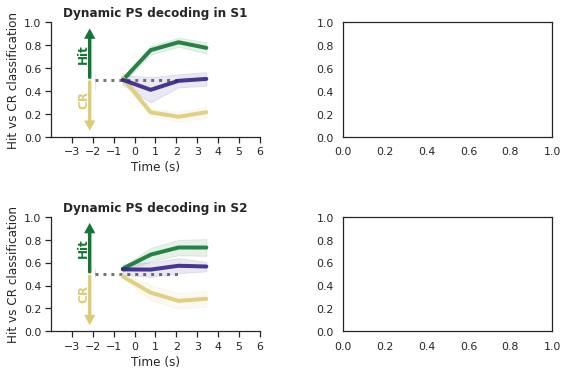

In [9]:
save_fig = False

fig = plt.figure(constrained_layout=False, figsize=(8, 5.5))
gs_dyn_dec = fig.add_gridspec(ncols=2, nrows=2, bottom=0.12, top=0.9, right=0.97, left=0.1,
                              wspace=0.4, hspace=0.7)
hit_ax_dict = {'s1': fig.add_subplot(gs_dyn_dec[0, 0]), 's2': fig.add_subplot(gs_dyn_dec[1, 0])}
miss_ax_dict = {'s1': fig.add_subplot(gs_dyn_dec[0, 1]), 's2': fig.add_subplot(gs_dyn_dec[1, 1])}

pop.plot_dynamic_decoding_two_regions_wrapper(ps_pred_split=ps_pred_split, lick_pred_split=lick_pred_split,
                                              decoder_key='hit/cr', ax_acc_ps=hit_ax_dict, 
                                              plot_tt=['hit', 'cr', 'spont'], plot_legend=False,
                                              time_array=time_array_plot, indicate_spont=True)

pop.plot_dynamic_decoding_two_regions_wrapper(ps_pred_split=ps_pred_split, lick_pred_split=lick_pred_split,
                                              decoder_key='miss/cr', ax_acc_ps=miss_ax_dict, 
                                              plot_tt=['miss', 'cr'], plot_legend=False,
                                              time_array=time_array_plot)

for reg in ['s1' ,'s2']:
    hit_ax_dict[reg].set_title(f'Dynamic stimulus encoding in {reg.upper()}', 
                               x=1.25, y=1.14, fontdict={'weight': 'bold'})    
    miss_ax_dict[reg].set_title('')
    hit_ax_dict[reg].text(s=('A' if reg == 's1' else 'B'), x=-4.7, y=1.19,
                          fontdict={'weight': 'bold'})
    
if save_fig:        
    plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig3_main.pdf',
                bbox_to_inches='tight')

In [17]:
tmp = np.array([3, 2, 3, 4, 5, 5, 5, 4, 2, 1, 2, 3,4, 5, 5, 3, 2, 1 , 3])
tmp2 = np.array([2, 3])
tmp3 = np.zeros(len(tmp), dtype='bool')
tmp3[2:12] = True
print(tmp3)
print(np.logical_and(tmp3, np.isin(tmp, tmp2)))

[False False  True  True  True  True  True  True  True  True  True  True
 False False False False False False False]
[False False  True False False False False False  True False  True  True
 False False False False False False False]


# Additional stat tests:

In [277]:
## Miss vs CR in S1 is significant until:

tmp = pof.stat_test_dyn_dec(pred_dict=ps_pred_split, decoder_name='miss/cr', tt='cr', region='s1',
                      time_array=time_array_plot, frames_bin=2, th=0.05)

time_array_plot[tmp[1].astype('bool')]

array([0.43666667, 0.47      , 0.50333333, 0.53666667, 0.57      ,
       0.60333333, 0.63666667, 0.67      , 0.70333333, 0.73666667,
       0.77      , 0.80333333, 0.83666667, 0.87      , 0.90333333,
       0.93666667, 0.97      , 1.00333333, 1.03666667, 1.07      ,
       1.17      , 1.20333333, 1.23666667, 1.27      , 1.30333333,
       1.33666667, 1.37      , 1.40333333, 1.63666667, 1.67      ,
       1.70333333, 1.73666667, 1.83666667, 1.87      , 2.90333333,
       2.93666667])

array([0.43666667, 0.47      , 0.50333333, 0.53666667, 0.57      ,
       0.60333333, 0.63666667, 0.67      , 0.70333333, 0.73666667,
       0.77      , 0.80333333, 0.83666667, 0.87      , 0.90333333,
       0.93666667, 0.97      , 1.00333333, 1.03666667, 1.07      ,
       1.17      , 1.20333333, 1.30333333, 1.33666667, 1.37      ,
       1.40333333, 1.83666667, 1.87      , 2.57      , 2.60333333])

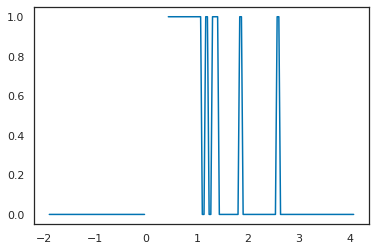

In [279]:
## Miss vs CR in S1 is significant until:

tmp = pof.stat_test_dyn_dec_two_arrays(pred_dict_1=ps_pred_split, decoder_name_1='miss/cr', tt_1='miss', region_1='s1',
                                 pred_dict_2=ps_pred_split, decoder_name_2='miss/cr', tt_2='cr', region_2='s1',
                                 time_array=time_array_plot, frames_bin=2, th=0.05, 
                                 alternative='two-sided')

plt.plot(time_array_plot, tmp[2])

time_array_plot[tmp[2].astype('bool')]


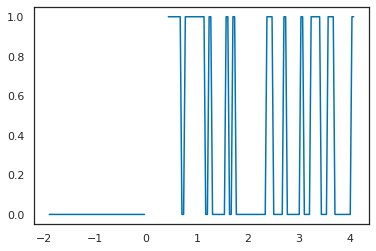

In [273]:
## Hit vs CR performance is greater in S1 than in S2:

tmp = pof.stat_test_dyn_dec_two_arrays(pred_dict_1=ps_pred_split, decoder_name_1='hit/cr', tt_1='cr', region_1='s1',
                                 pred_dict_2=ps_pred_split, decoder_name_2='hit/cr', tt_2='cr', region_2='s2',
                                 time_array=time_array_plot, frames_bin=2, th=0.05, 
                                 alternative='two-sided')

plt.plot(time_array_plot, tmp[2])

## Use (Hit - CR) performance. 

In [283]:
## Spont vs CR in S1 is not significant until:

tmp = pof.stat_test_dyn_dec(pred_dict=ps_pred_split, decoder_name='hit/cr', tt='spont', region='s2',
                      time_array=time_array_plot, frames_bin=2, th=0.05)

time_array_plot[tmp[1].astype('bool')]

array([2.77      , 2.80333333, 2.90333333, 2.93666667, 3.10333333,
       3.13666667, 3.30333333, 3.33666667, 3.43666667, 3.47      ,
       3.63666667, 3.67      , 3.83666667, 3.87      ])

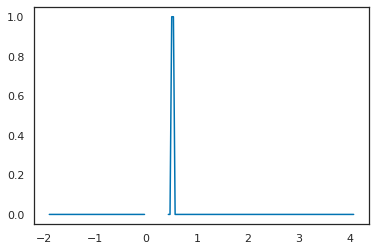

In [284]:
## Hit and Spont are identical on Spont/CR decoder

## Hit vs CR performance is greater in S1 than in S2:
reg = 's2'
tmp = pof.stat_test_dyn_dec_two_arrays(pred_dict_1=lick_pred_split, decoder_name_1='spont/cr', tt_1='hit', region_1=reg,
                                 pred_dict_2=lick_pred_split, decoder_name_2='spont/cr', tt_2='spont', region_2=reg,
                                 time_array=time_array_plot, frames_bin=2, th=0.05, 
                                 alternative='two-sided')

plt.plot(time_array_plot, tmp[2])

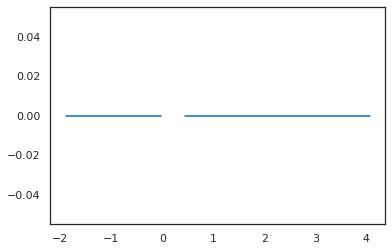

In [362]:
## Hit and Spont are identical on Spont/CR decoder

## Hit vs CR performance is greater in S1 than in S2:
reg = 's2'
tmp = pof.stat_test_dyn_dec_two_arrays(pred_dict_1=ps_pred_split, decoder_name_1='hit/cr 10 trials', tt_1='hit', region_1=reg,
                                 pred_dict_2=lick_pred_split, decoder_name_2='spont/cr', tt_2='spont', region_2=reg,
                                 time_array=time_array_plot, frames_bin=2, th=0.05, 
                                 alternative='two-sided')

plt.plot(time_array_plot, tmp[2])

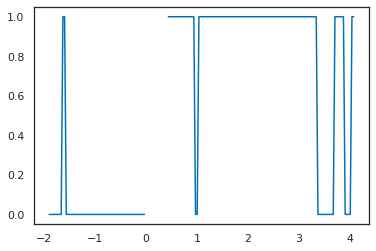

In [358]:
reg = 's1'
tmp = pof.stat_test_dyn_dec_two_arrays(pred_dict_1=ps_pred_split, decoder_name_1='hit/cr 10 trials', tt_1='hit', region_1=reg,
                                 pred_dict_2=lick_pred_split, decoder_name_2='hit/cr', tt_2='spont', region_2=reg,
                                 time_array=time_array_plot, frames_bin=2, th=0.05, 
                                 alternative='two-sided')

plt.plot(time_array_plot, tmp[2])

In [359]:
time_array_plot[70:148]

array([0.43666667, 0.47      , 0.50333333, 0.53666667, 0.57      ,
       0.60333333, 0.63666667, 0.67      , 0.70333333, 0.73666667,
       0.77      , 0.80333333, 0.83666667, 0.87      , 0.90333333,
       0.93666667, 0.97      , 1.00333333, 1.03666667, 1.07      ,
       1.10333333, 1.13666667, 1.17      , 1.20333333, 1.23666667,
       1.27      , 1.30333333, 1.33666667, 1.37      , 1.40333333,
       1.43666667, 1.47      , 1.50333333, 1.53666667, 1.57      ,
       1.60333333, 1.63666667, 1.67      , 1.70333333, 1.73666667,
       1.77      , 1.80333333, 1.83666667, 1.87      , 1.90333333,
       1.93666667, 1.97      , 2.00333333, 2.03666667, 2.07      ,
       2.10333333, 2.13666667, 2.17      , 2.20333333, 2.23666667,
       2.27      , 2.30333333, 2.33666667, 2.37      , 2.40333333,
       2.43666667, 2.47      , 2.50333333, 2.53666667, 2.57      ,
       2.60333333, 2.63666667, 2.67      , 2.70333333, 2.73666667,
       2.77      , 2.80333333, 2.83666667, 2.87      , 2.90333

In [360]:
np.sum(tmp[2][70:]), len(tmp[2][70:])

(94.0, 110)

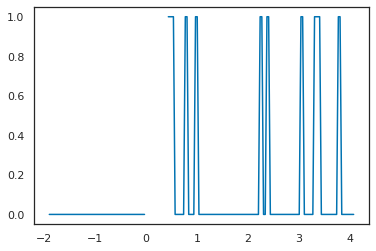

In [317]:
## hit cr difference greater in s1 than s2

tmp = pof.stat_test_dyn_dec_two_difference_arrays(pred_dict_1=ps_pred_split, decoder_name_1='hit/cr', tt_1_pos='hit', 
                                                  tt_1_neg='cr', region_1='s1',
                                 pred_dict_2=ps_pred_split, decoder_name_2='hit/cr', tt_2_pos='hit', tt_2_neg='cr',
                                                  region_2='s2',
                                 time_array=time_array_plot, frames_bin=2, th=0.05, 
                                 alternative='two-sided')

plt.plot(time_array_plot, tmp[1])

In [318]:
np.sum(tmp[1])

20.0

# Supp 1 (all trial types)

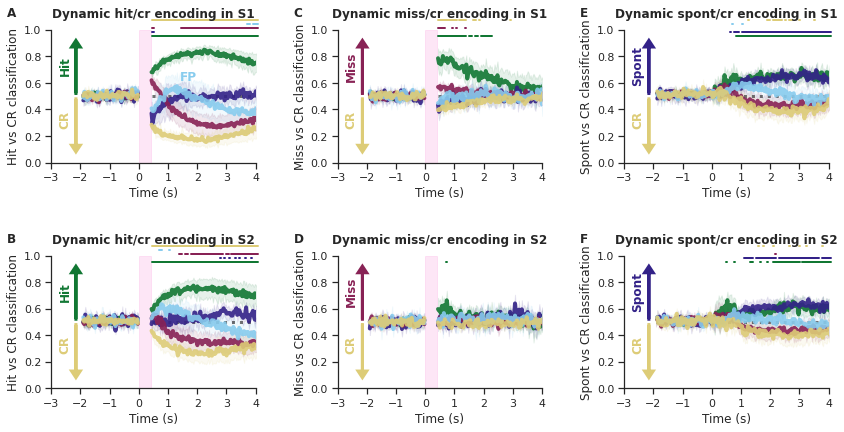

In [152]:
save_fig = False

fig = plt.figure(constrained_layout=False, figsize=(12, 6))
gs_dyn_dec = fig.add_gridspec(ncols=3, nrows=2, bottom=0.1, top=0.93, right=0.97, left=0.07,
                              wspace=0.4, hspace=0.7)

hit_ax_dict = {'s1': fig.add_subplot(gs_dyn_dec[0, 0]), 's2': fig.add_subplot(gs_dyn_dec[1, 0])}
miss_ax_dict = {'s1': fig.add_subplot(gs_dyn_dec[0, 1]), 's2': fig.add_subplot(gs_dyn_dec[1, 1])}
spont_ax_dict = {'s1': fig.add_subplot(gs_dyn_dec[0, 2]), 's2': fig.add_subplot(gs_dyn_dec[1, 2])}

pop.plot_dynamic_decoding_two_regions_wrapper(ps_pred_split=ps_pred_split, lick_pred_split=lick_pred_split,
                                              decoder_key='hit/cr', ax_acc_ps=hit_ax_dict, 
                                              time_array=time_array_plot, plot_legend=False,
                                              indicate_fp=True)

pop.plot_dynamic_decoding_two_regions_wrapper(ps_pred_split=ps_pred_split, lick_pred_split=lick_pred_split,
                                              decoder_key='miss/cr', ax_acc_ps=miss_ax_dict, 
                                              time_array=time_array_plot, plot_legend=False)


pop.plot_dynamic_decoding_two_regions_wrapper(ps_pred_split=ps_pred_split, lick_pred_split=lick_pred_split,
                                              decoder_key='spont/cr', ax_acc_ps=spont_ax_dict, 
                                              time_array=time_array_full, plot_legend=False, plot_artefact=False)

for reg in ['s1', 's2']:
    hit_ax_dict[reg].text(s=('A' if reg == 's1' else 'B'), x=-4.5, y=1.1,
                          fontdict={'weight': 'bold'})
    miss_ax_dict[reg].text(s=('C' if reg == 's1' else 'D'), x=-4.5, y=1.1,
                          fontdict={'weight': 'bold'})
    spont_ax_dict[reg].text(s=('E' if reg == 's1' else 'F'), x=-4.5, y=1.1,
                          fontdict={'weight': 'bold'})
    
if save_fig:
    plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig3_supp1.pdf',
                bbox_to_inches='tight')
    

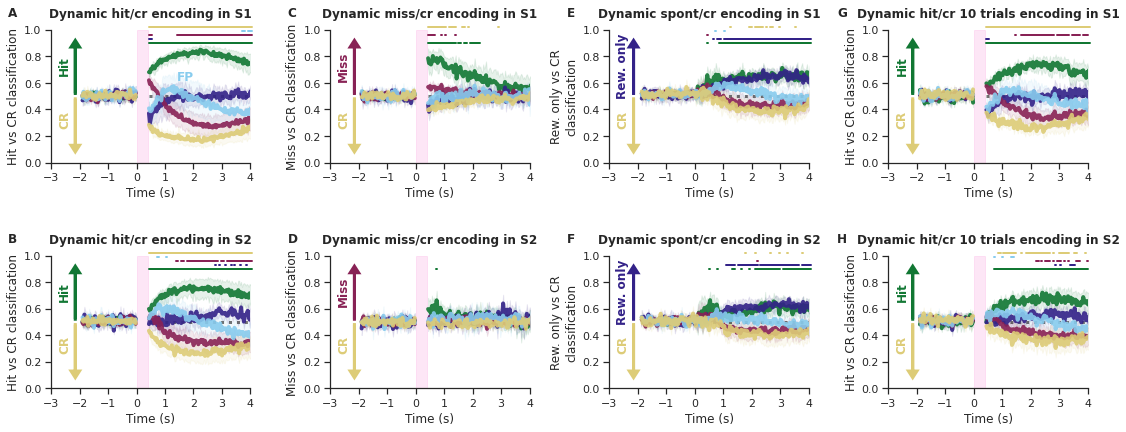

In [329]:
save_fig = False

fig = plt.figure(constrained_layout=False, figsize=(16, 6))
gs_dyn_dec = fig.add_gridspec(ncols=4, nrows=2, bottom=0.1, top=0.93, right=0.97, left=0.07,
                              wspace=0.4, hspace=0.7)

hit_ax_dict = {'s1': fig.add_subplot(gs_dyn_dec[0, 0]), 's2': fig.add_subplot(gs_dyn_dec[1, 0])}
miss_ax_dict = {'s1': fig.add_subplot(gs_dyn_dec[0, 1]), 's2': fig.add_subplot(gs_dyn_dec[1, 1])}
spont_ax_dict = {'s1': fig.add_subplot(gs_dyn_dec[0, 2]), 's2': fig.add_subplot(gs_dyn_dec[1, 2])}
hit10_ax_dict = {'s1': fig.add_subplot(gs_dyn_dec[0, 3]), 's2': fig.add_subplot(gs_dyn_dec[1, 3])}

pop.plot_dynamic_decoding_two_regions_wrapper(ps_pred_split=ps_pred_split, lick_pred_split=lick_pred_split,
                                              decoder_key='hit/cr', ax_acc_ps=hit_ax_dict, 
                                              time_array=time_array_plot, plot_legend=False,
                                              indicate_fp=True, bottom_sign_bar=0.9)

pop.plot_dynamic_decoding_two_regions_wrapper(ps_pred_split=ps_pred_split, lick_pred_split=lick_pred_split,
                                              decoder_key='miss/cr', ax_acc_ps=miss_ax_dict, 
                                              time_array=time_array_plot, plot_legend=False, bottom_sign_bar=0.9)

pop.plot_dynamic_decoding_two_regions_wrapper(ps_pred_split=ps_pred_split, lick_pred_split=lick_pred_split,
                                              decoder_key='spont/cr', ax_acc_ps=spont_ax_dict, 
                                              time_array=time_array_full, plot_legend=False, 
                                              plot_artefact=False, bottom_sign_bar=0.9)

pop.plot_dynamic_decoding_two_regions_wrapper(ps_pred_split=ps_pred_split, lick_pred_split=lick_pred_split,
                                              decoder_key='hit/cr 10 trials', ax_acc_ps=hit10_ax_dict, 
                                              time_array=time_array_plot, plot_legend=False, bottom_sign_bar=0.9)

for reg in ['s1', 's2']:
    hit_ax_dict[reg].text(s=('A' if reg == 's1' else 'B'), x=-4.5, y=1.1,
                          fontdict={'weight': 'bold'})
    miss_ax_dict[reg].text(s=('C' if reg == 's1' else 'D'), x=-4.5, y=1.1,
                          fontdict={'weight': 'bold'})
    spont_ax_dict[reg].text(s=('E' if reg == 's1' else 'F'), x=-4.5, y=1.1,
                          fontdict={'weight': 'bold'})
    hit10_ax_dict[reg].text(s=('G' if reg == 's1' else 'H'), x=-4.8, y=1.1,
                          fontdict={'weight': 'bold'})
    
if save_fig:
    plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig3_supp1_v2.pdf',
                bbox_to_inches='tight')
    

# Supp 2 (indiv animals)

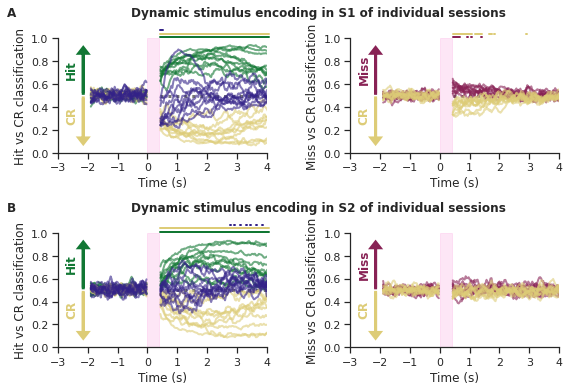

In [337]:
save_fig = False

fig = plt.figure(constrained_layout=False, figsize=(8, 5.5))
gs_dyn_dec = fig.add_gridspec(ncols=2, nrows=2, bottom=0.12, top=0.9, right=0.97, left=0.1,
                              wspace=0.4, hspace=0.7)
hit_ax_dict = {'s1': fig.add_subplot(gs_dyn_dec[0, 0]), 's2': fig.add_subplot(gs_dyn_dec[1, 0])}
miss_ax_dict = {'s1': fig.add_subplot(gs_dyn_dec[0, 1]), 's2': fig.add_subplot(gs_dyn_dec[1, 1])}

pop.plot_dynamic_decoding_two_regions_wrapper(ps_pred_split=ps_pred_split, lick_pred_split=lick_pred_split,
                                              decoder_key='hit/cr', ax_acc_ps=hit_ax_dict, 
                                              plot_indiv=True, smooth_traces=True,
                                              plot_tt=['hit', 'cr', 'spont'], plot_legend=False,
                                              time_array=time_array_plot, indicate_spont=False,
                                              plot_mean=False,
                                              bottom_sign_bar=1.01, plot_ci=False)

pop.plot_dynamic_decoding_two_regions_wrapper(ps_pred_split=ps_pred_split, lick_pred_split=lick_pred_split,
                                              decoder_key='miss/cr', ax_acc_ps=miss_ax_dict, 
                                              plot_indiv=True, smooth_traces=True,
                                              plot_tt=['miss', 'cr'], plot_legend=False,
                                              plot_ci=False, plot_mean=False,
                                              time_array=time_array_plot, bottom_sign_bar=1.01)

for reg in ['s1' ,'s2']:
    hit_ax_dict[reg].set_title(f'Dynamic stimulus encoding in {reg.upper()} of individual sessions', 
                               x=1.25, y=1.14, fontdict={'weight': 'bold'})    
    miss_ax_dict[reg].set_title('')
    hit_ax_dict[reg].text(s=('A' if reg == 's1' else 'B'), x=-4.7, y=1.19,
                          fontdict={'weight': 'bold'})
    
if save_fig:        
    plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig3_supp_indiv_sessions.pdf',
                bbox_to_inches='tight')